In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#import torch 
import time

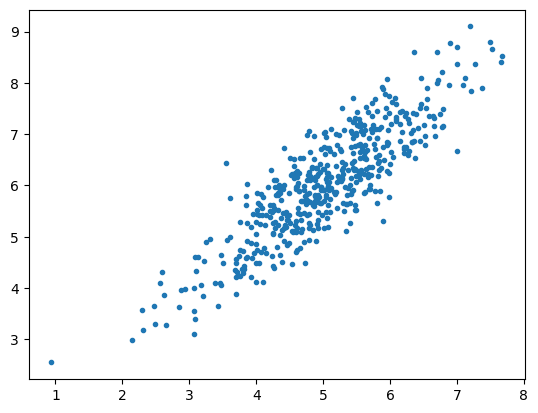

In [23]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
 
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)
 
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker='.')
plt.show()
 
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))
 
split_factor = 0.90
split = int(split_factor * data.shape[0])
 
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))
 


In [24]:
#d=np.hstack((X_train,y_train))
#batch_size=10



In [25]:
w=np.random.randn(X_train.shape[1],1)
b=np.zeros(1)
w

array([[ 2.2332149 ],
       [-1.73680932]])

In [26]:
def hyothesis(X,w,b):
    return X@w+b
def gradient(X,y,w,b):
    h=hyothesis(X,w,b)
    try:
        
        grad_w=np.dot(X.transpose(),(h-y))
        
        
    except:
        grad_w=np.dot(X.reshape((X.shape[0],1)),(h-y))    
    grad_b=np.sum(h-y,axis=0)    
    grad=(grad_w,grad_b)
    return grad
def cost(X,y,w,b):
    h=hyothesis(X,w,b)
    j=np.mean(np.square(h-y))
    
    return j


def create_mini_batch(X,y,batch_size):
    mini_batches=[]
    data=np.hstack((X,y))
    n_minibatch=data.shape[0]//batch_size
    i=0
    for i in range(n_minibatch+1):
        mini_batch=data[i*batch_size:(i+1)*batch_size,:]
       
        X_mini=mini_batch[:,:-1]
        Y_mini=mini_batch[:,-1].reshape((-1,1))
        
            
        mini_batches.append((X_mini,Y_mini))
        
    mini_batches=mini_batches[:-1]
    
        
    return mini_batches

In [27]:
#




Mini  Gradient Descent

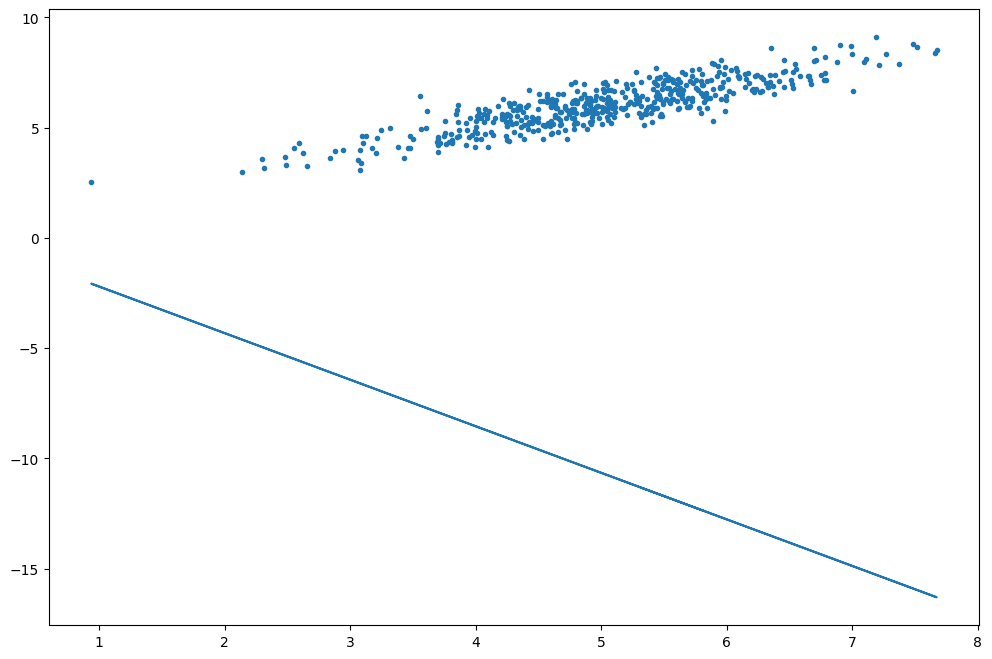

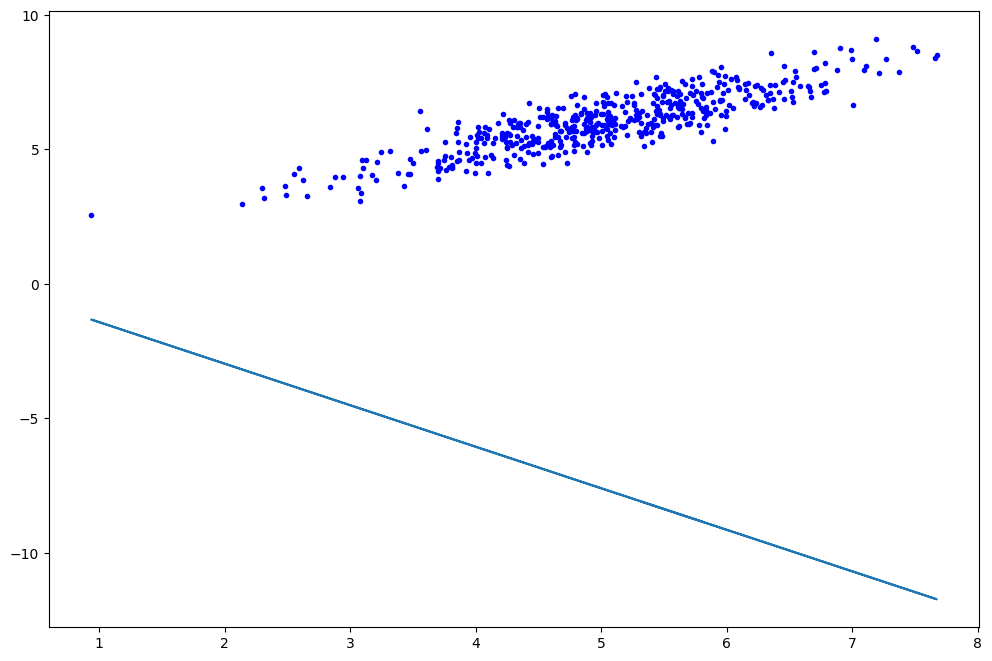

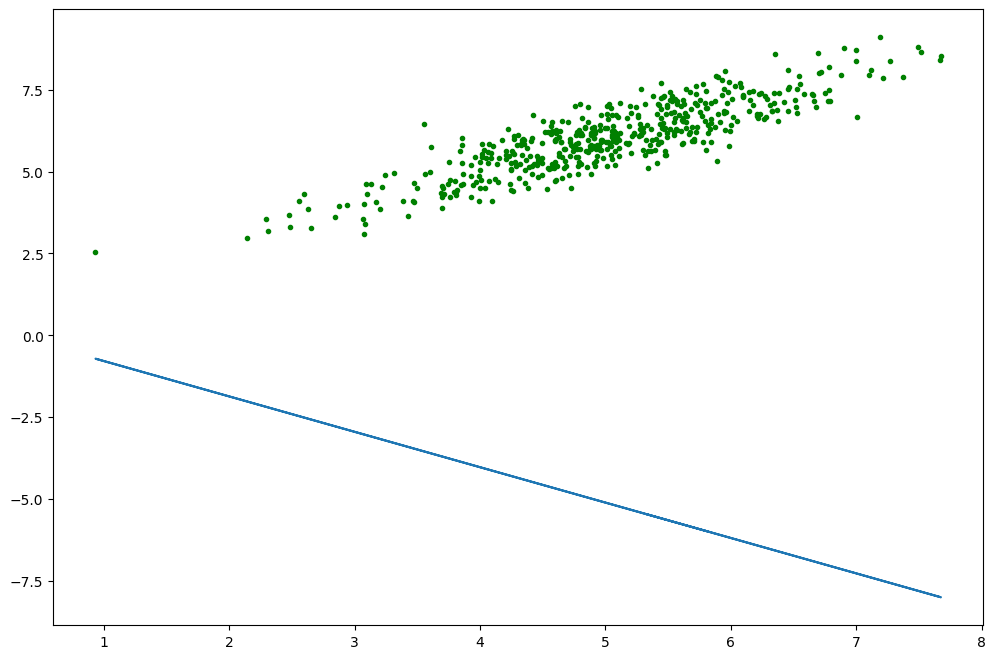

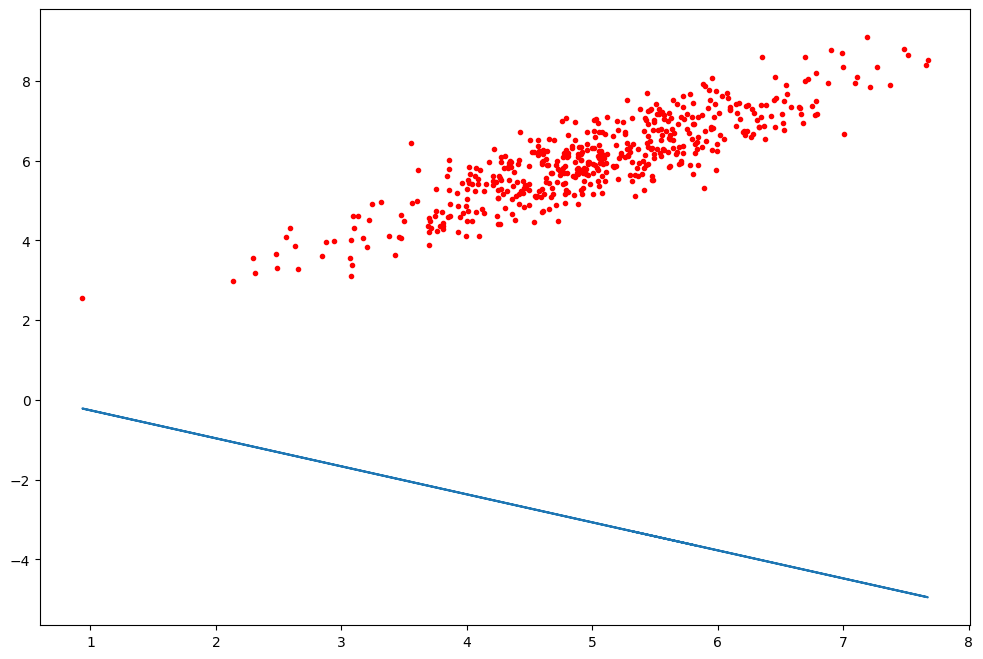

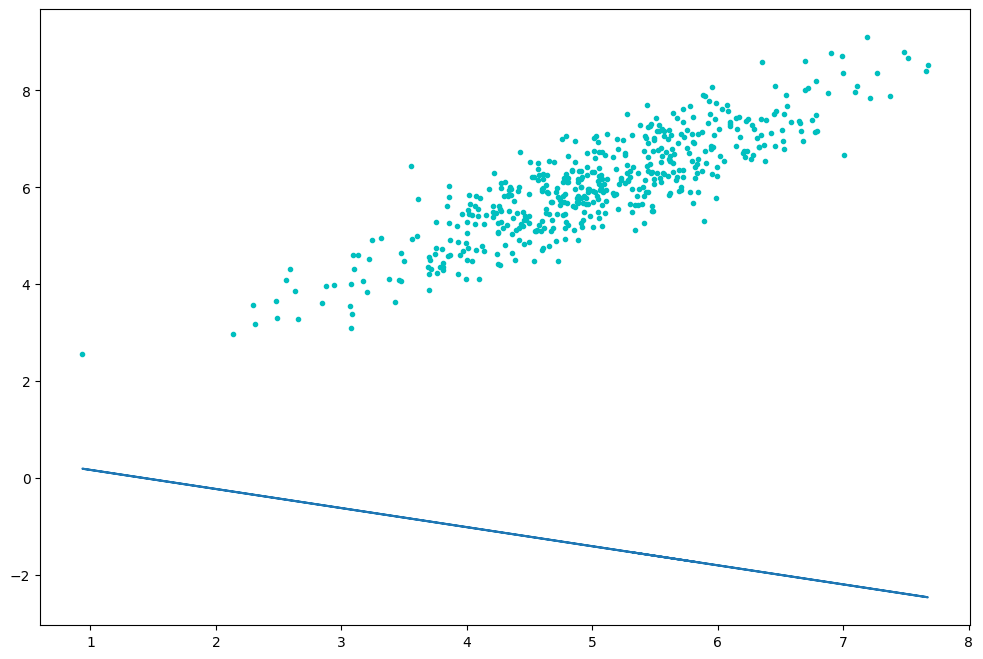

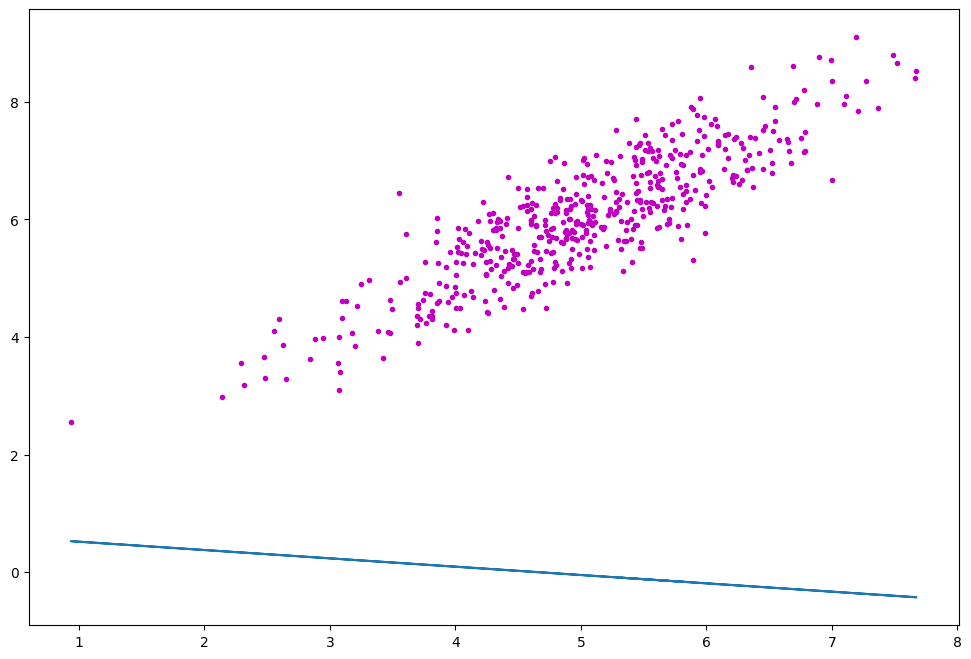

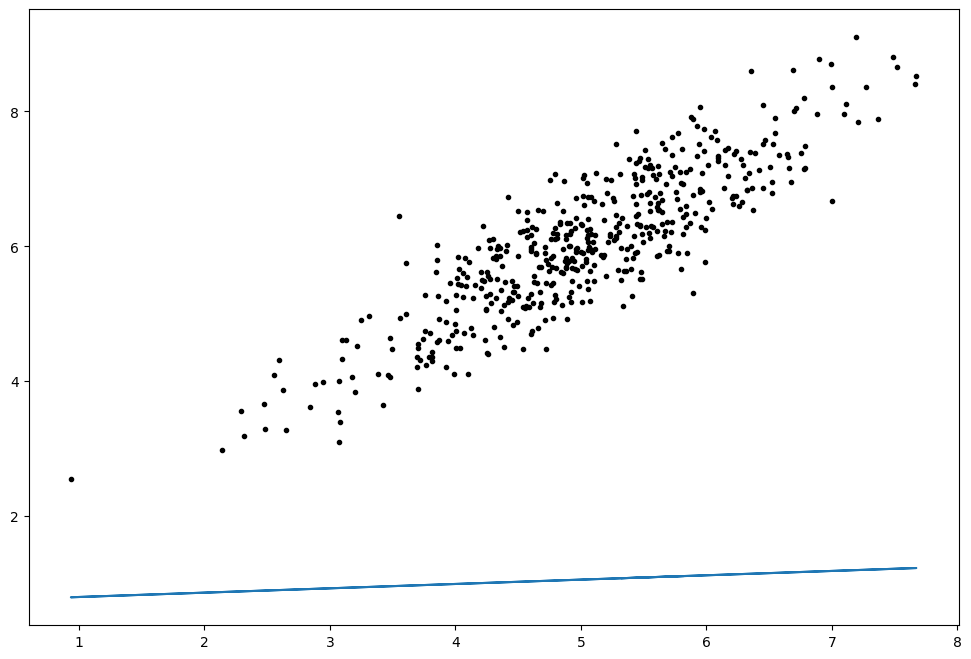

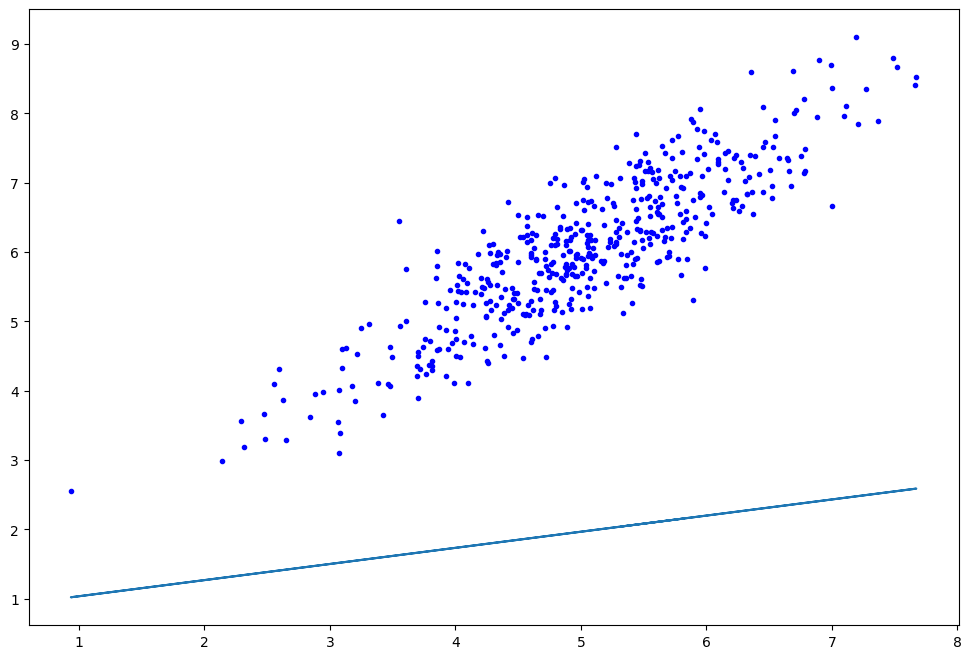

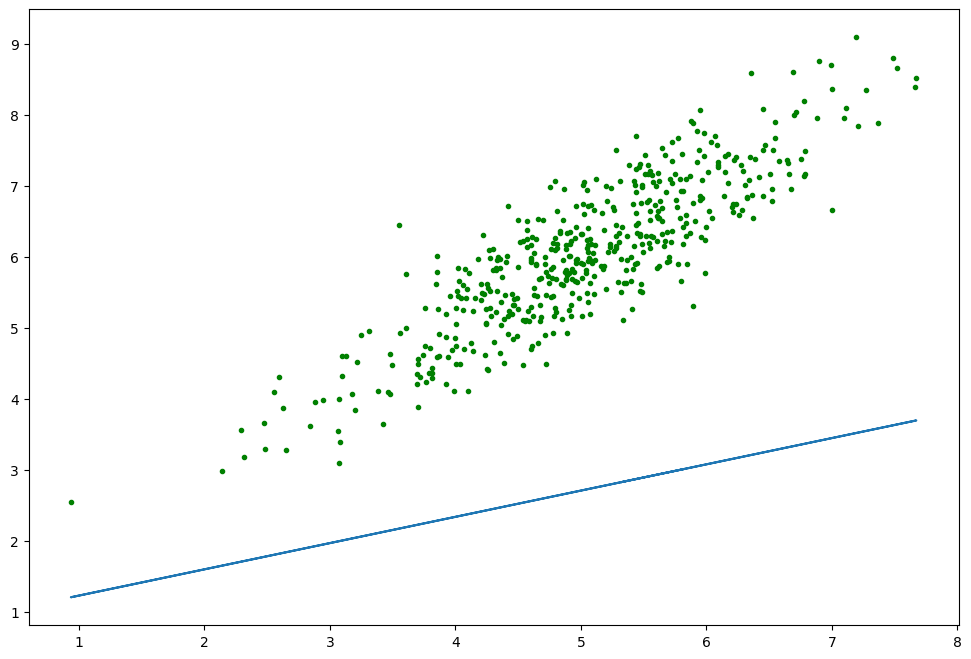

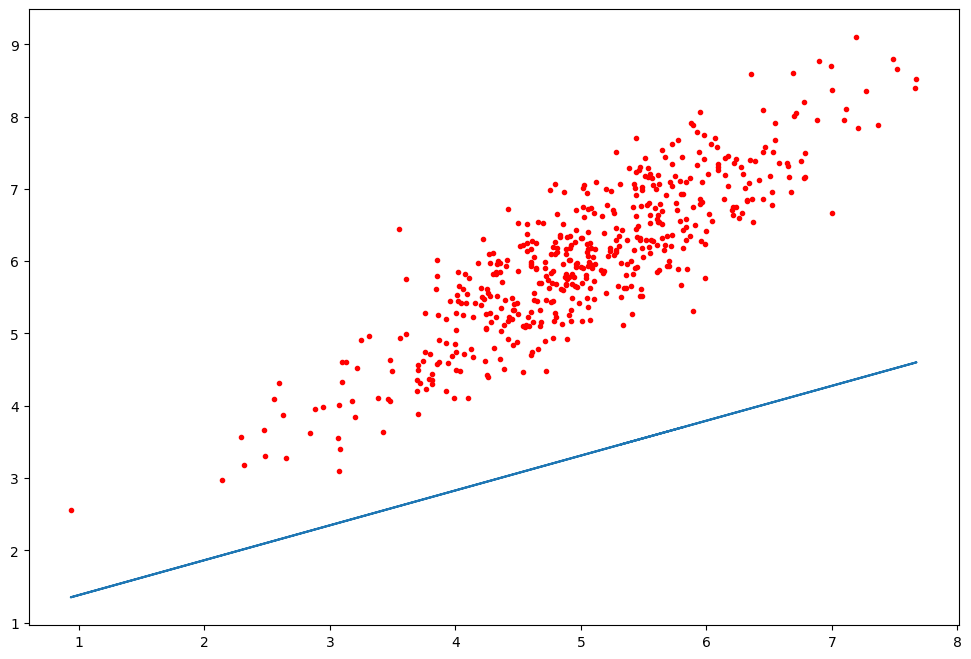

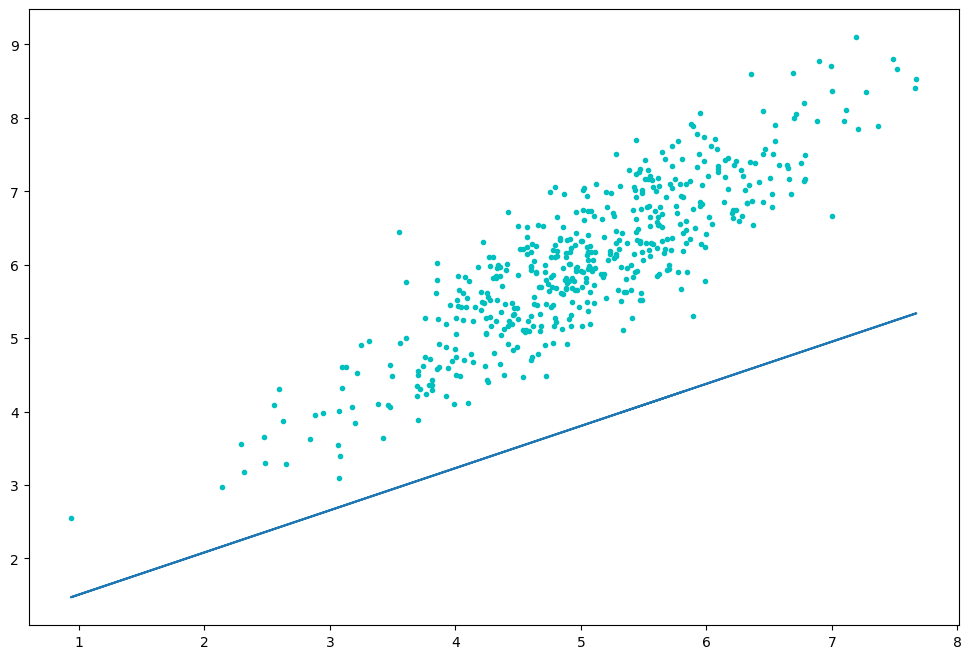

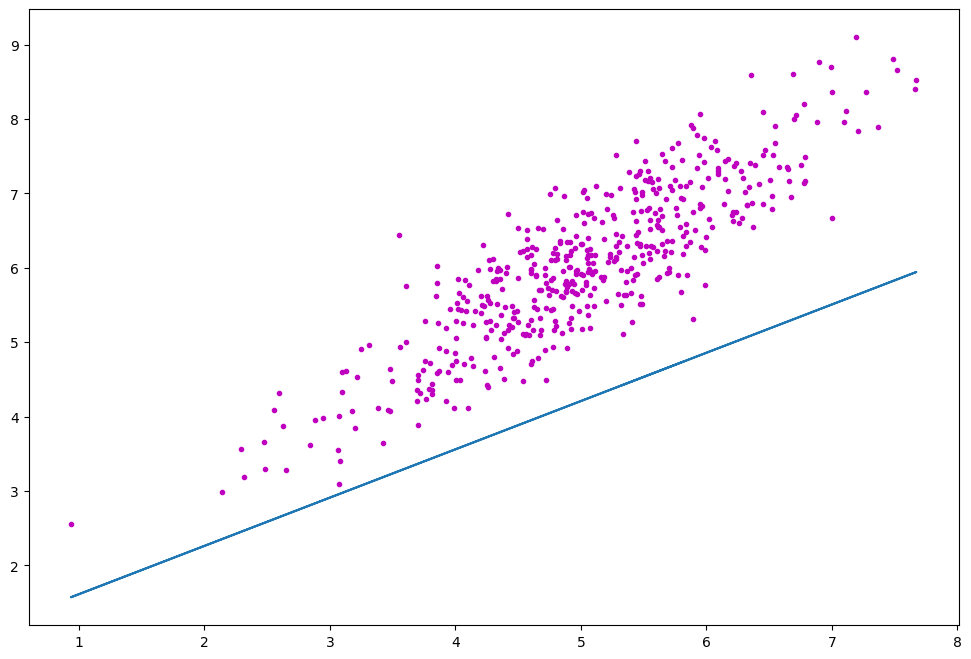

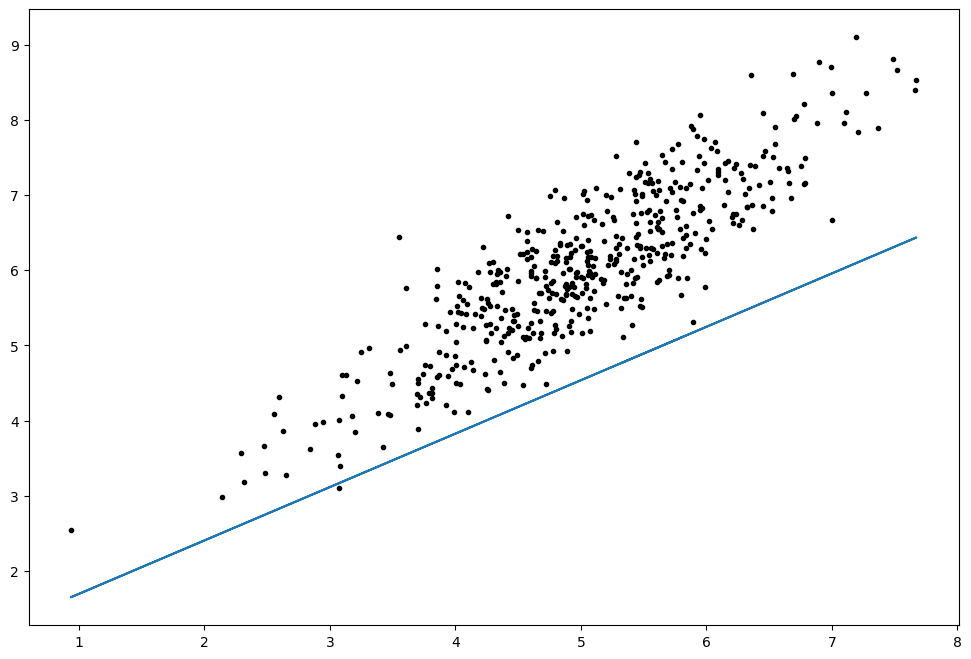

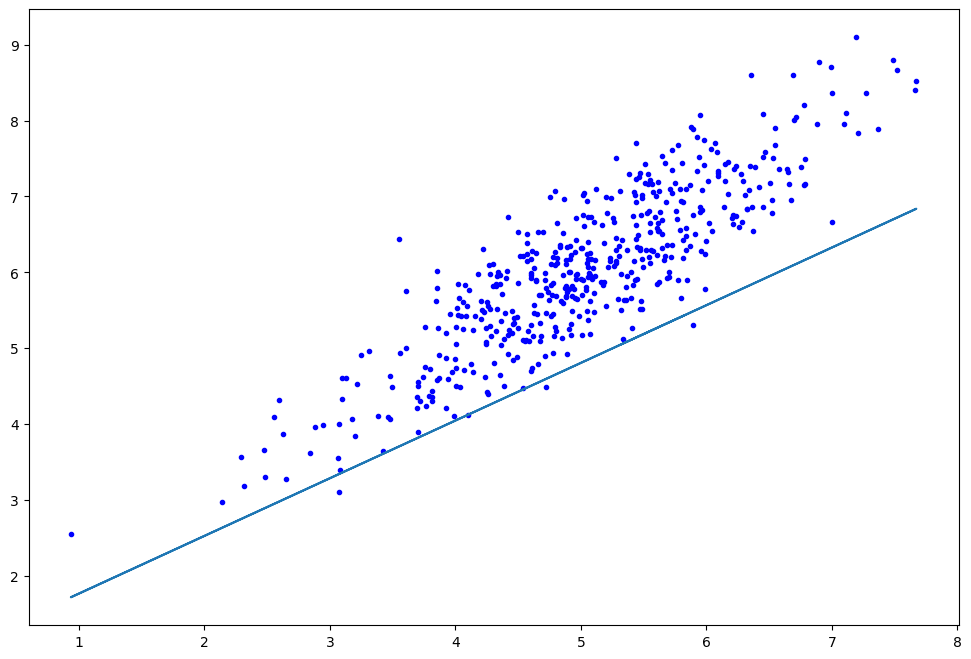

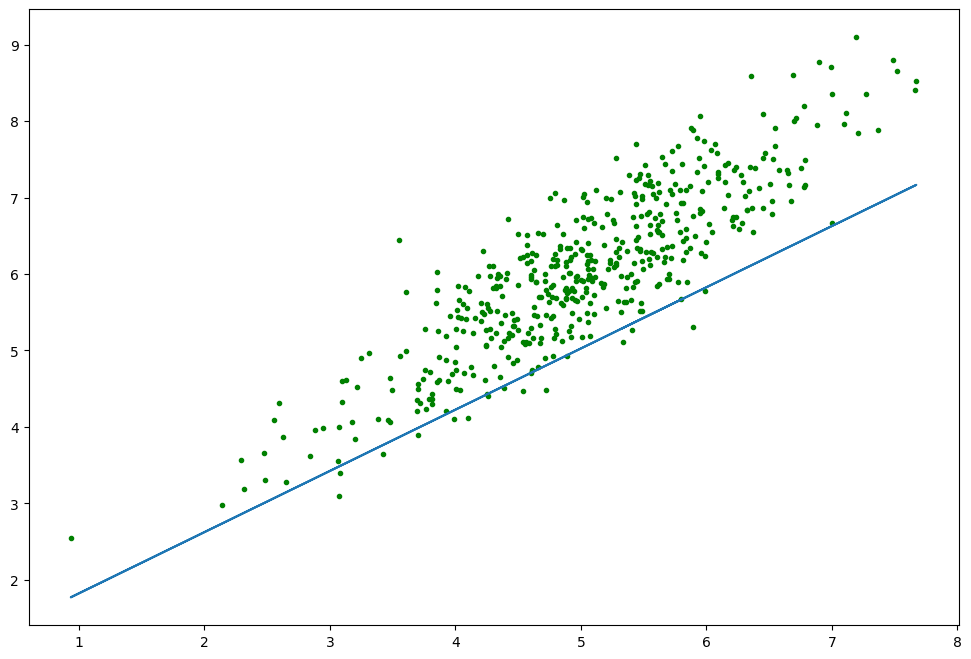

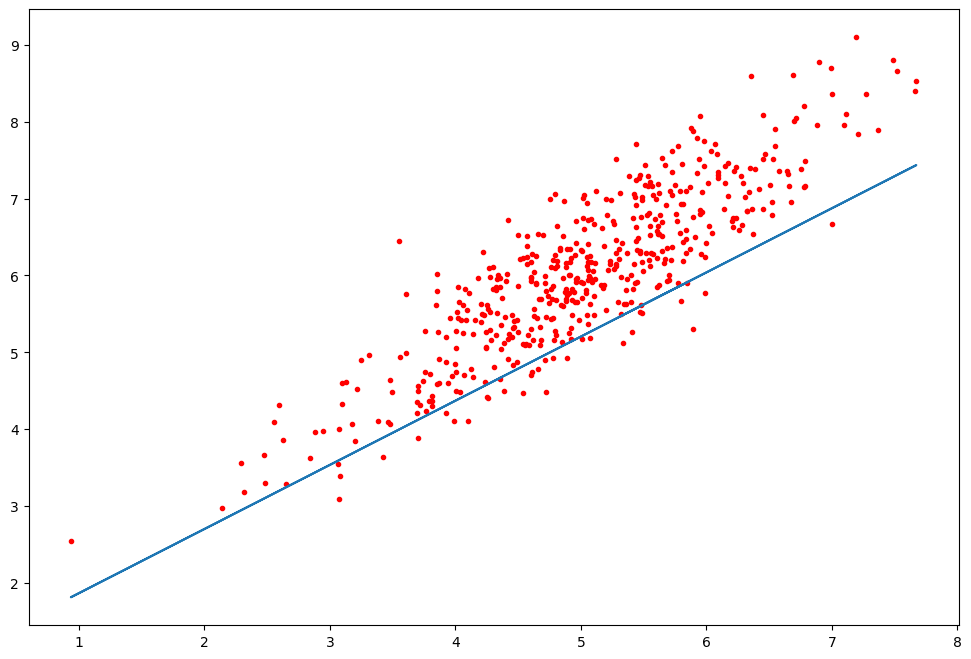

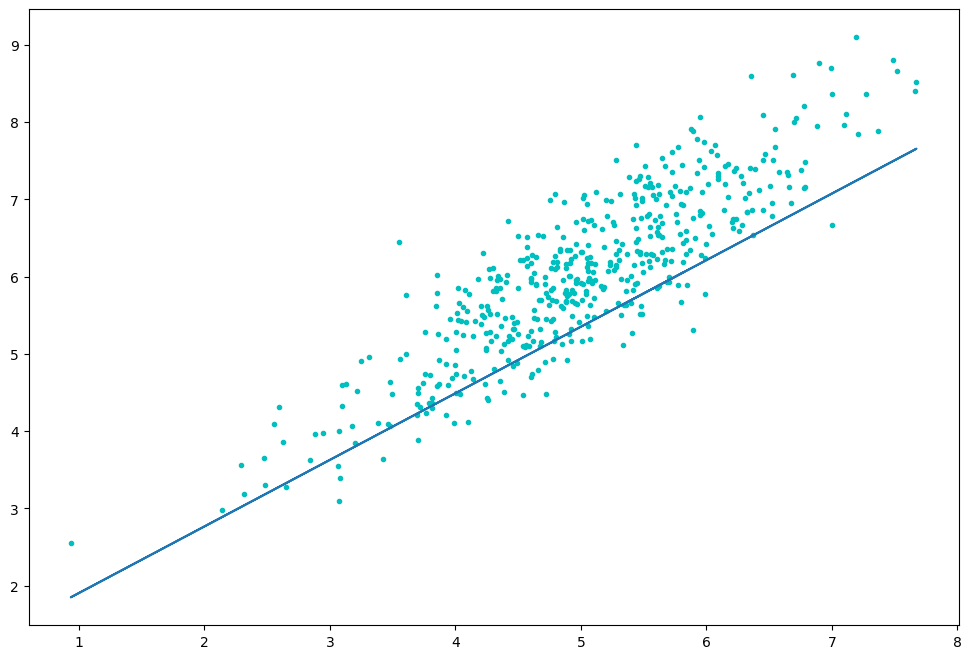

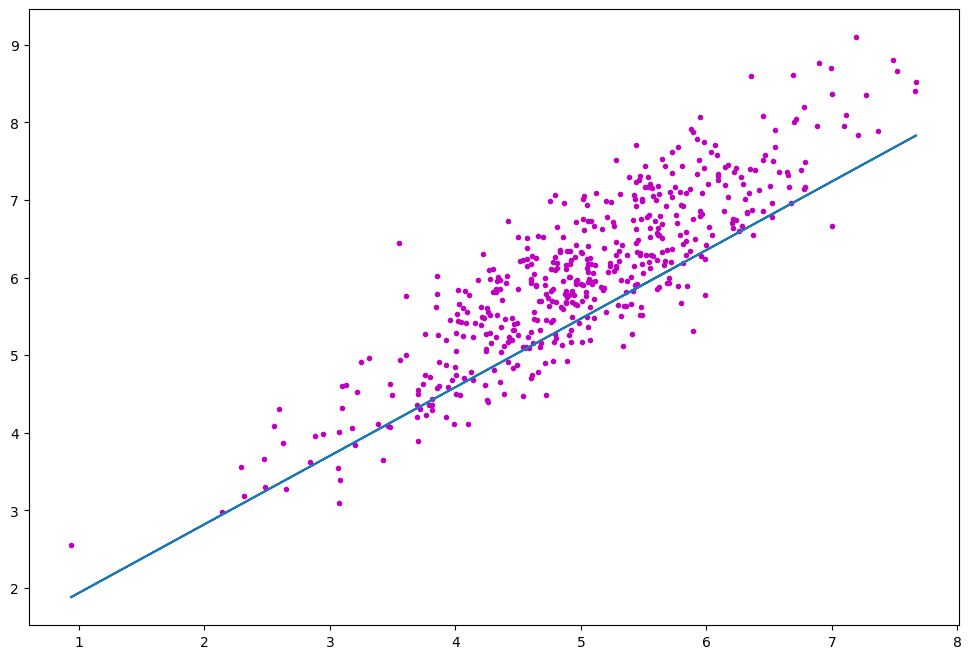

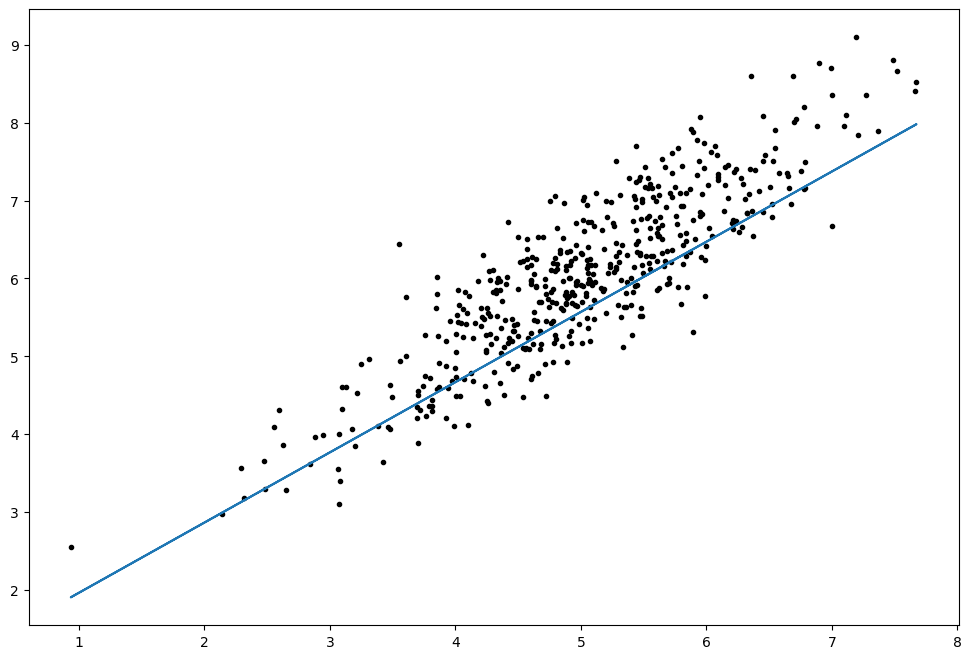

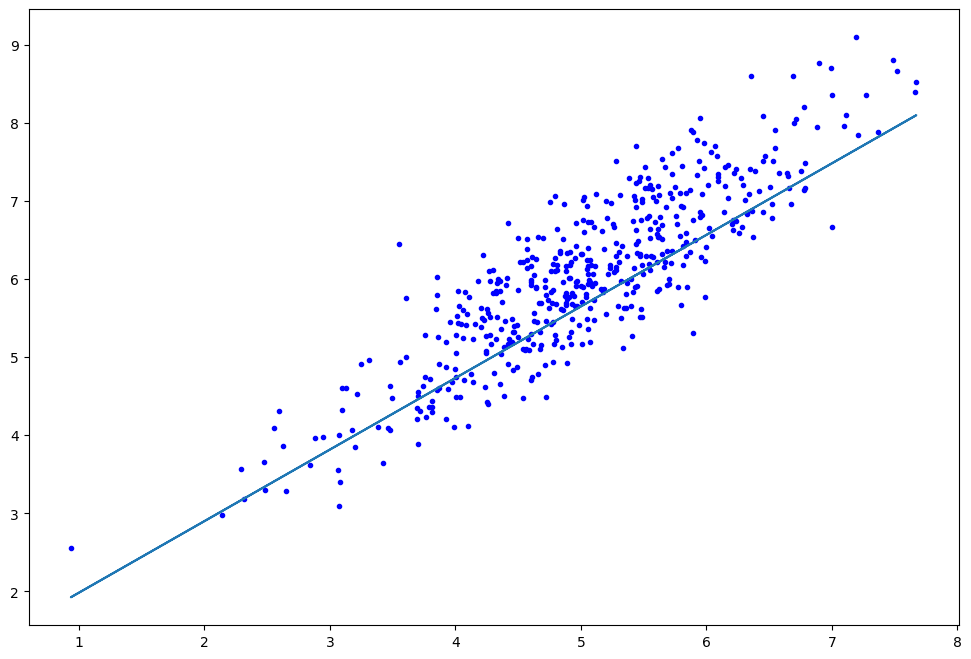

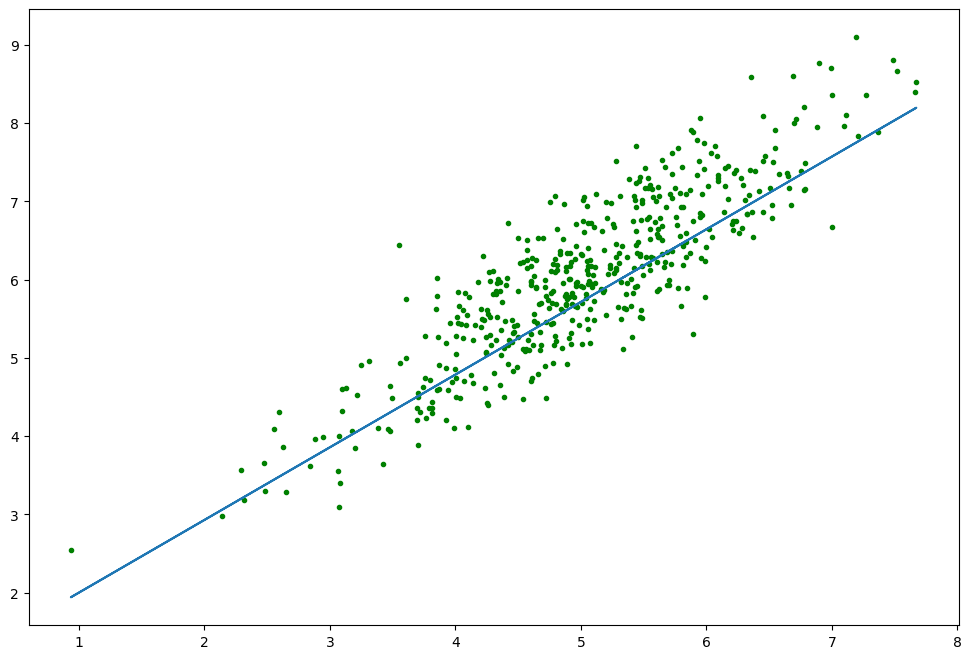

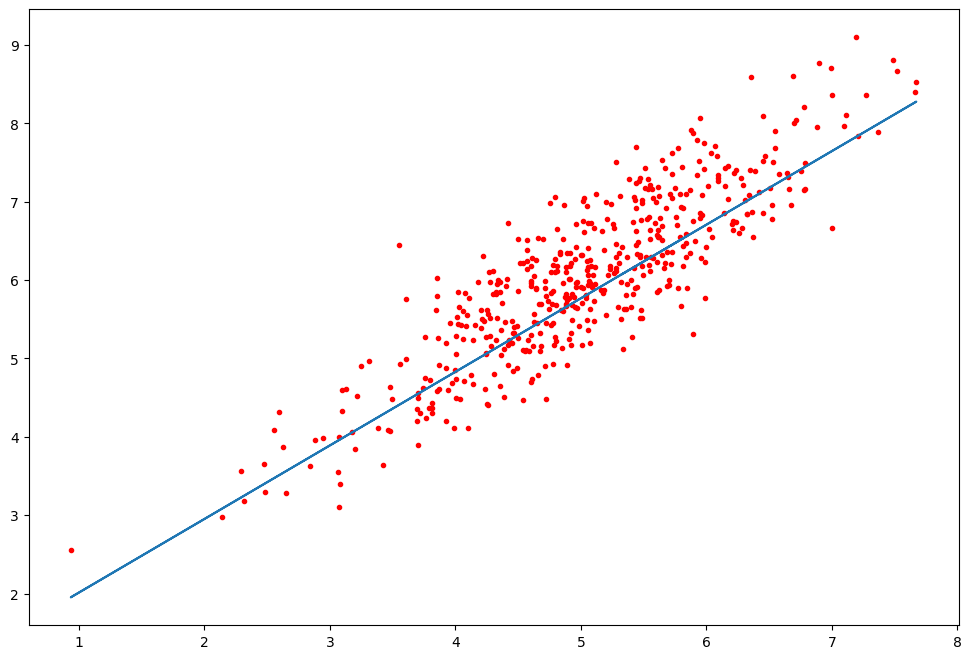

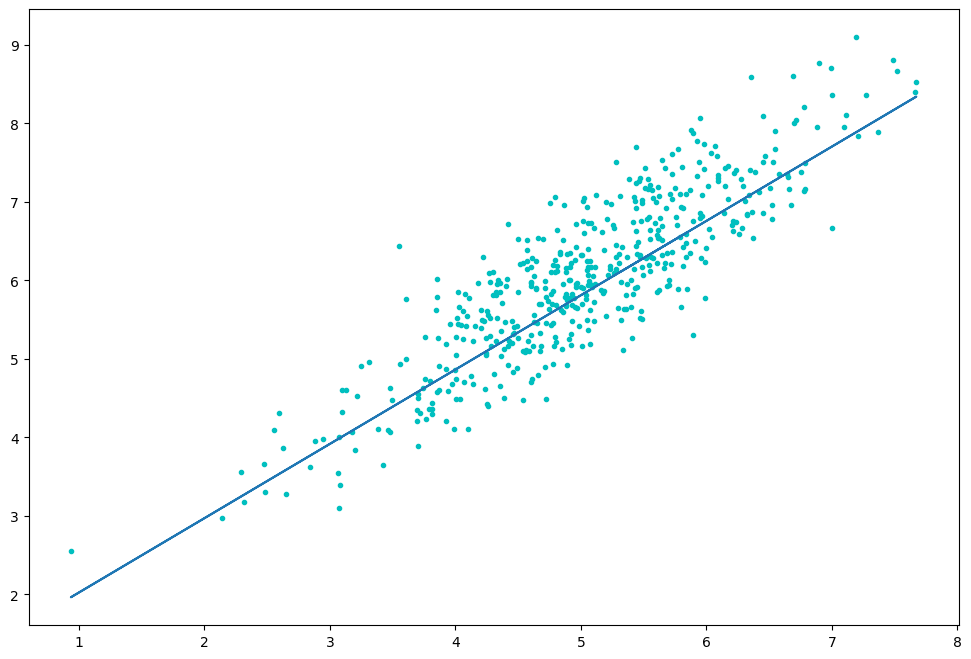

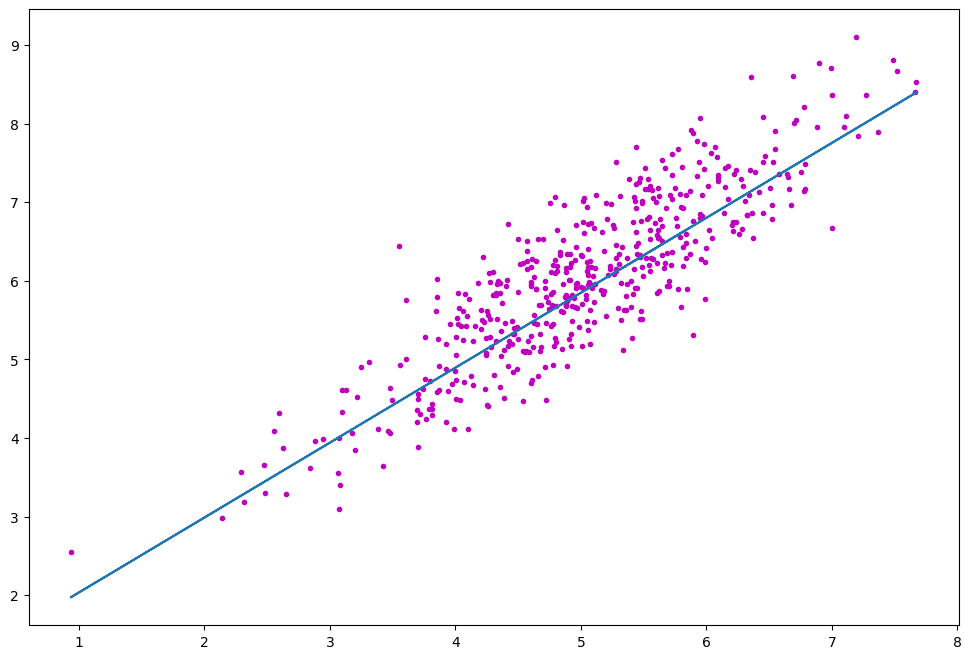

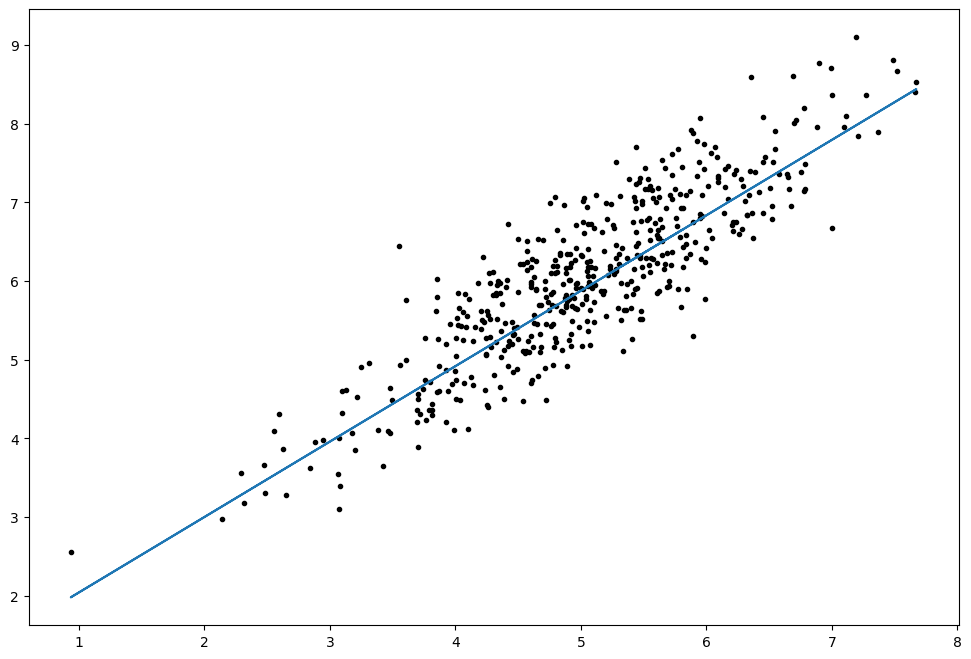

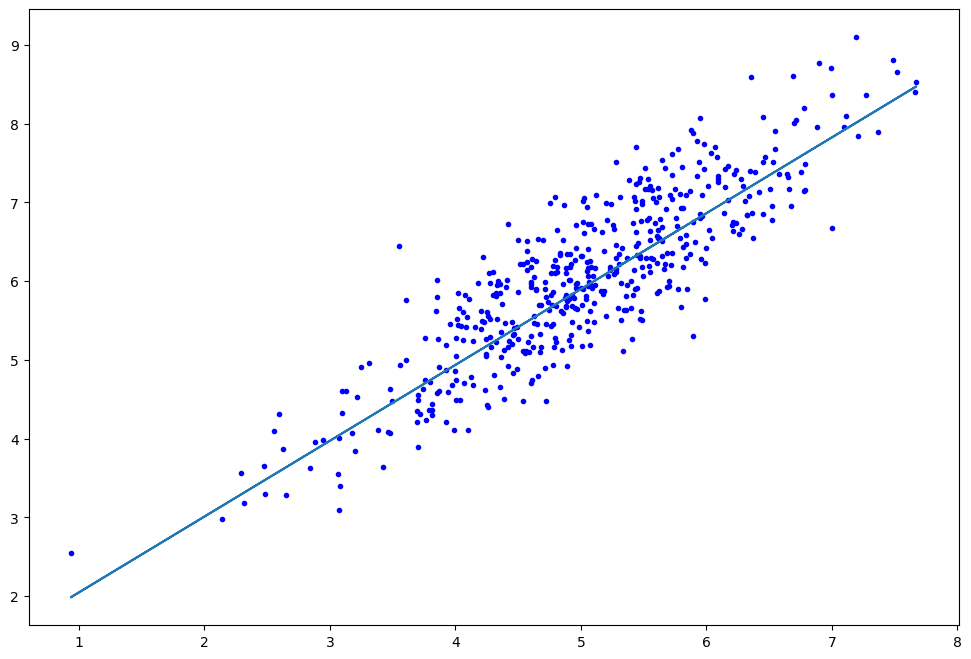

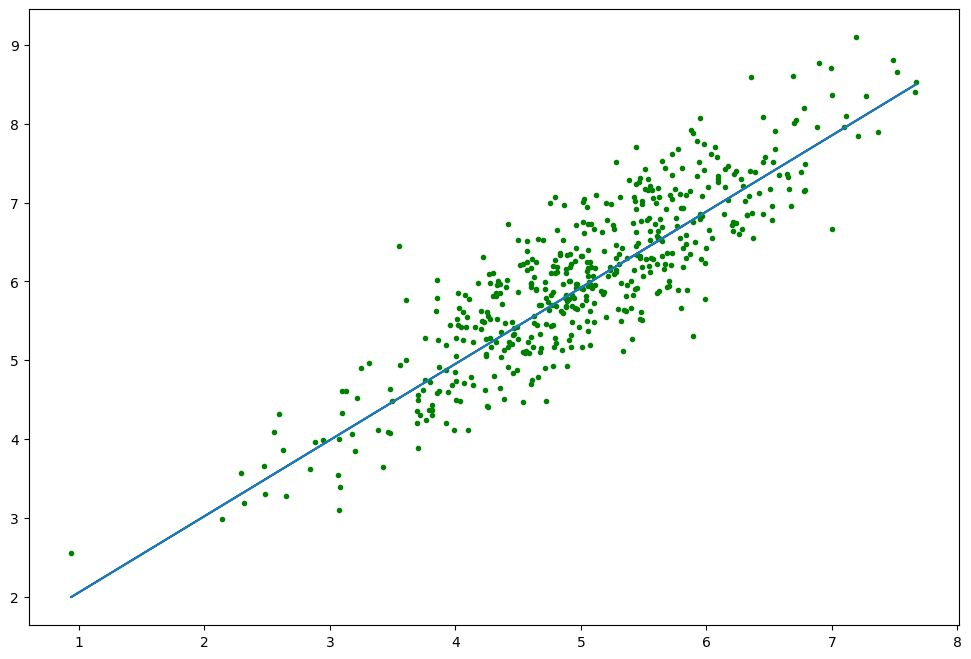

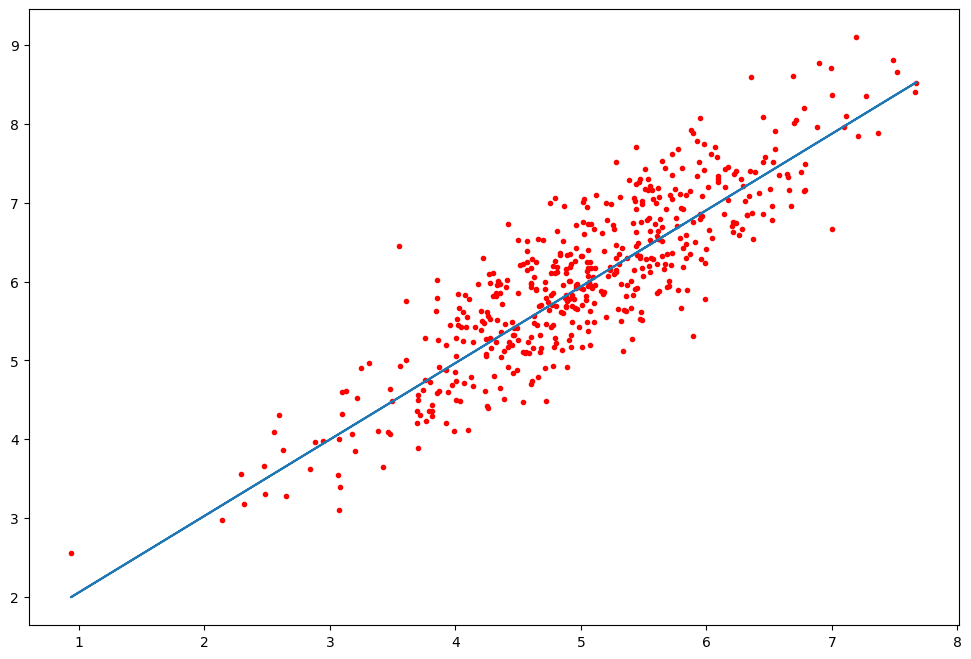

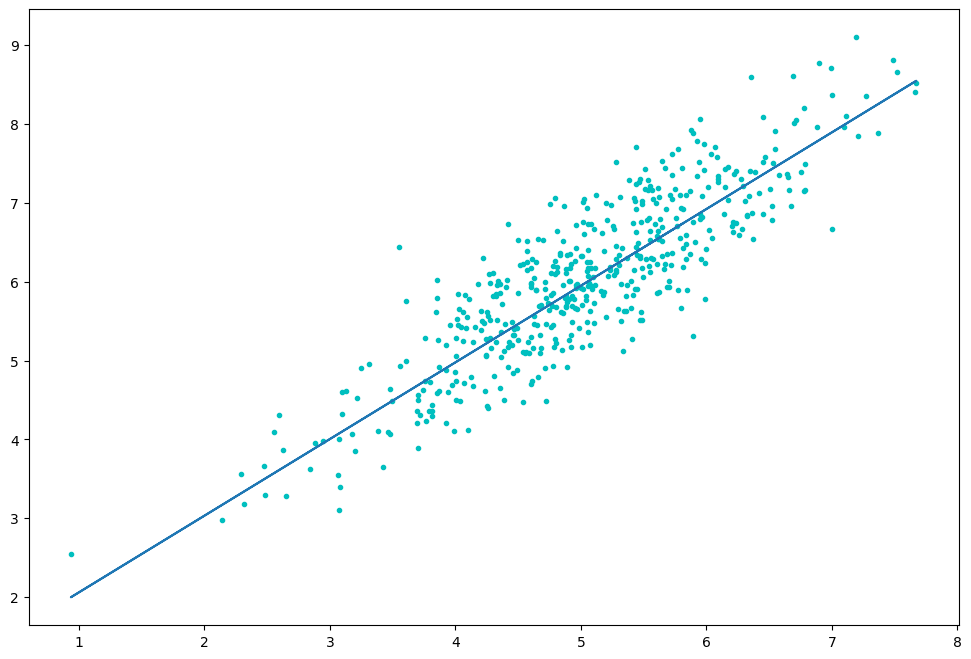

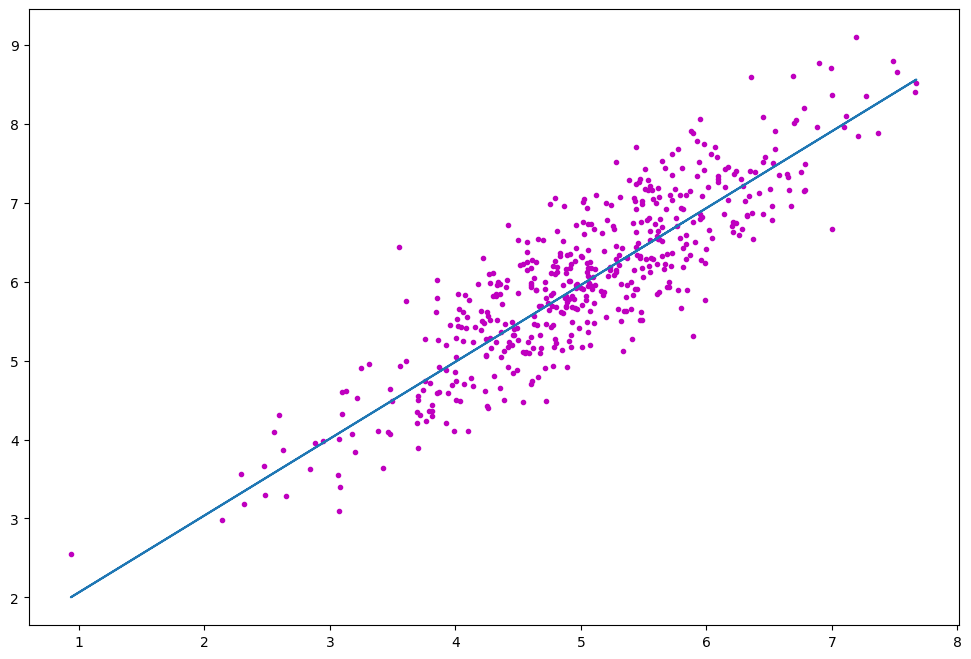

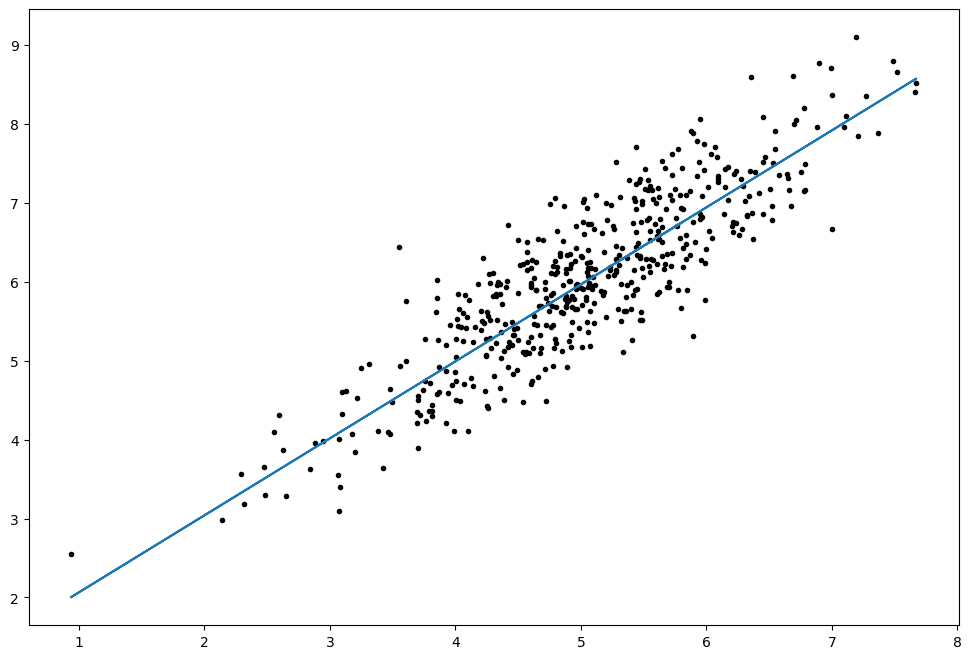

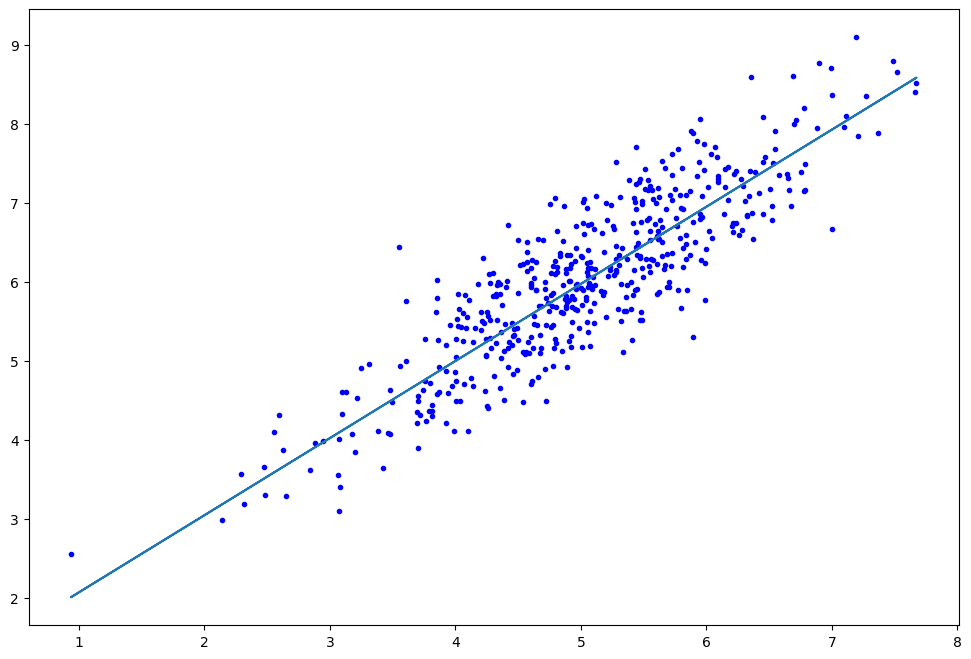

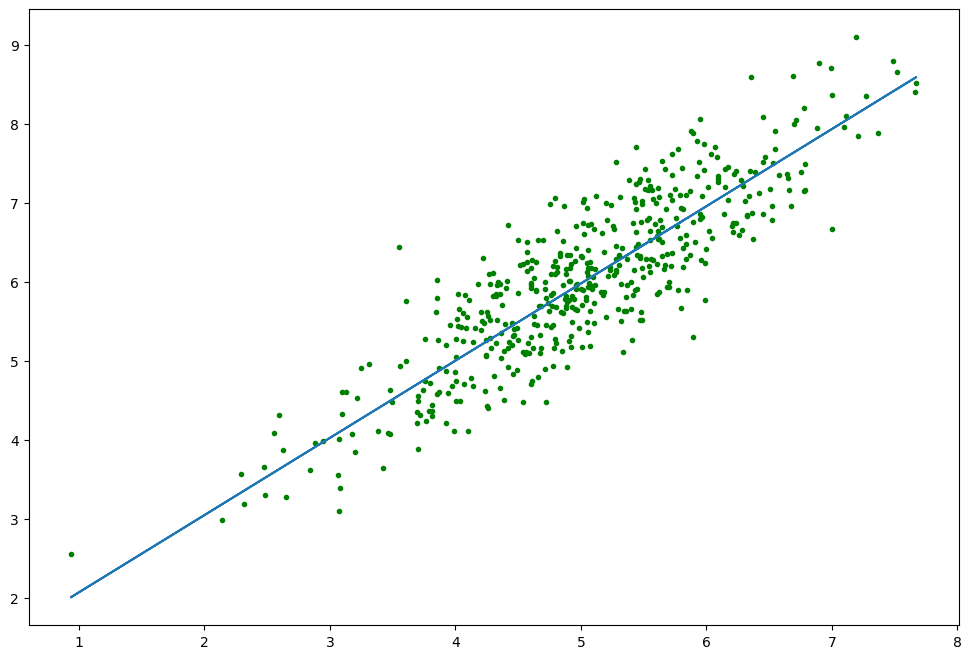

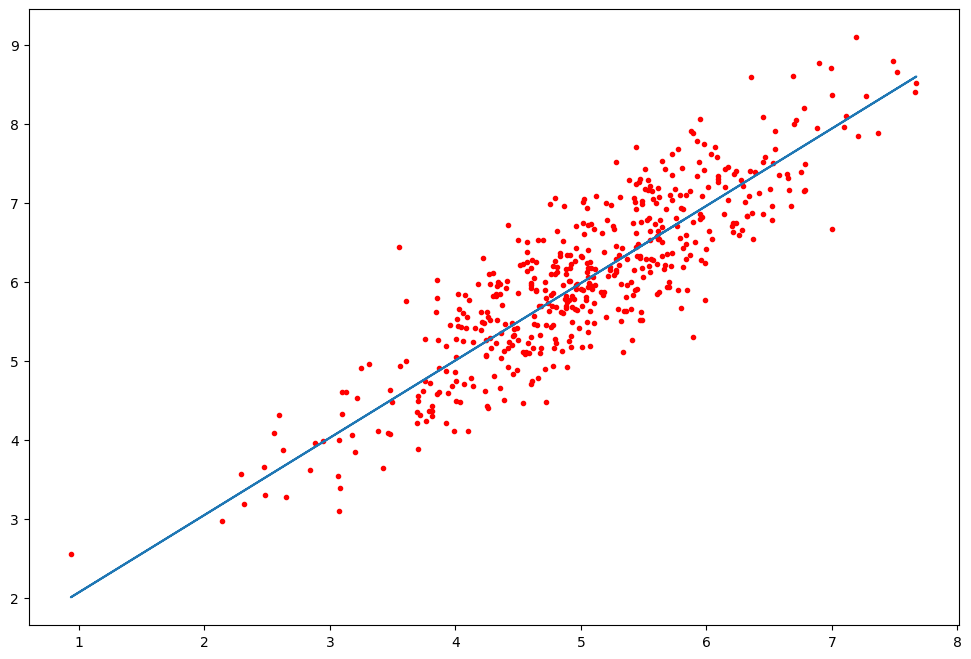

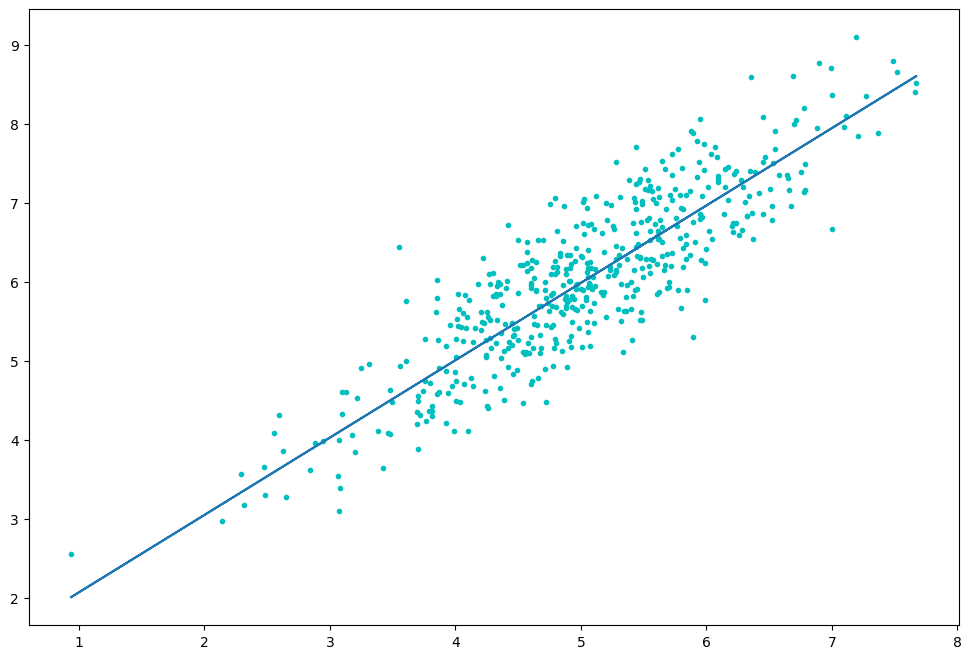

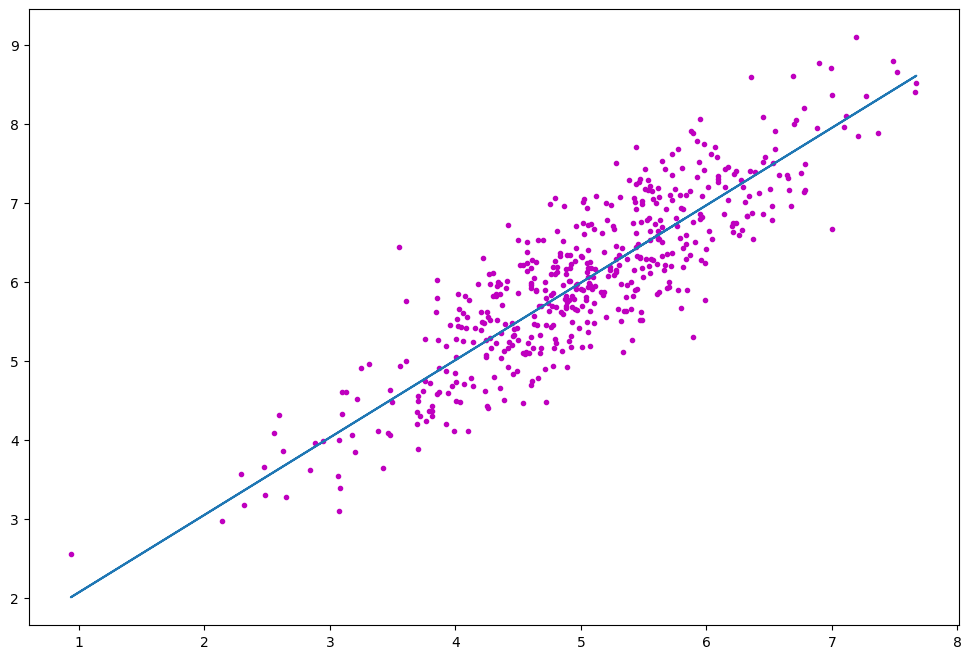

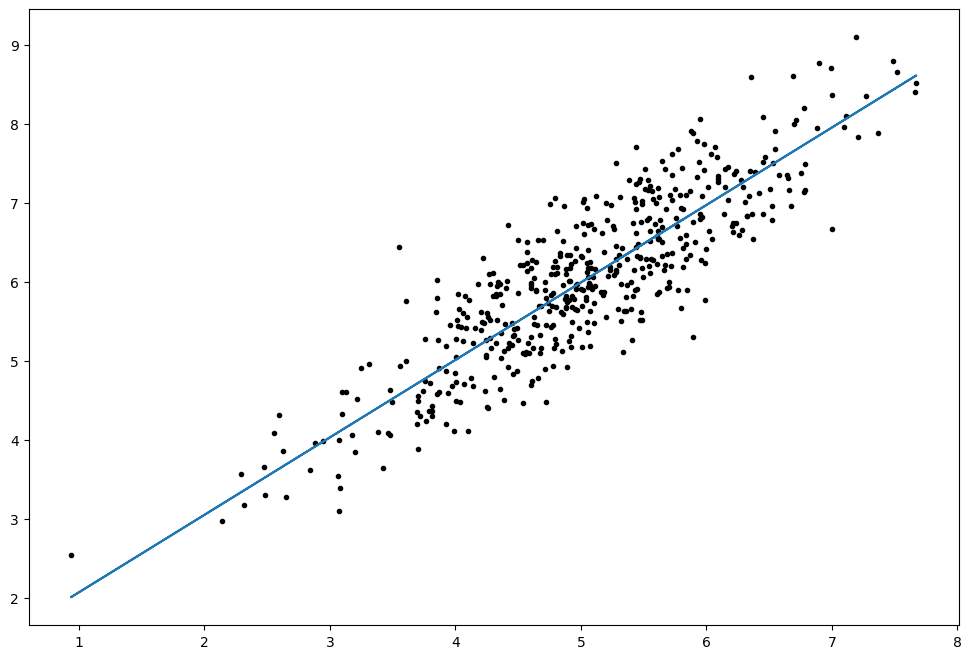

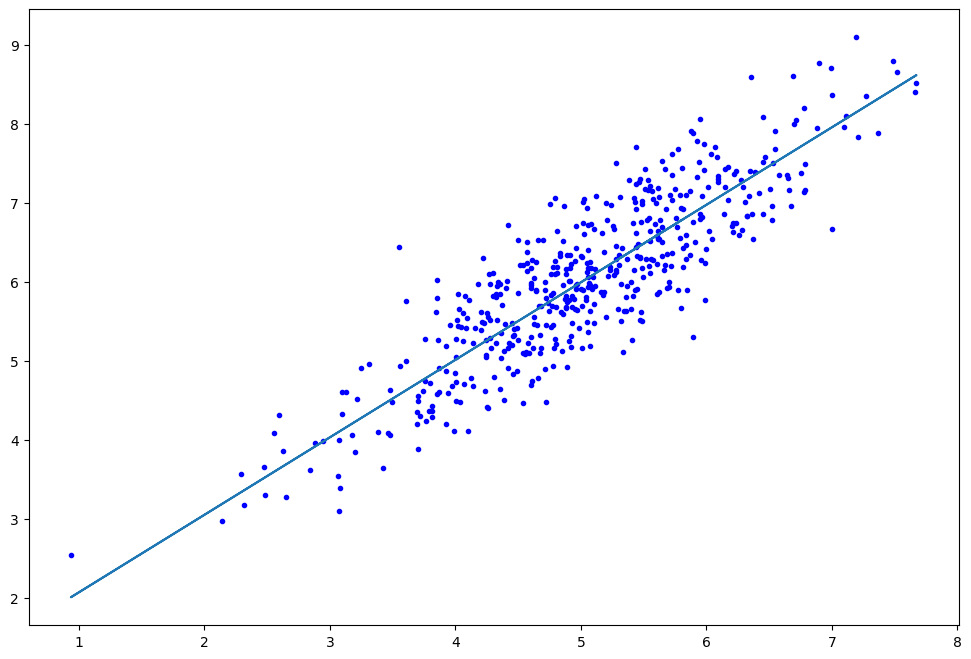

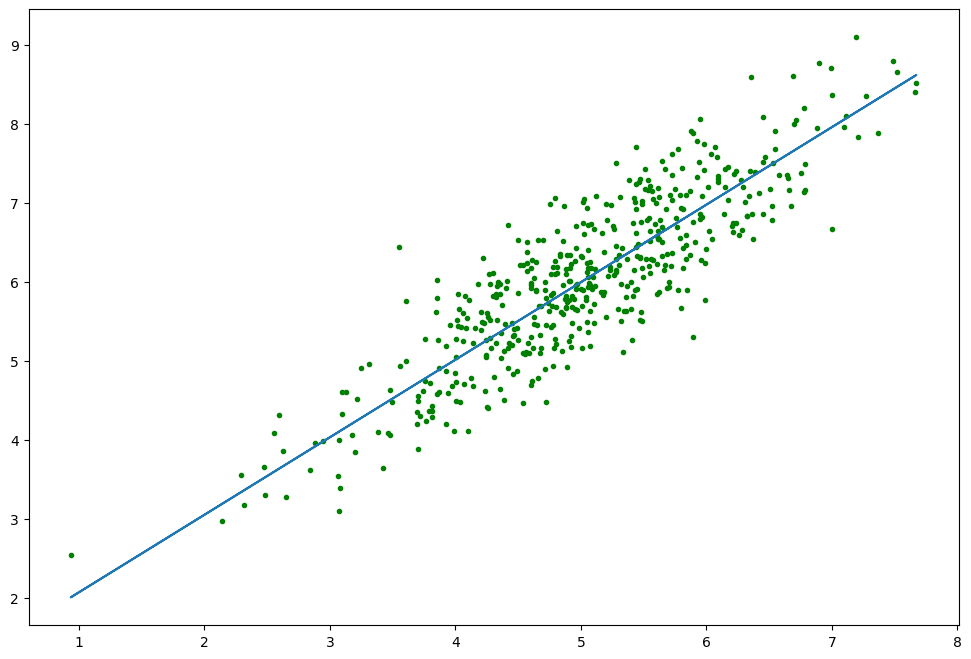

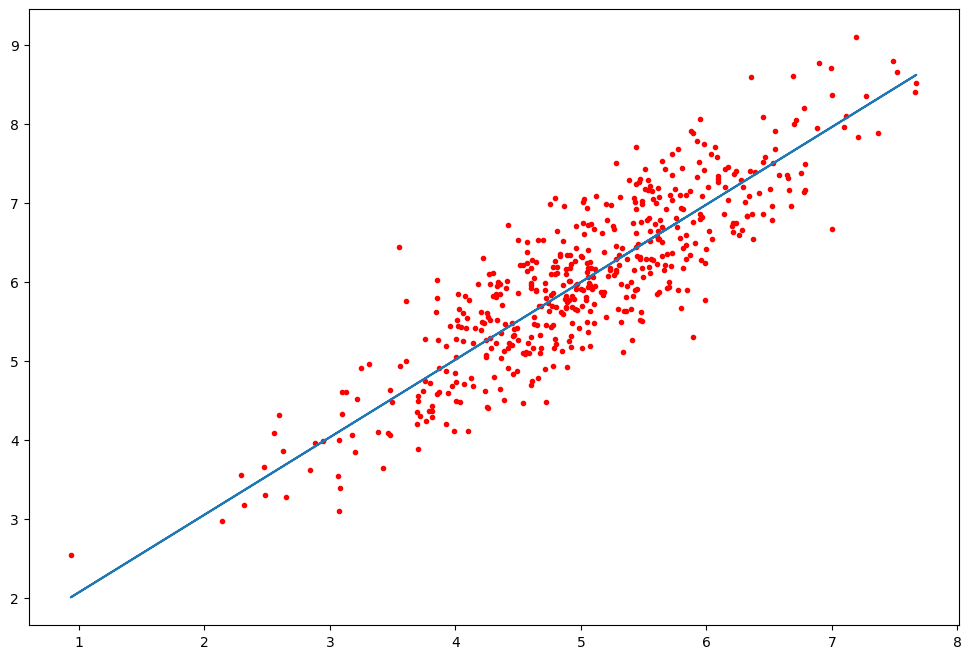

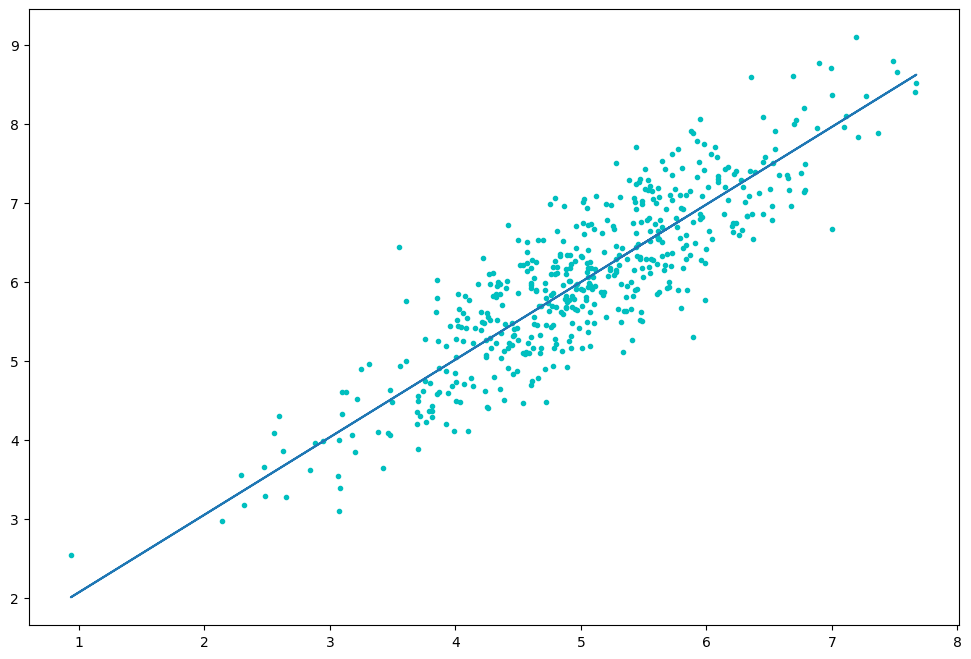

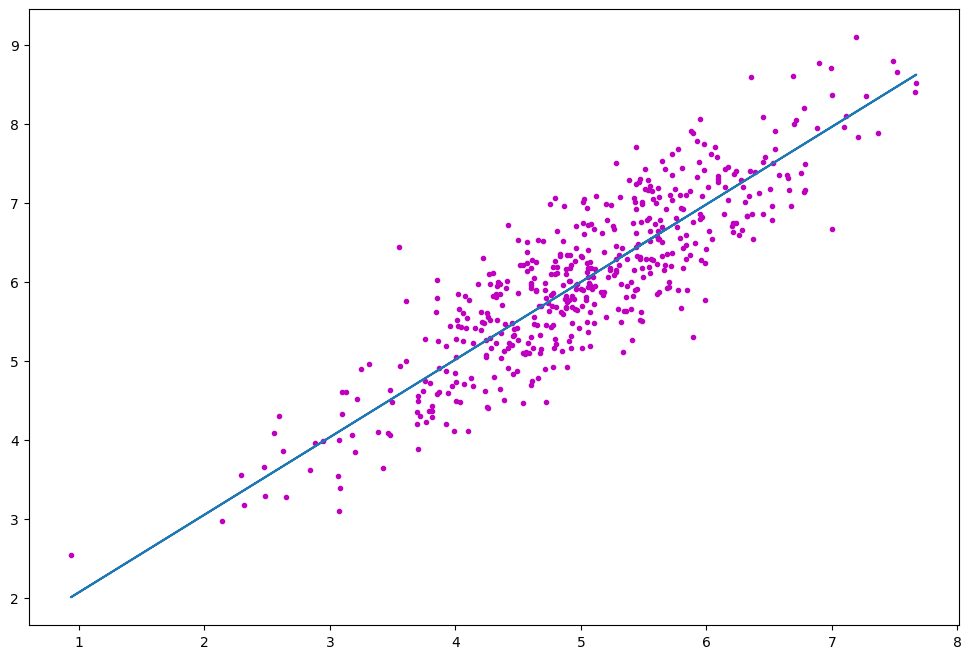

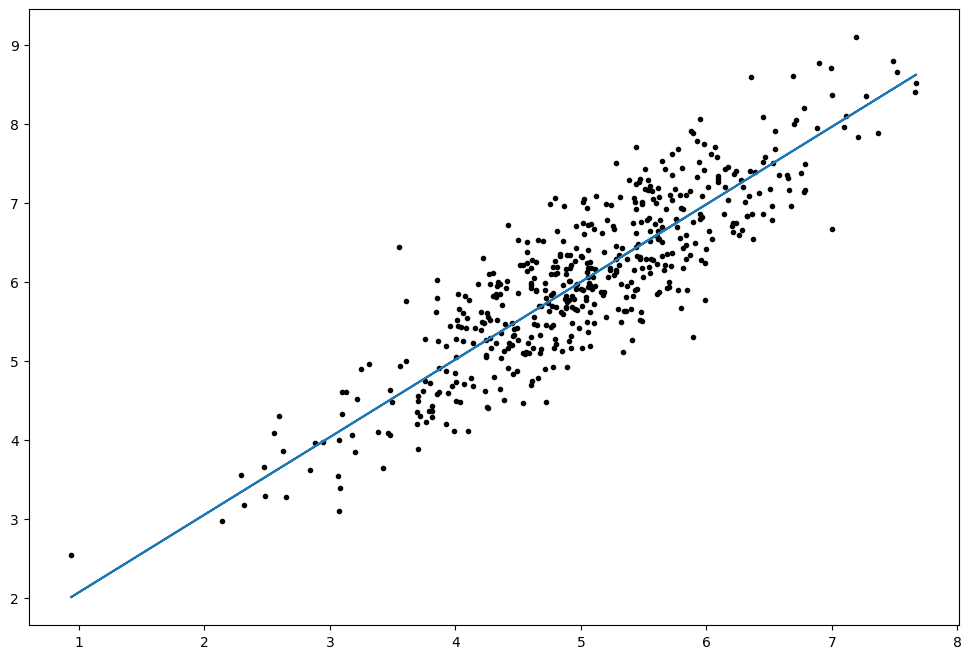

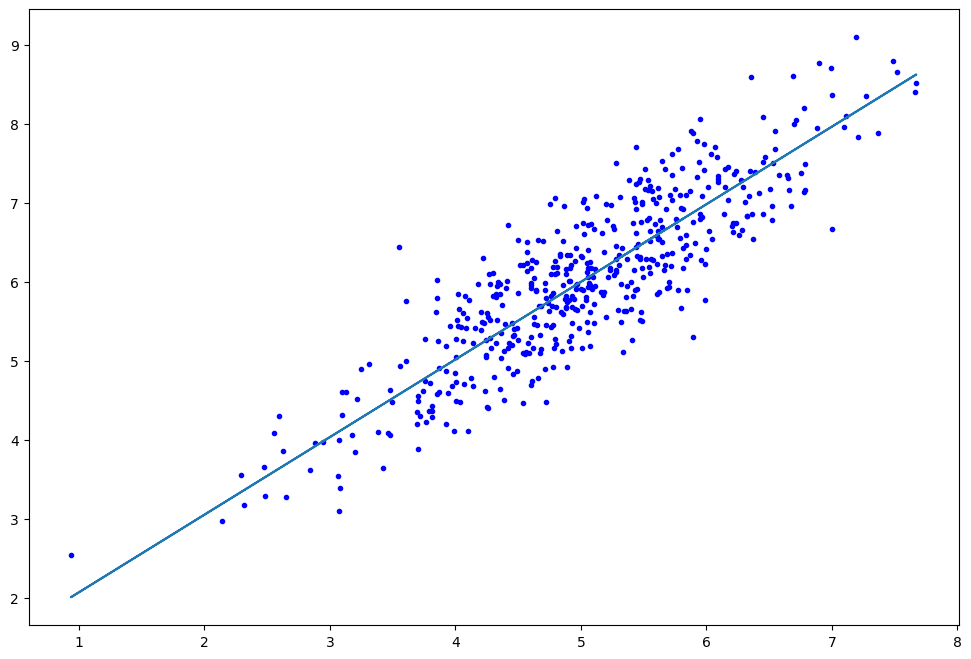

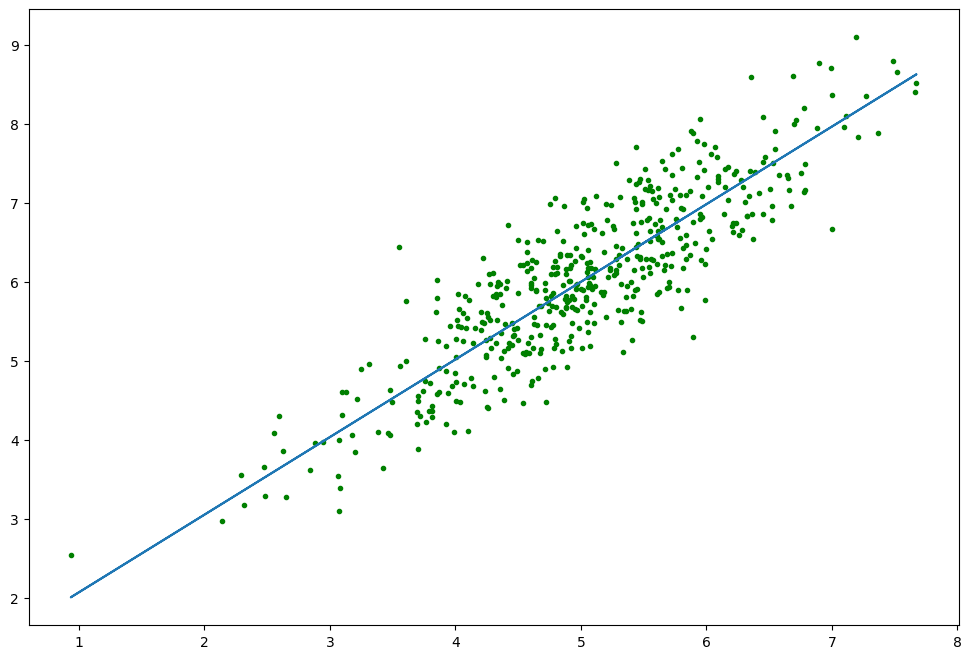

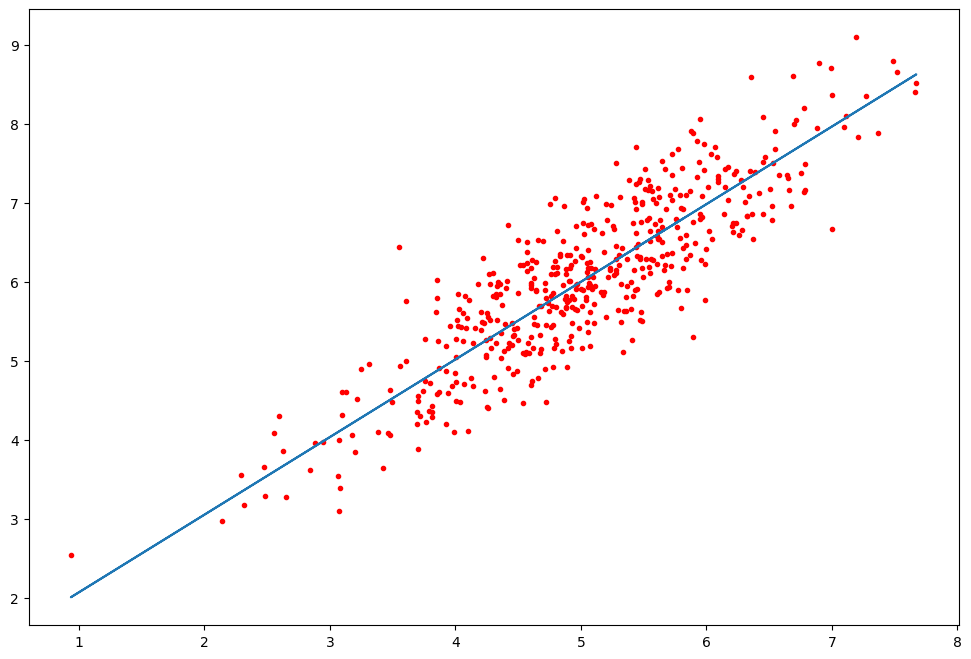

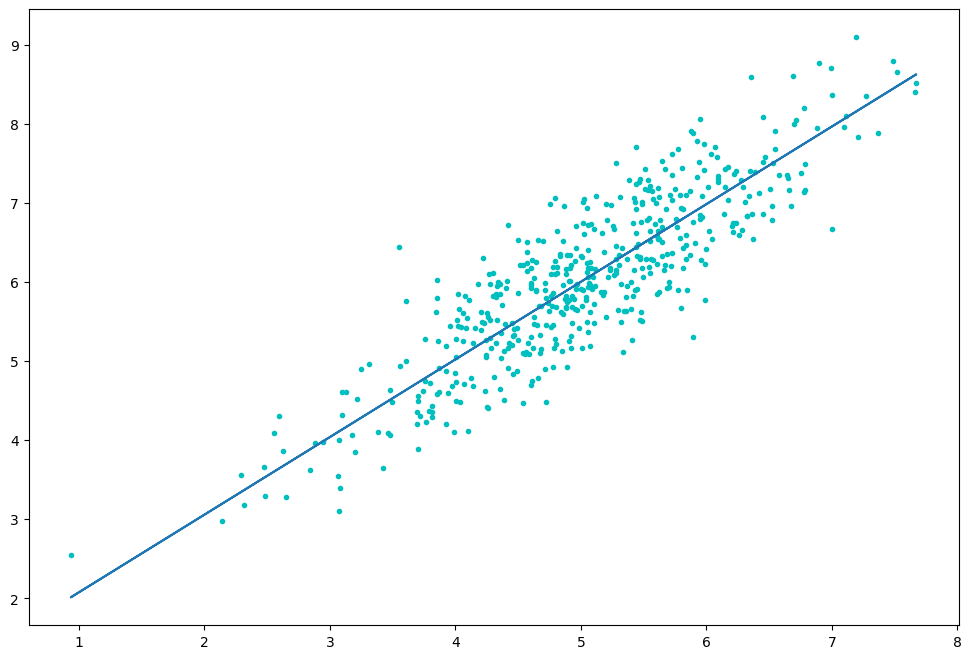

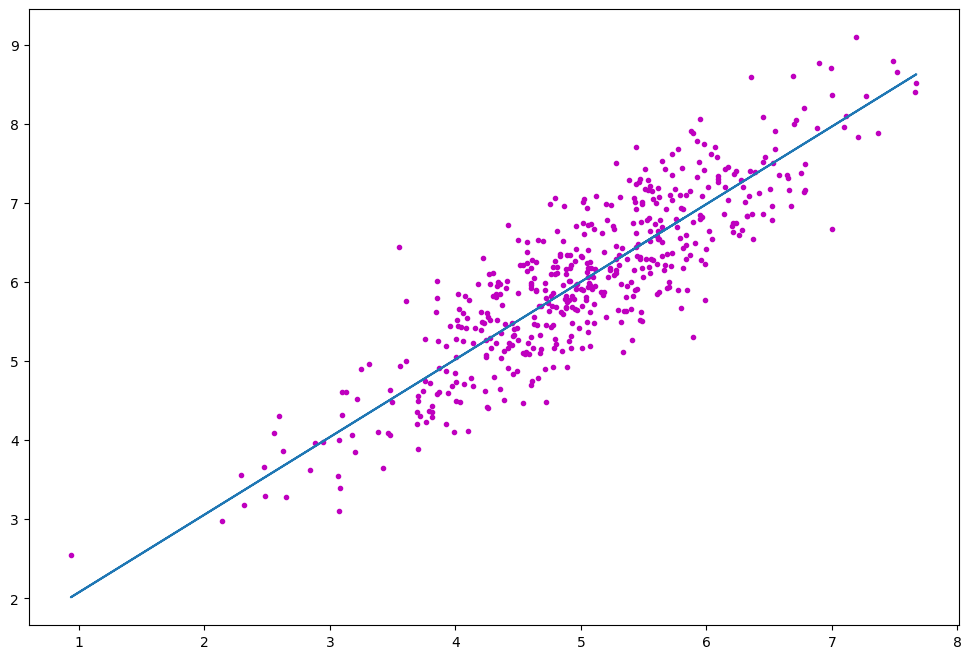

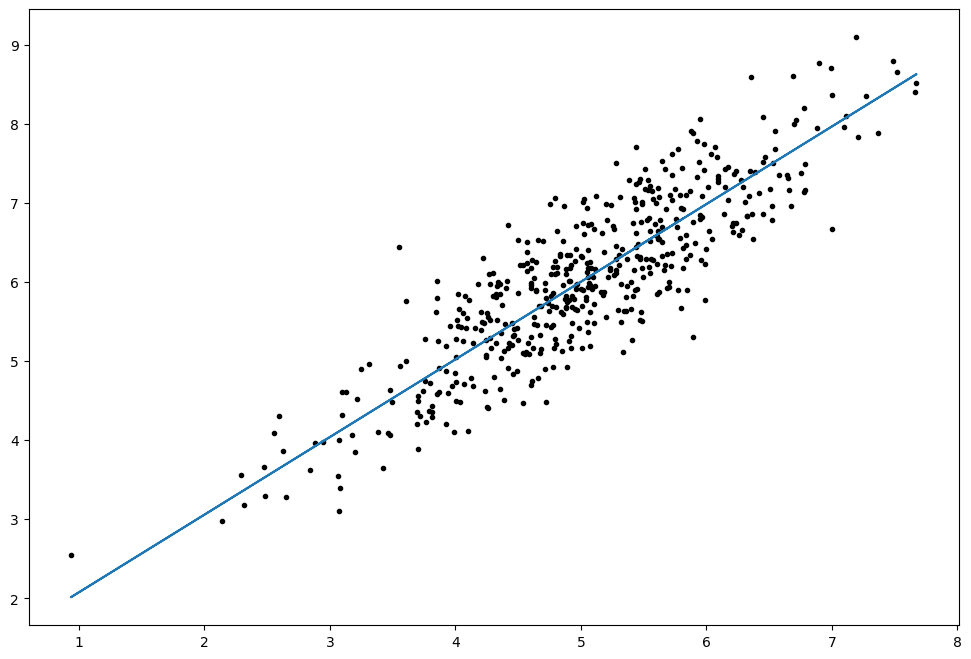

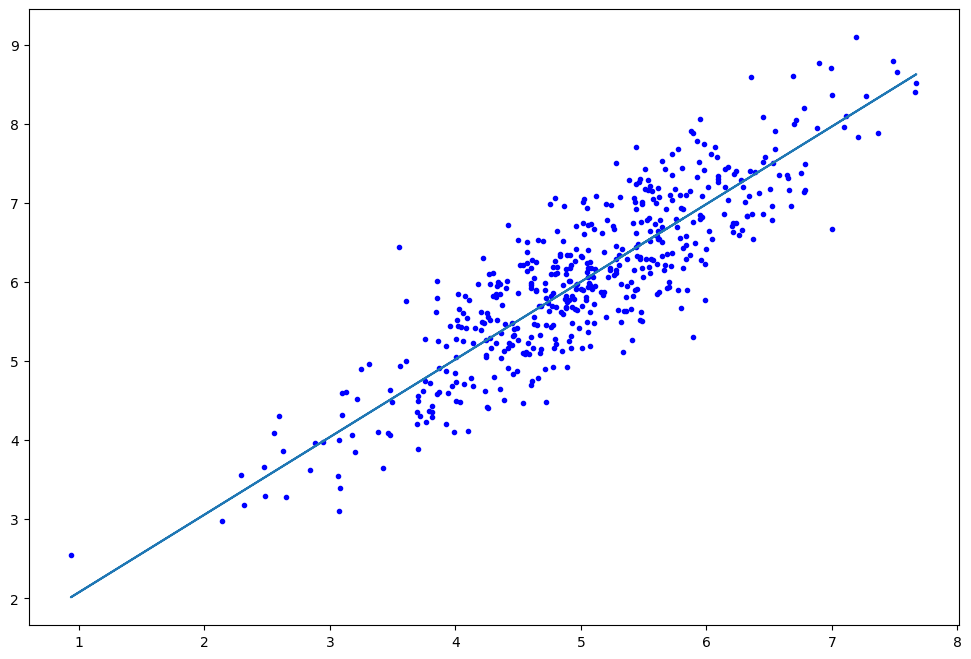

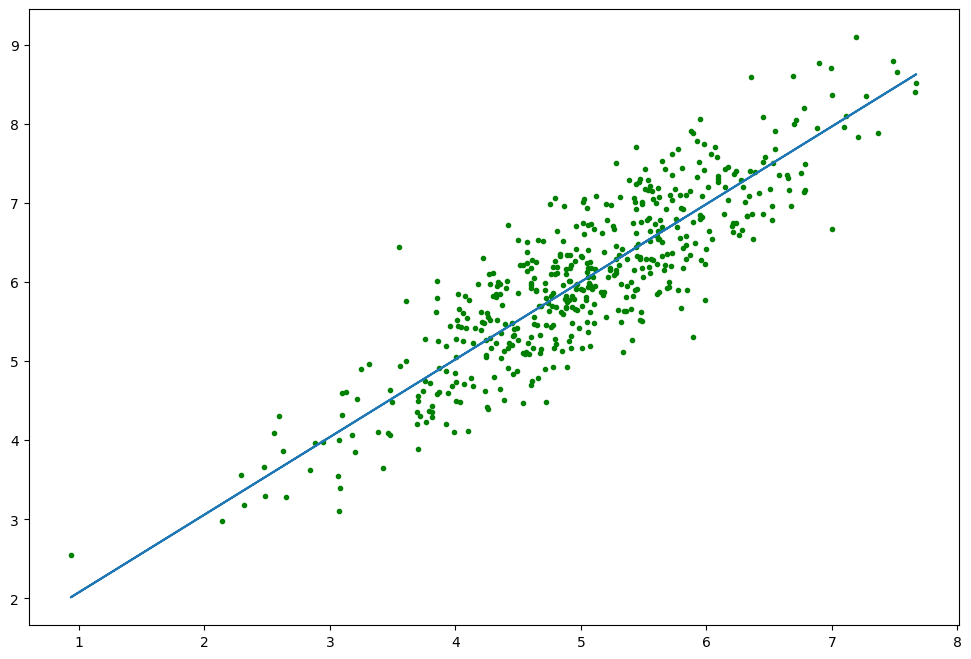

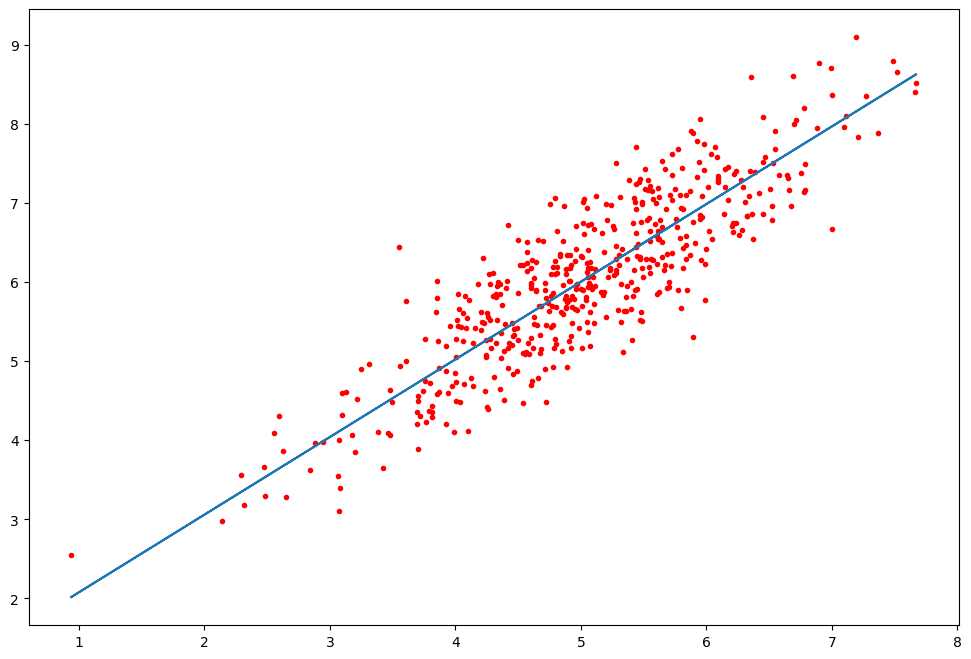

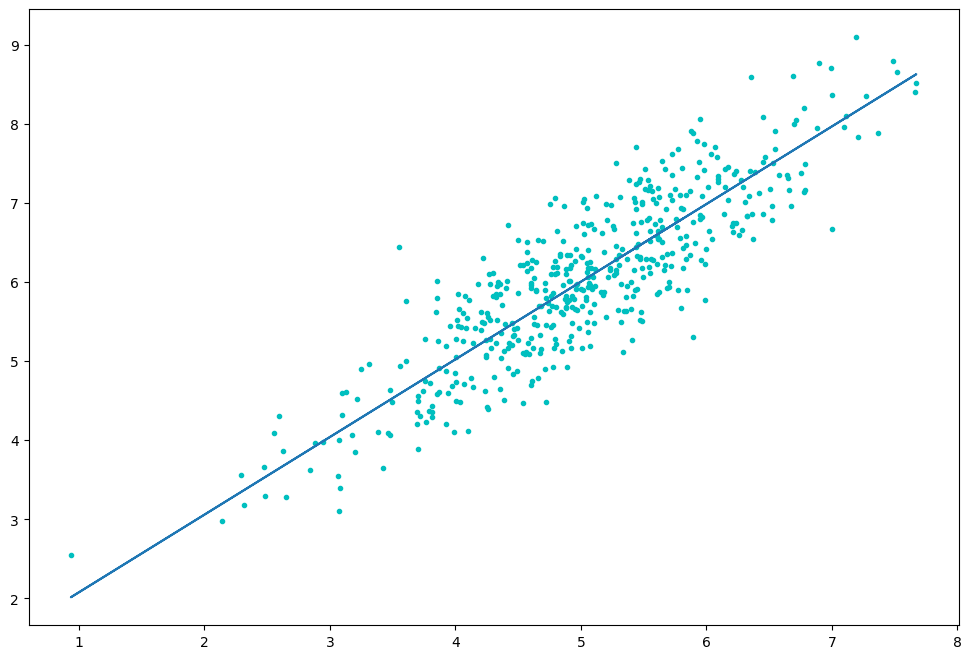

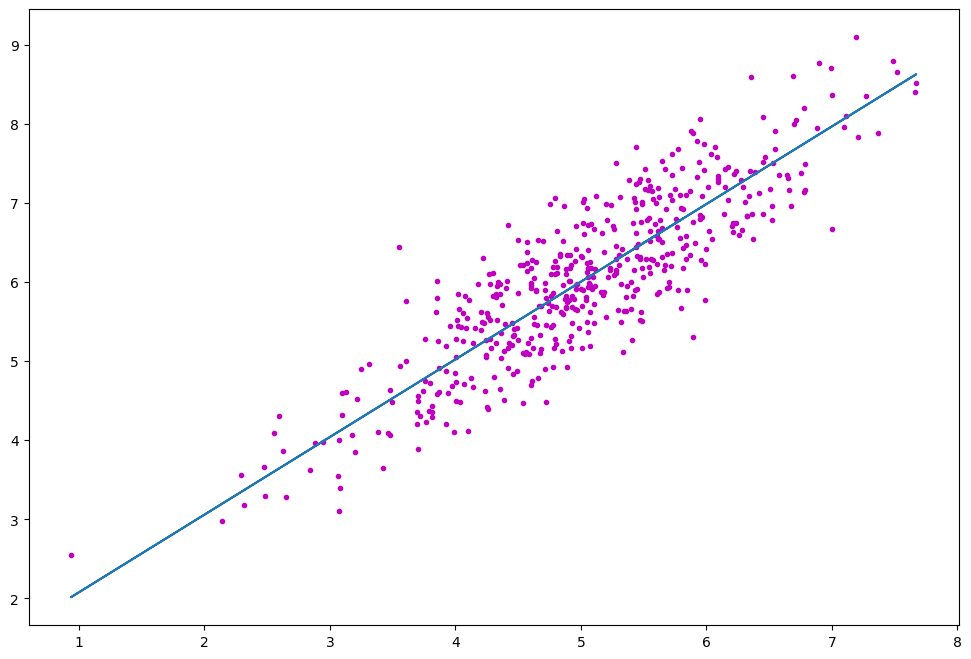

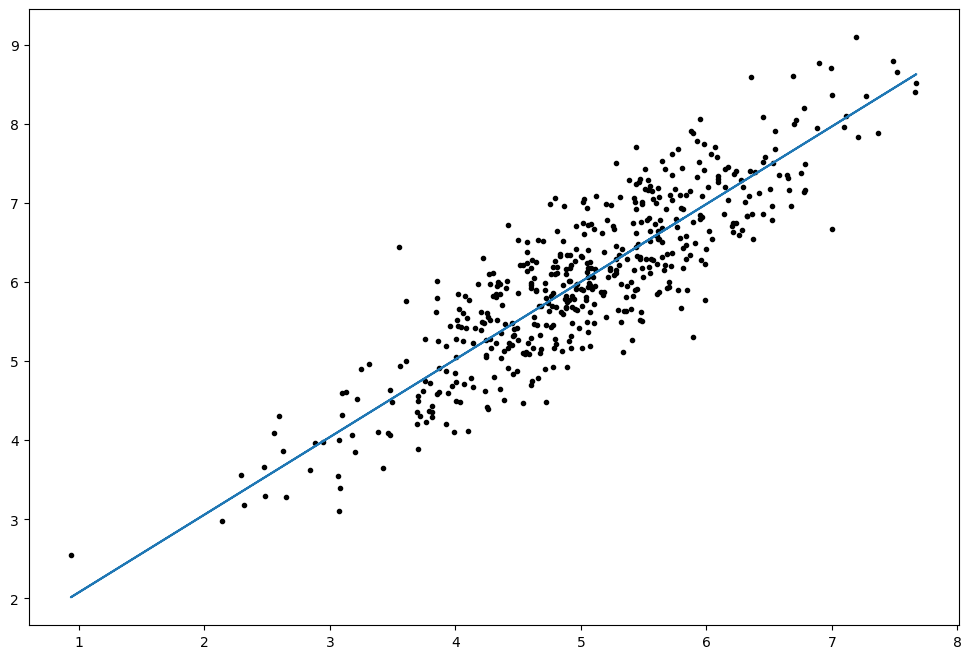

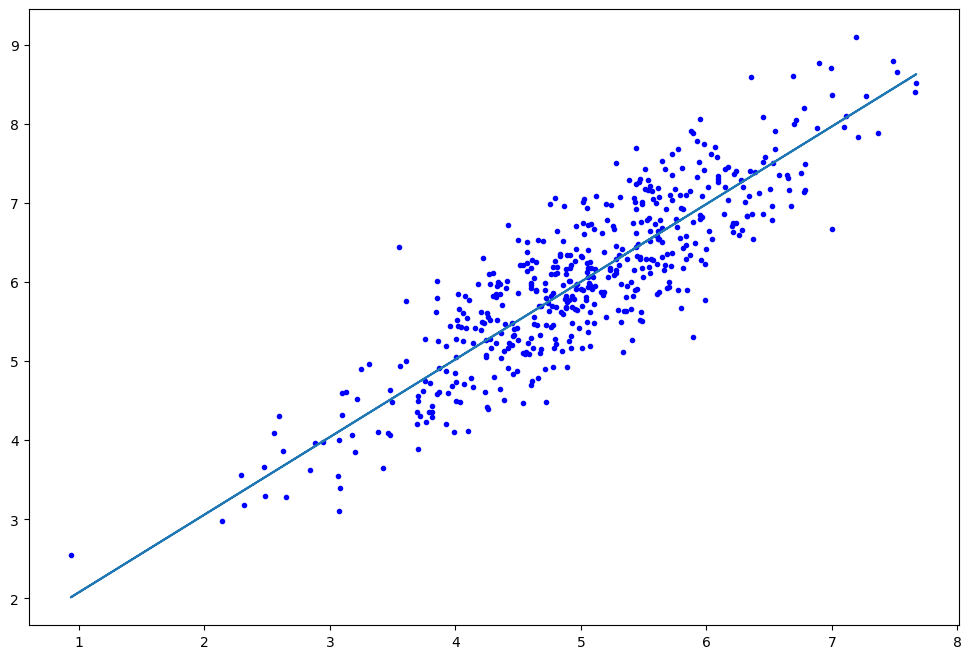

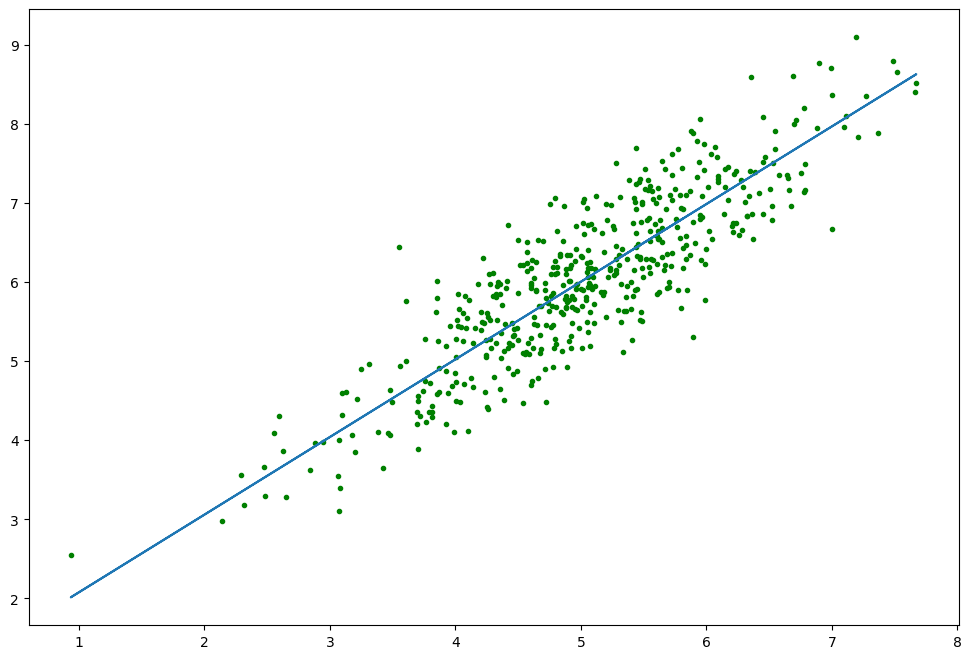

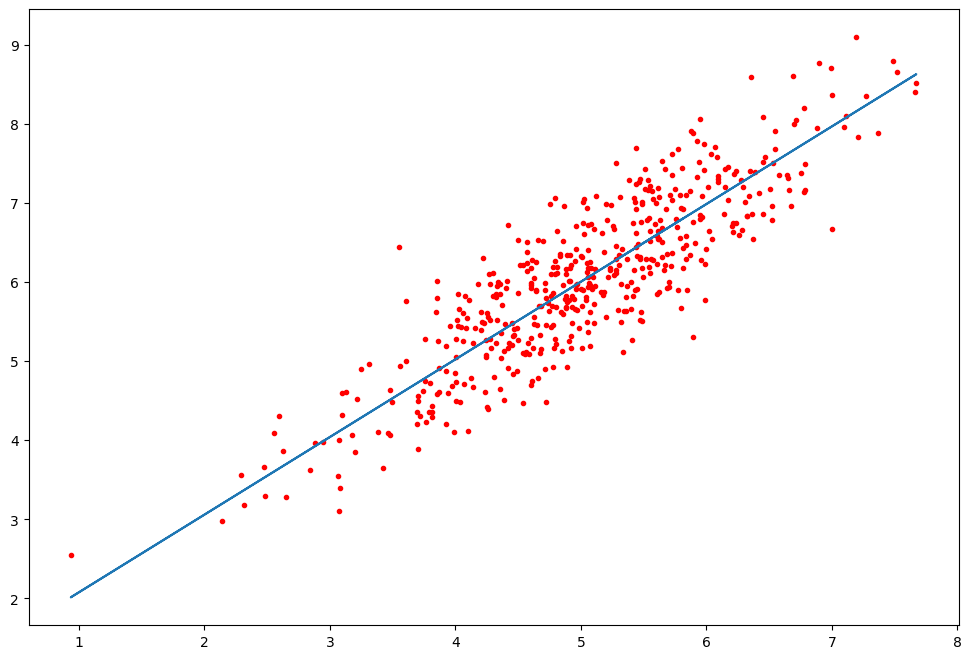

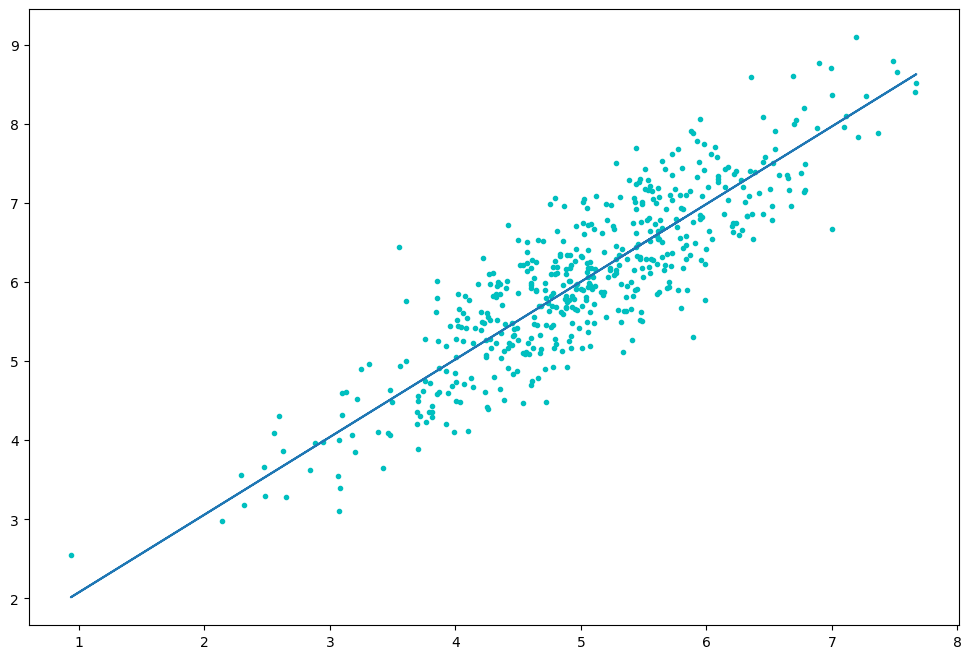

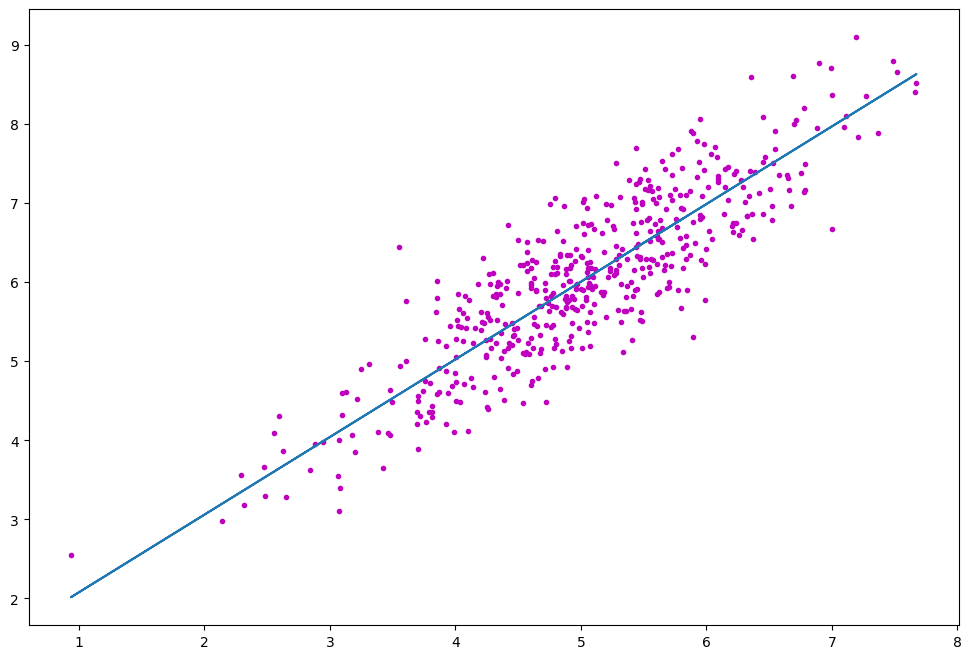

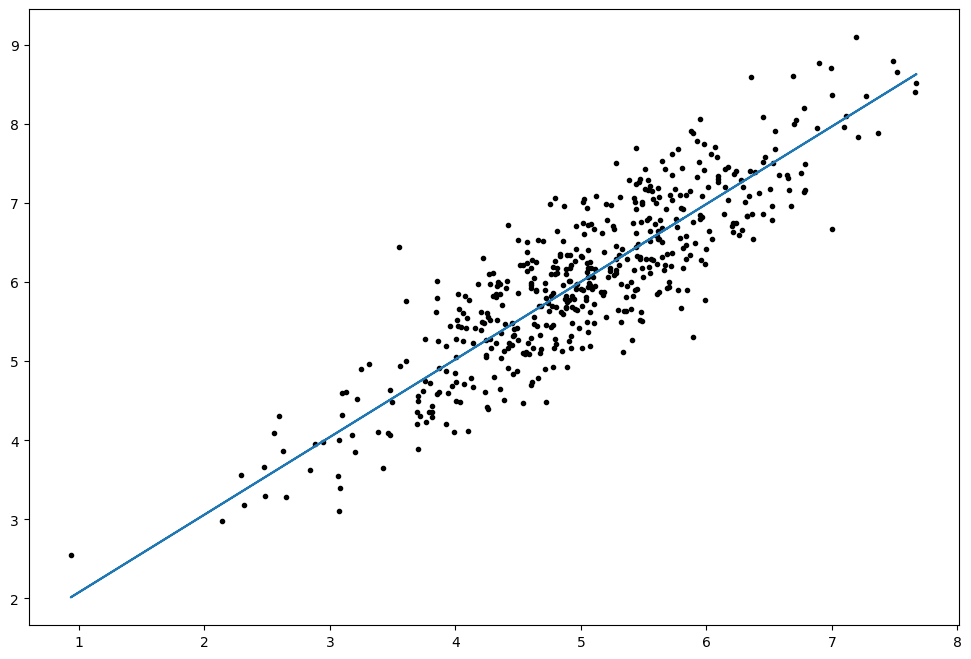

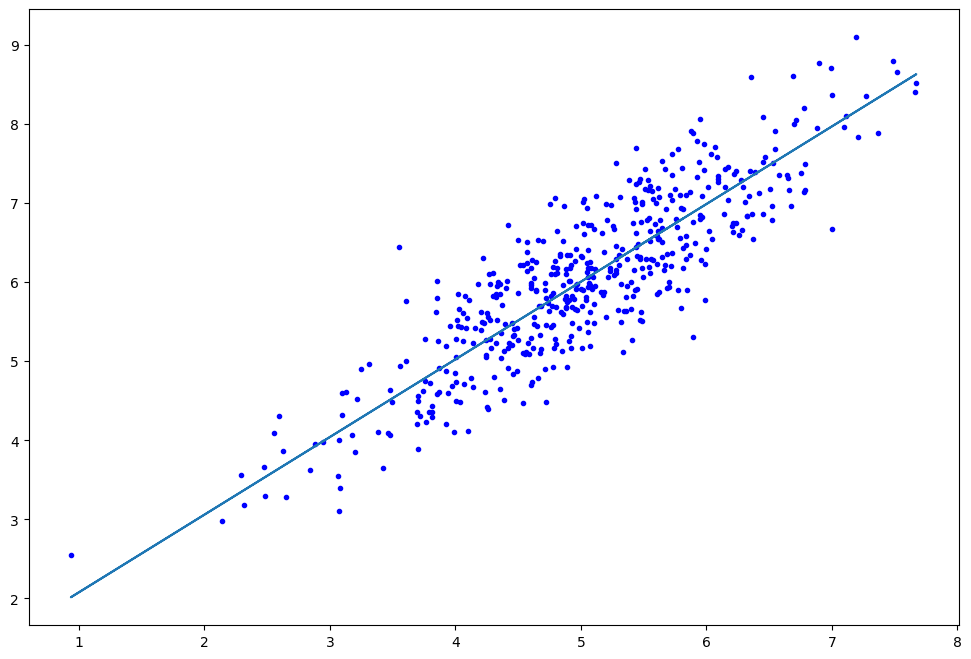

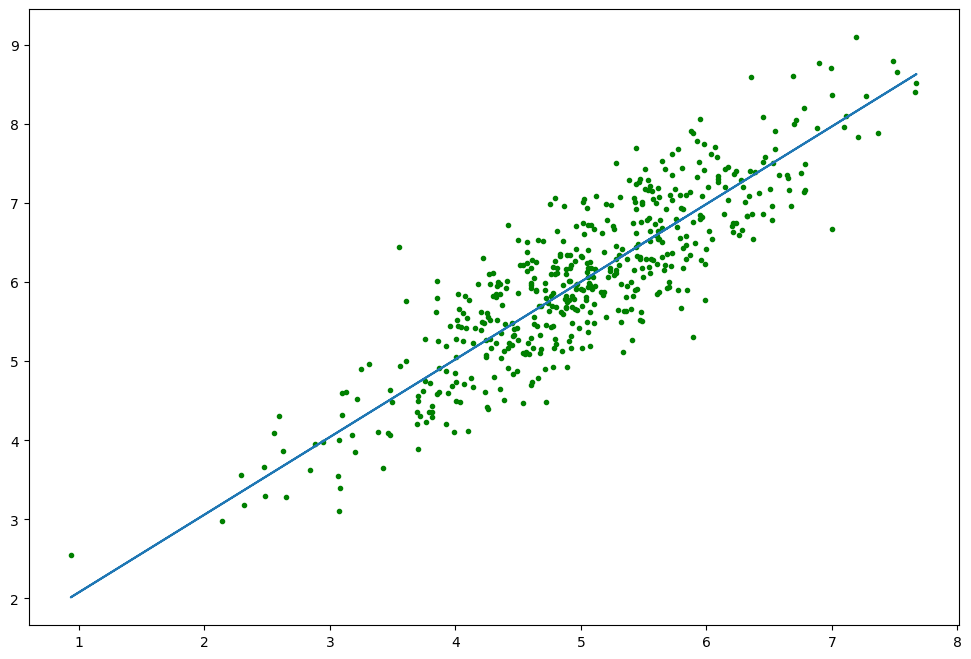

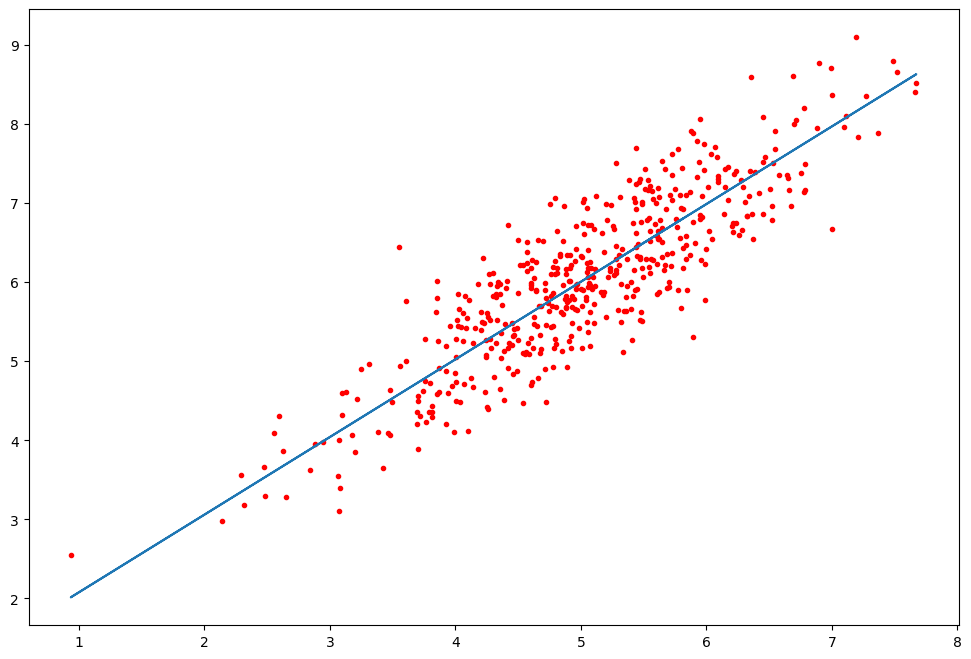

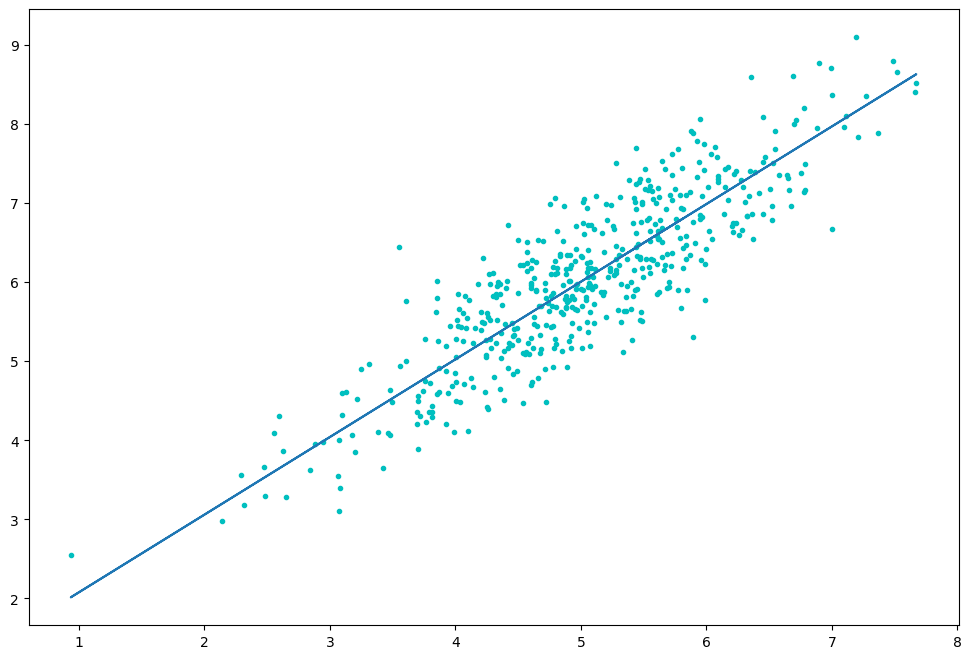

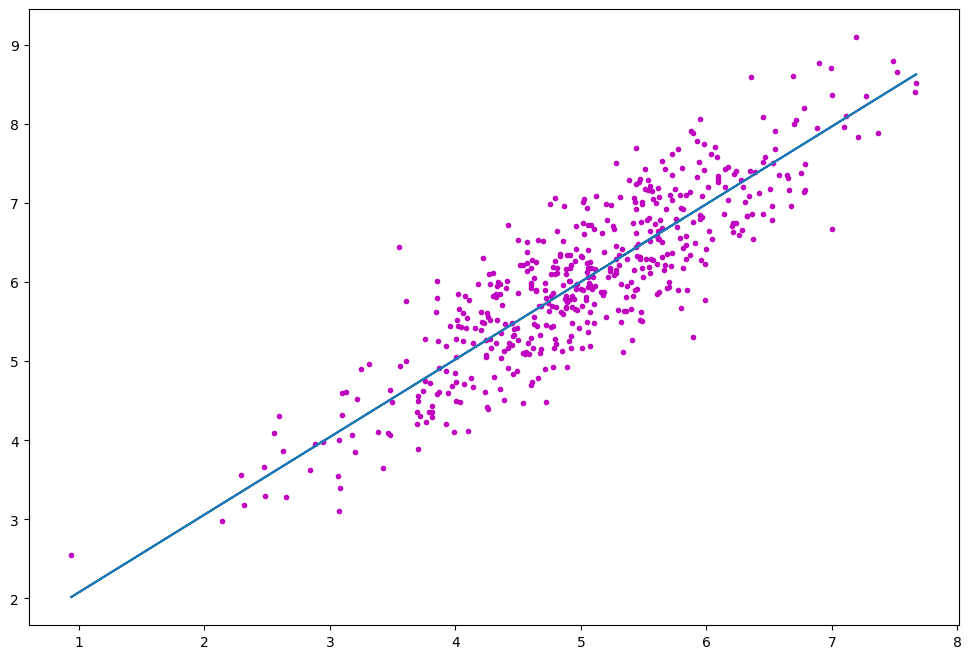

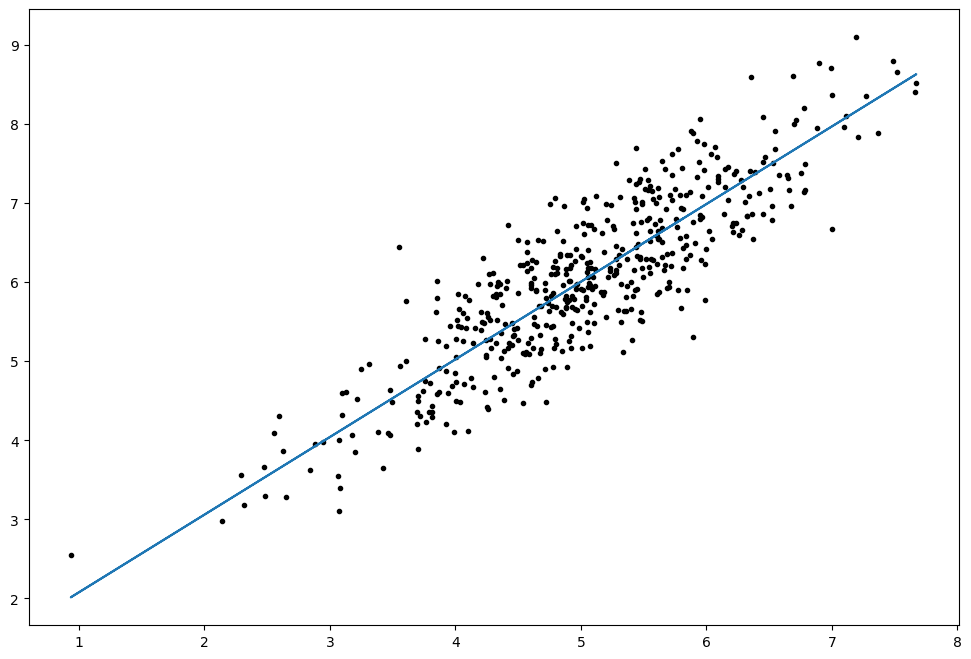

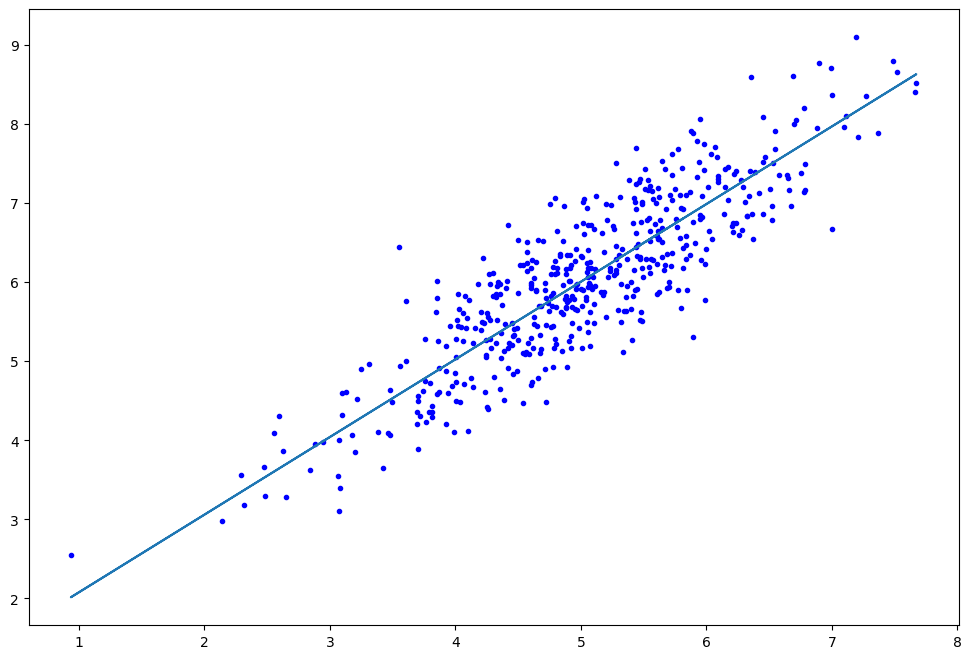

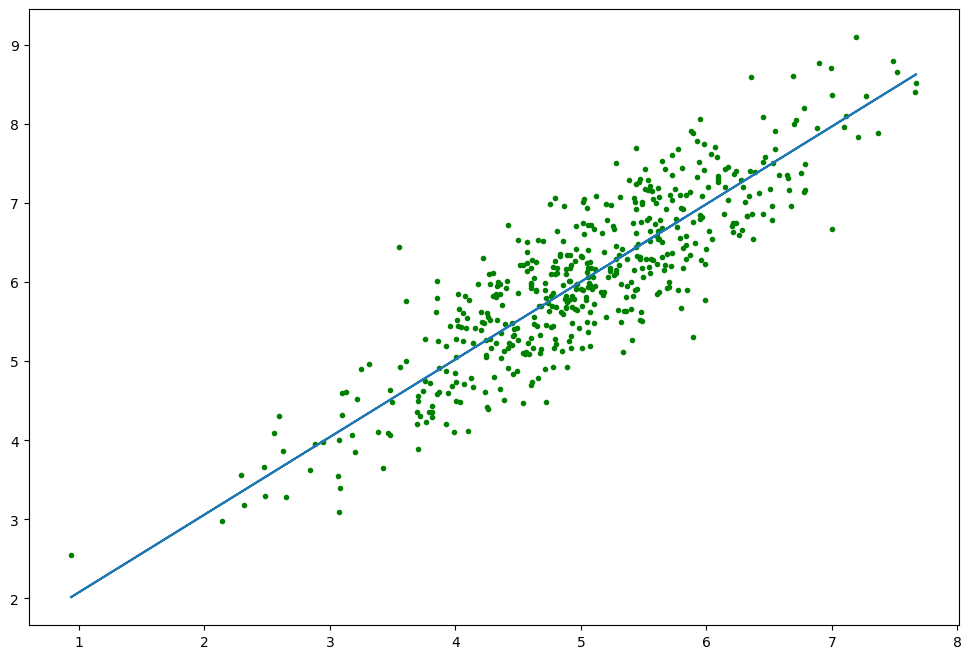

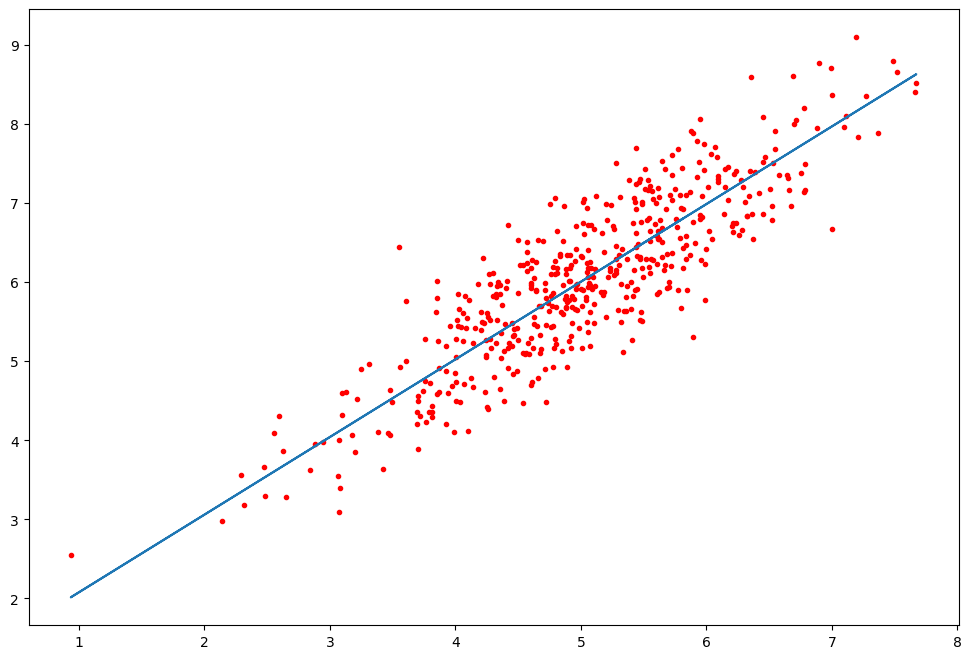

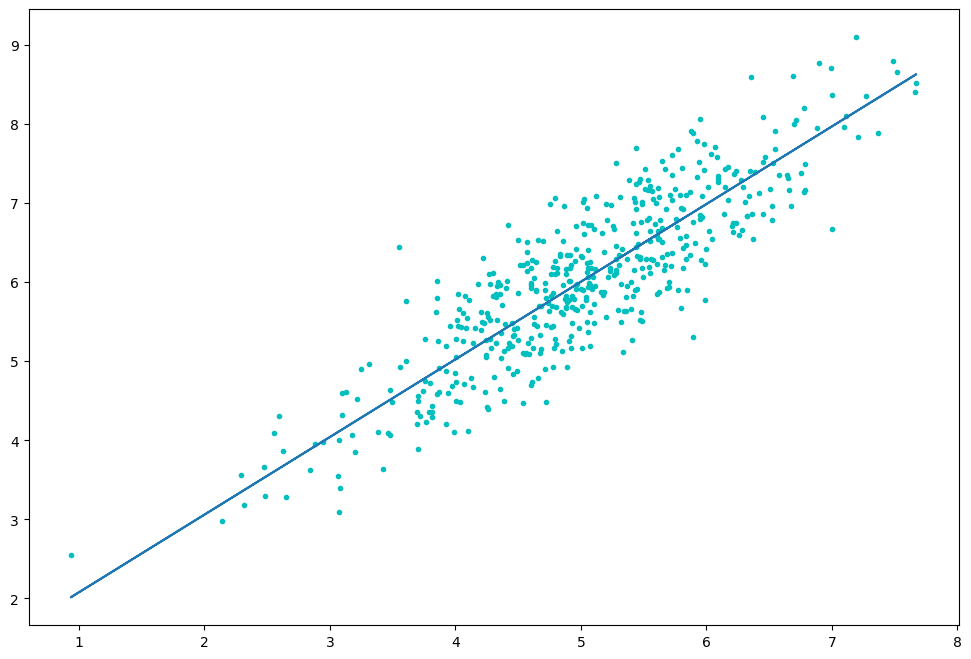

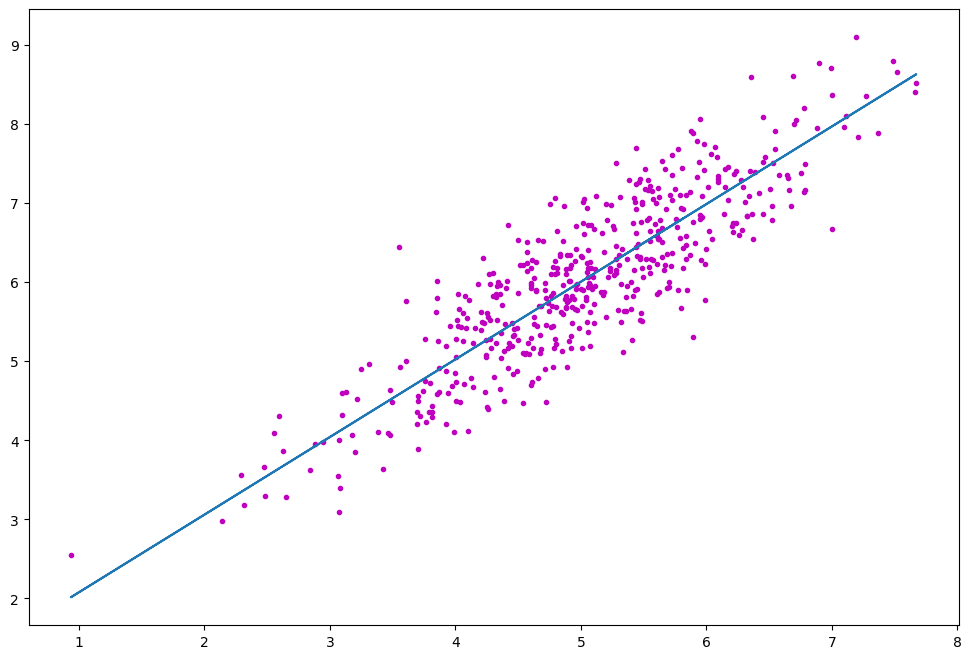

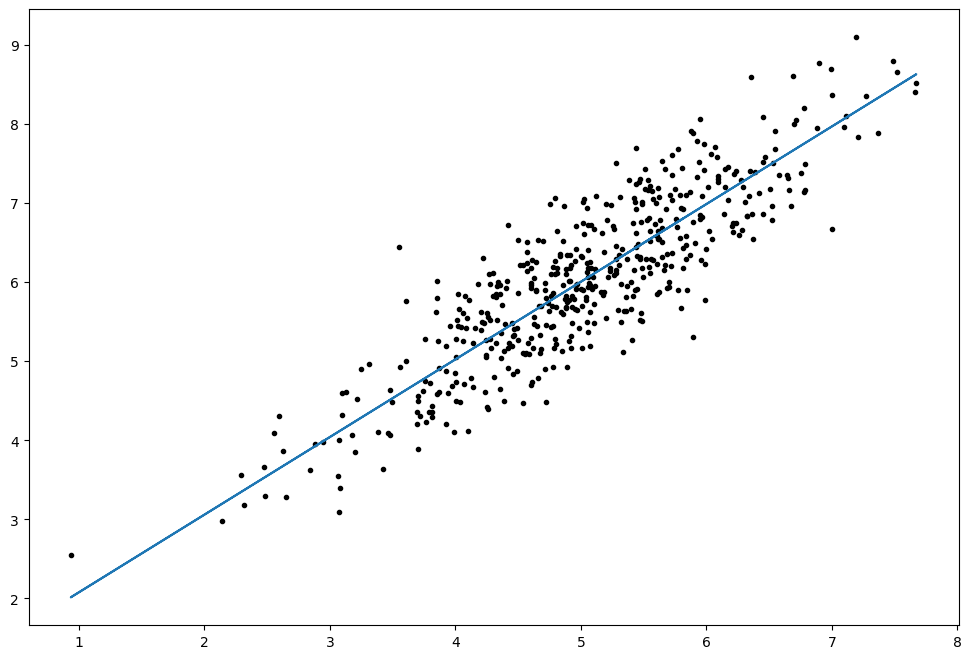

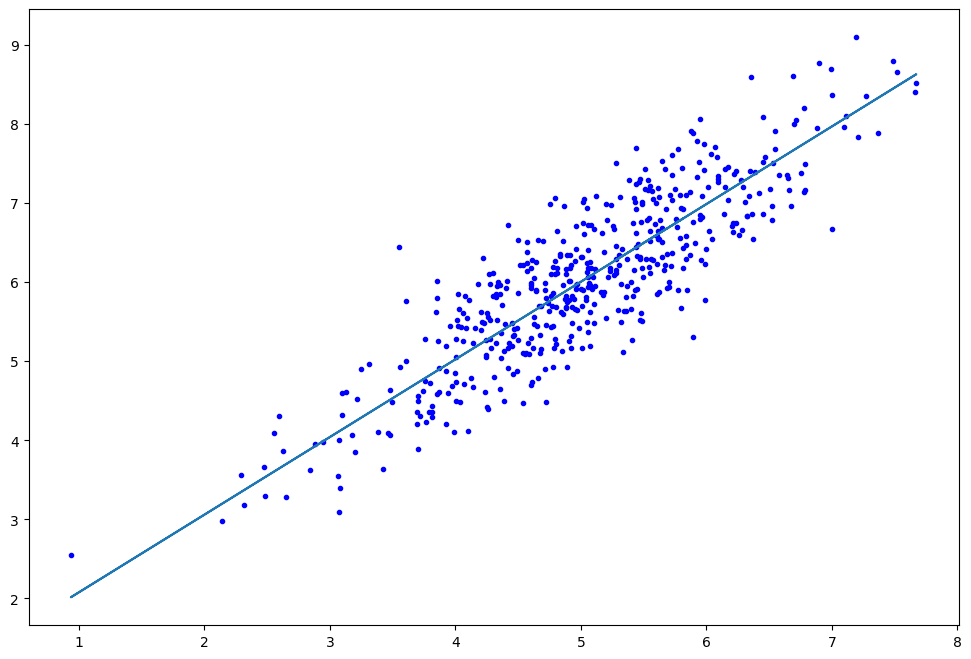

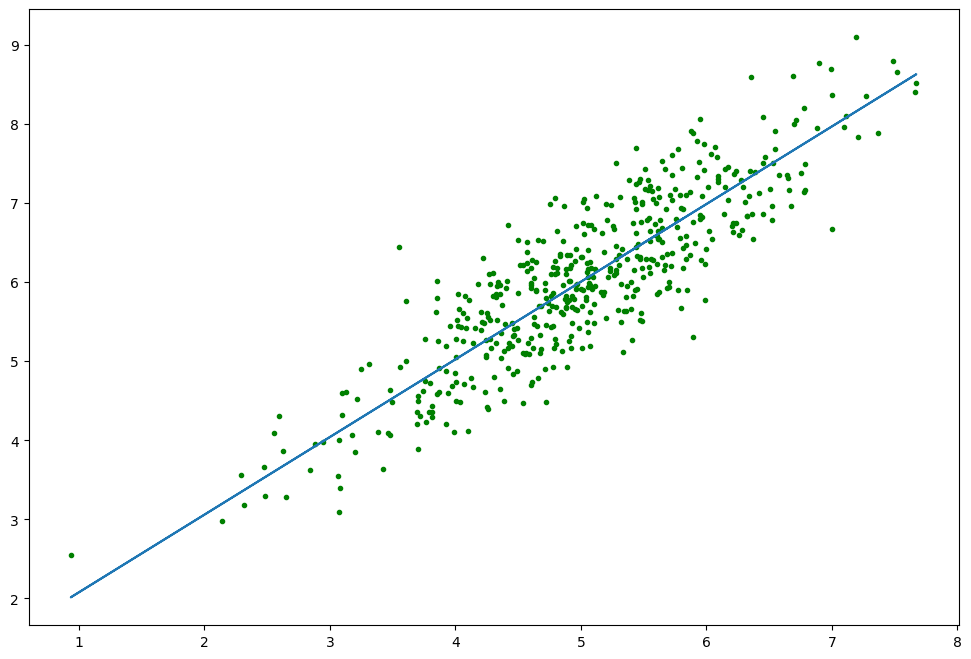

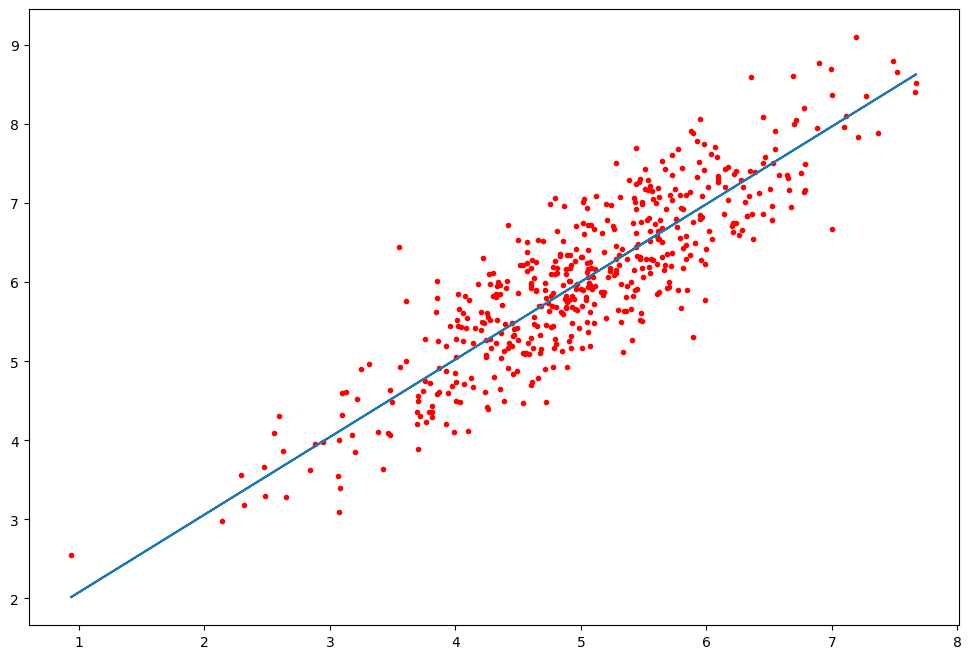

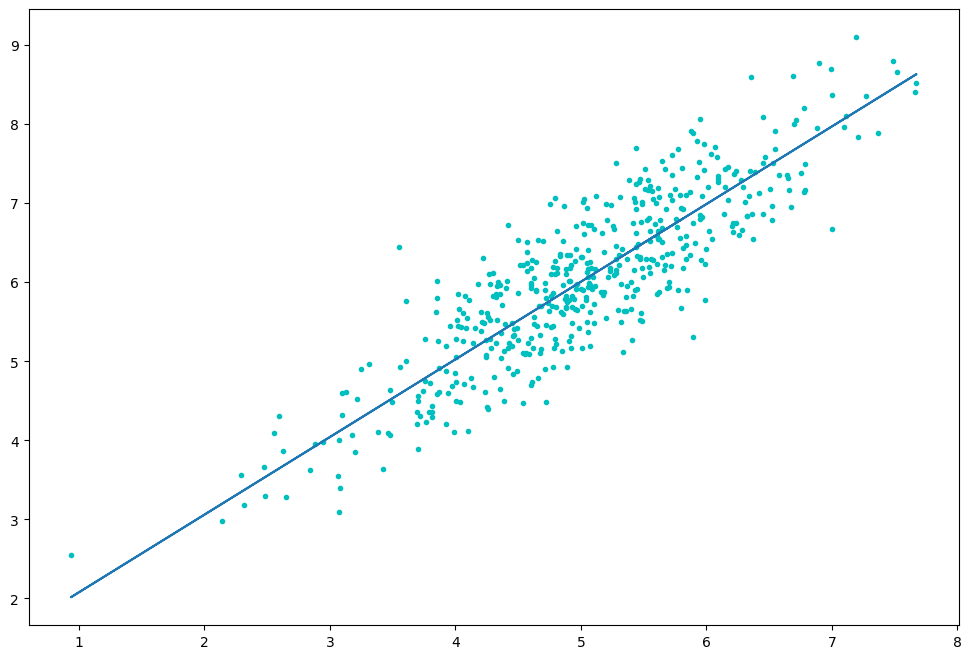

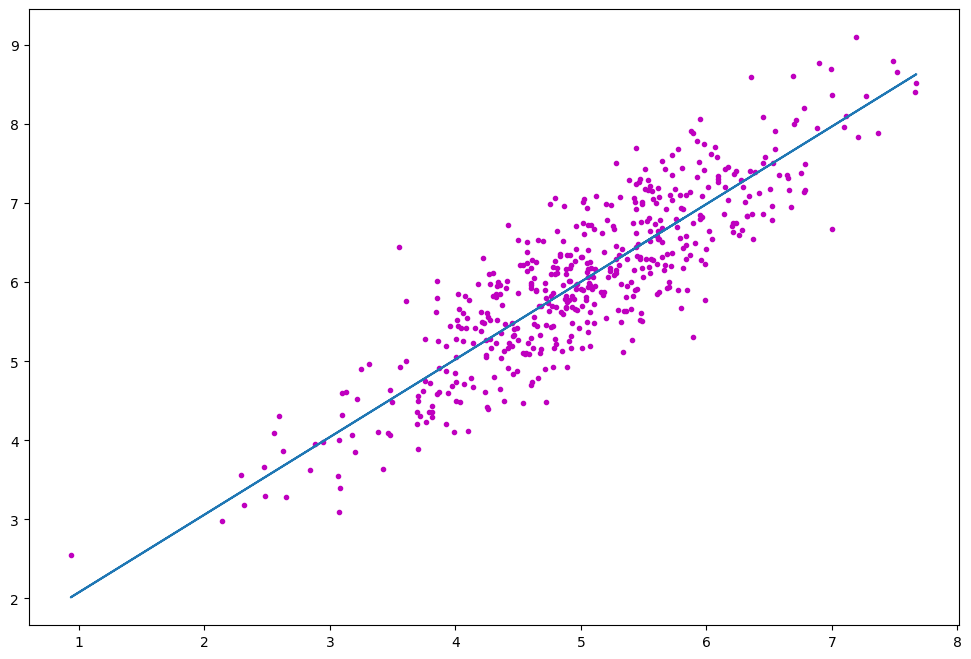

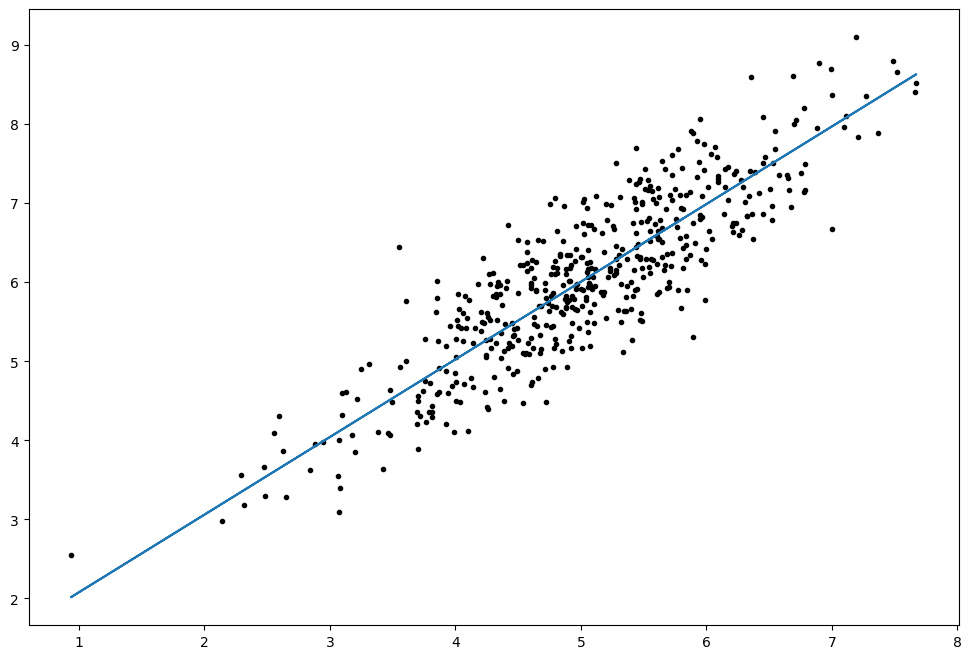

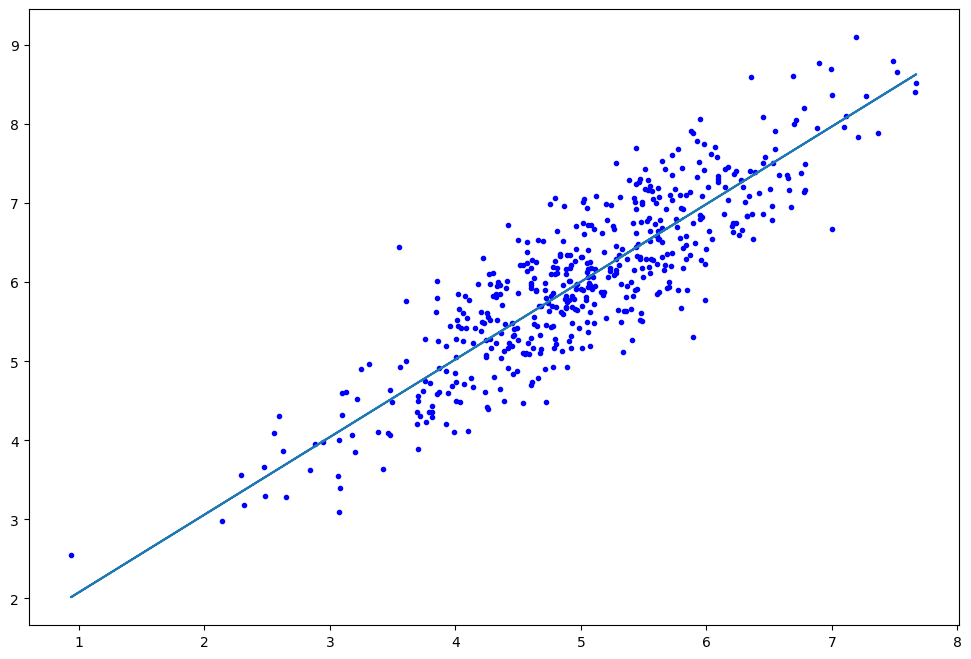

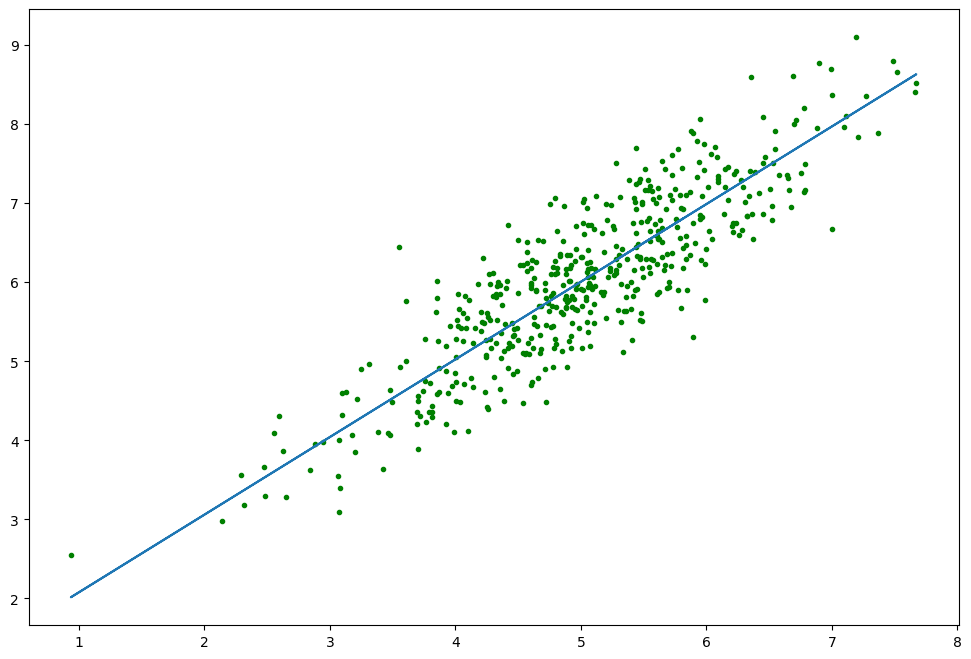

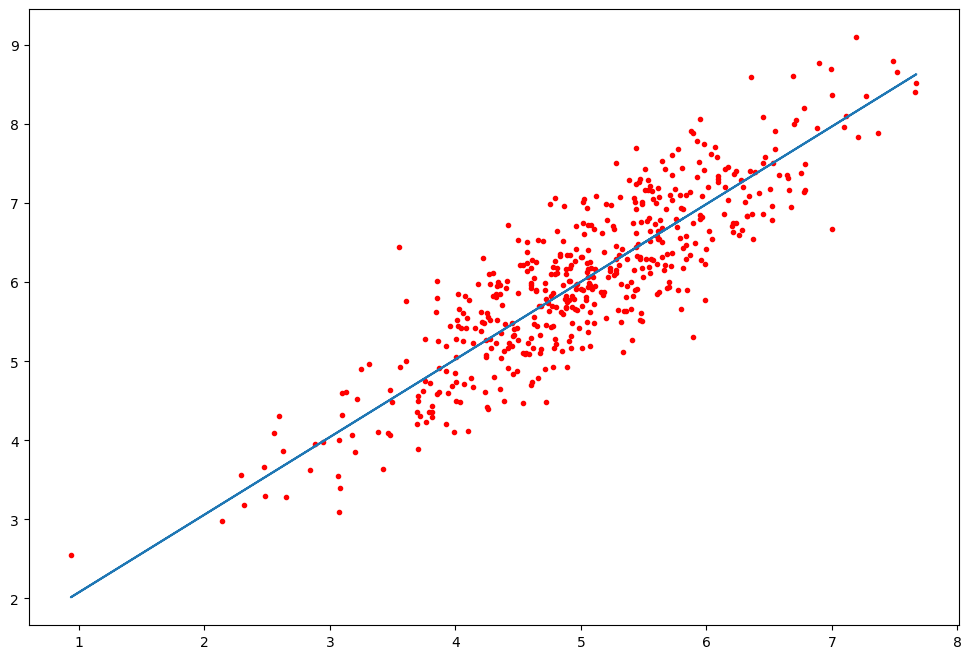

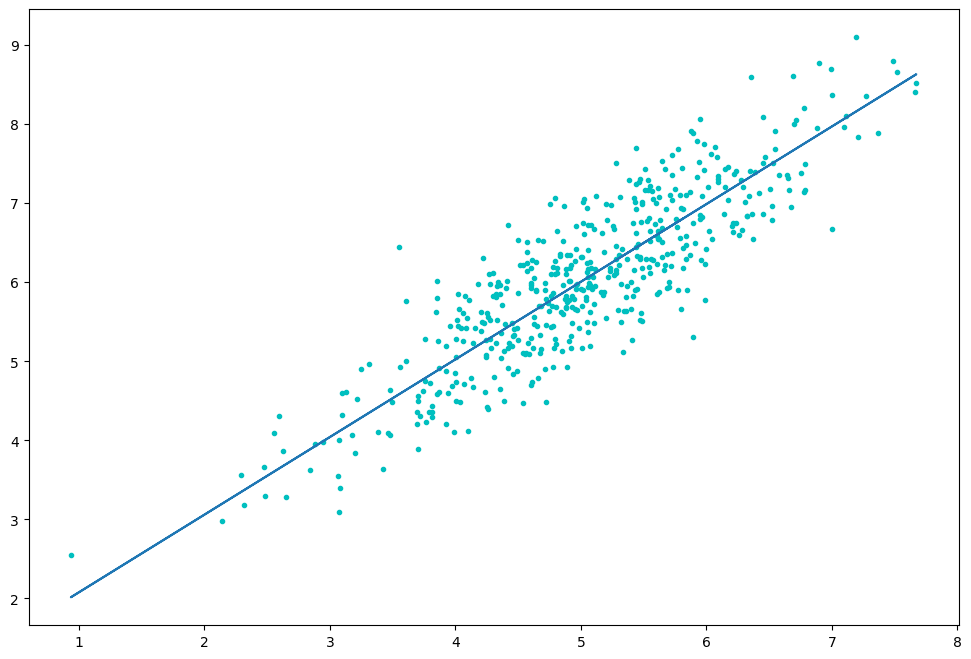

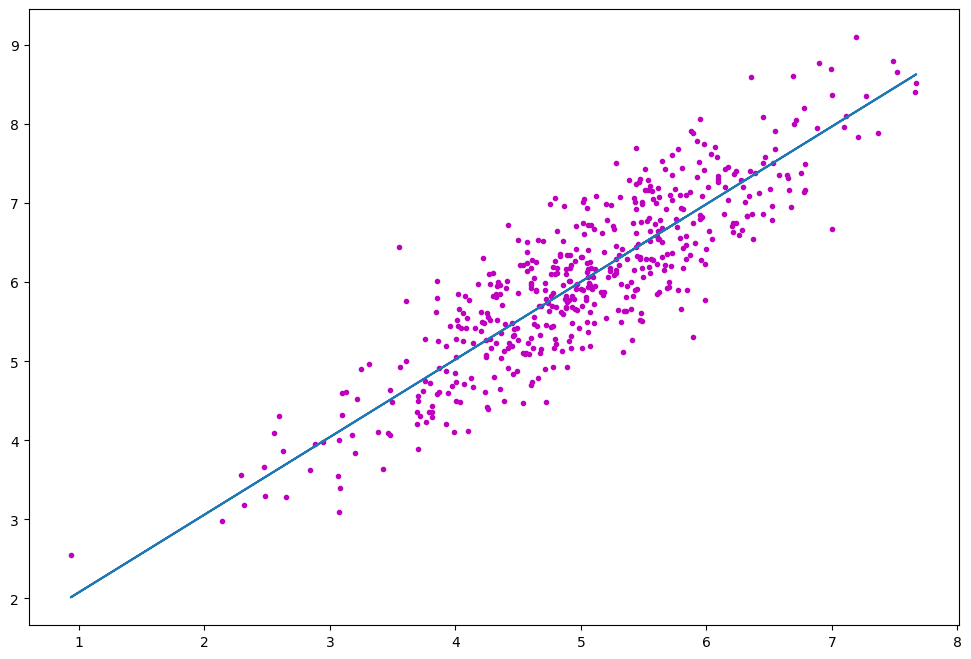

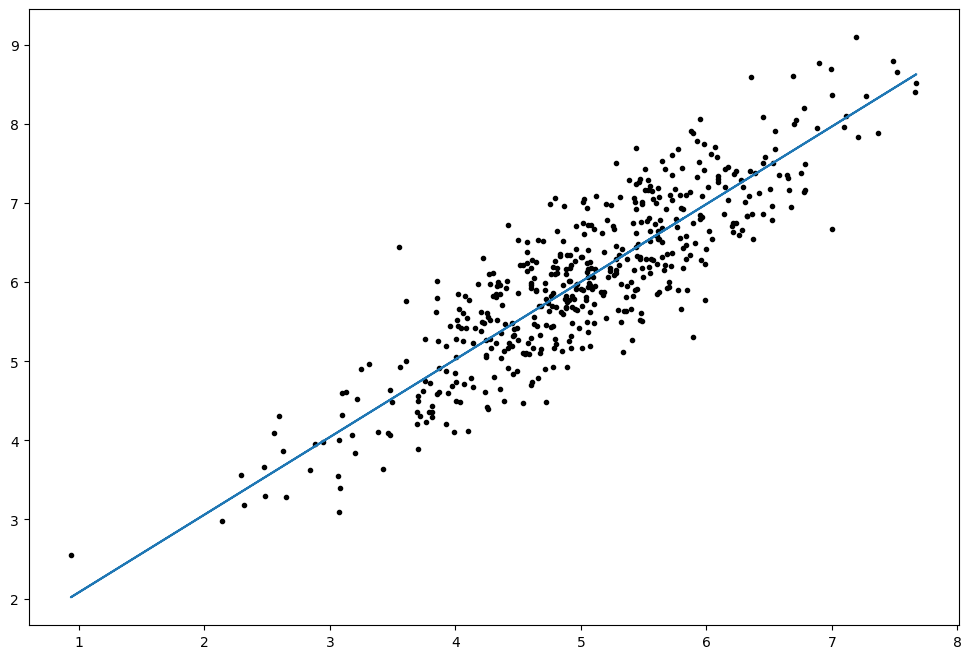

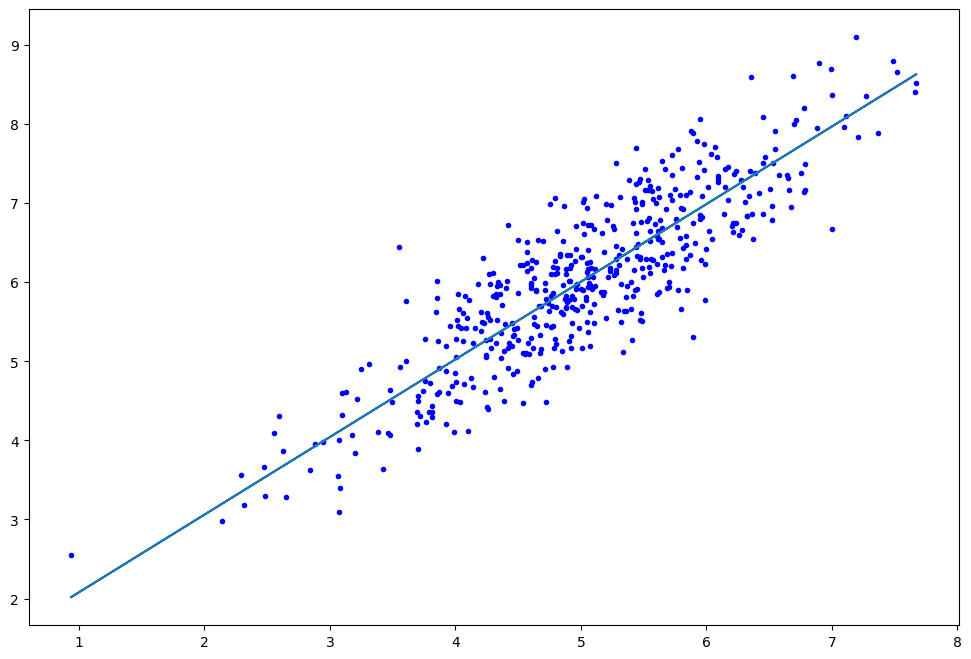

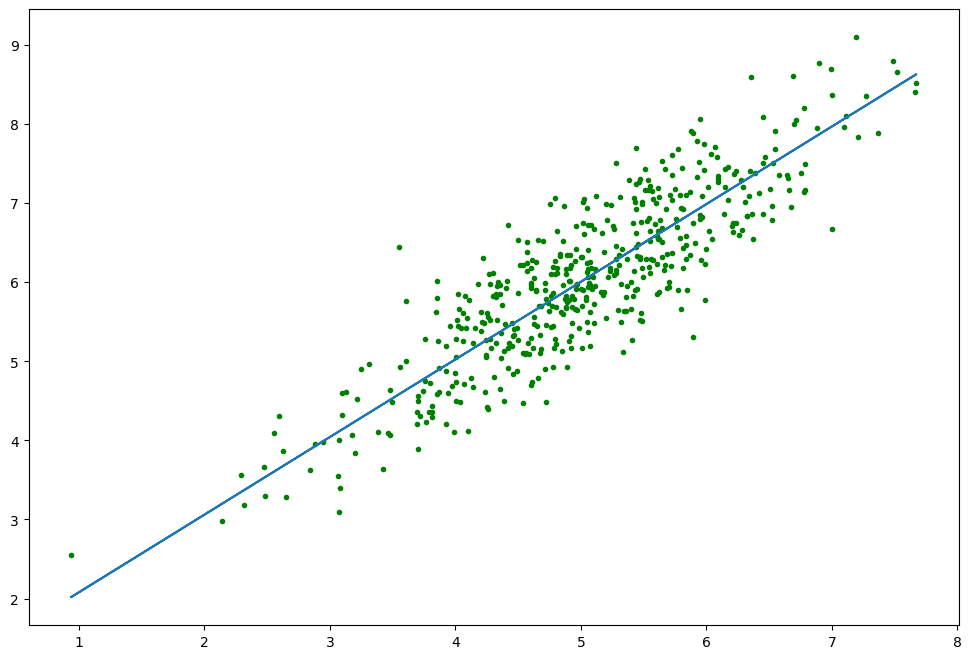

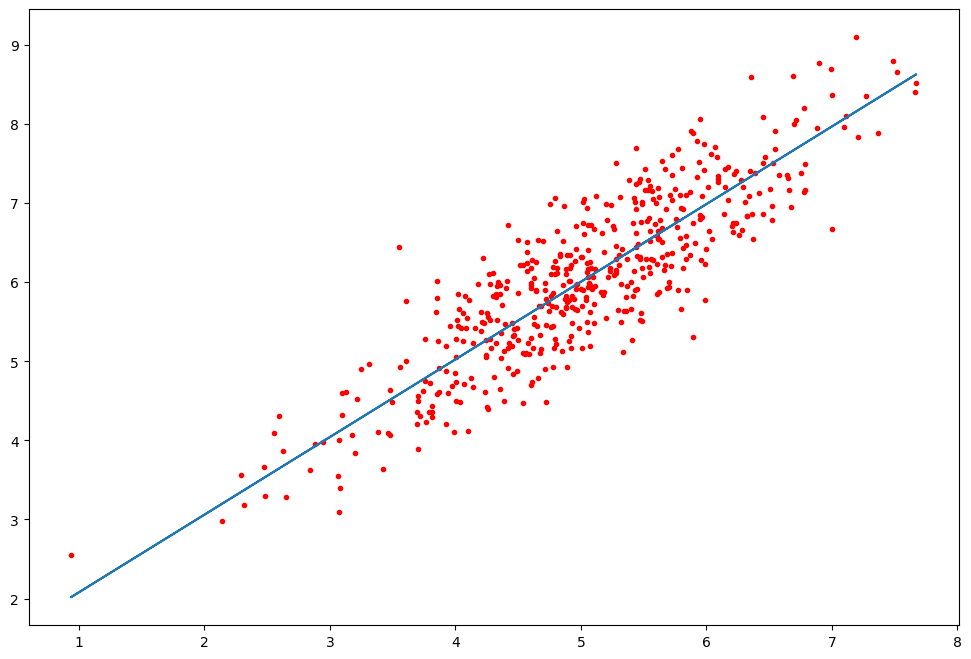

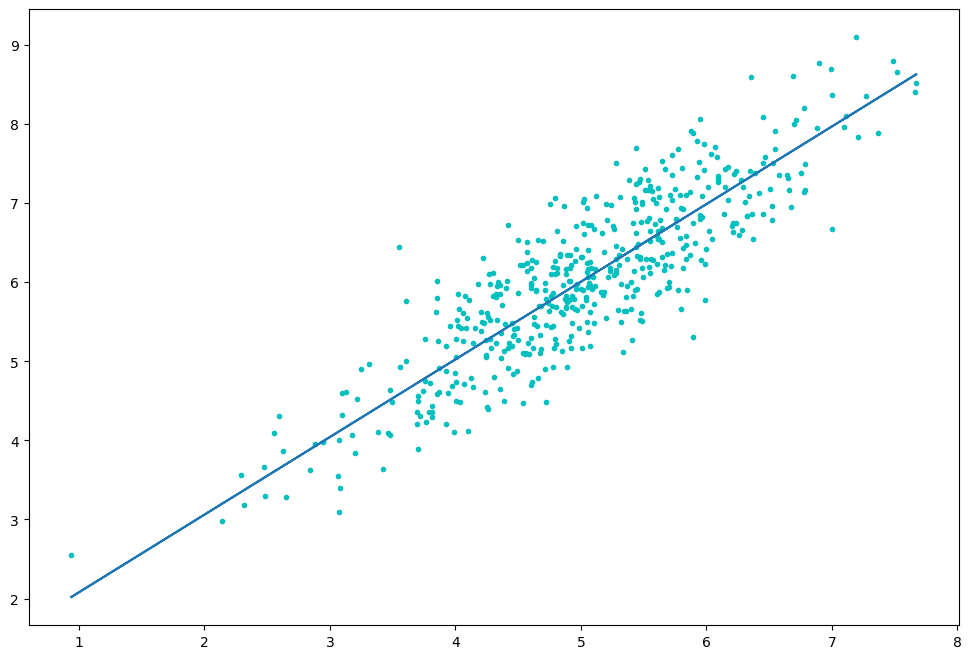

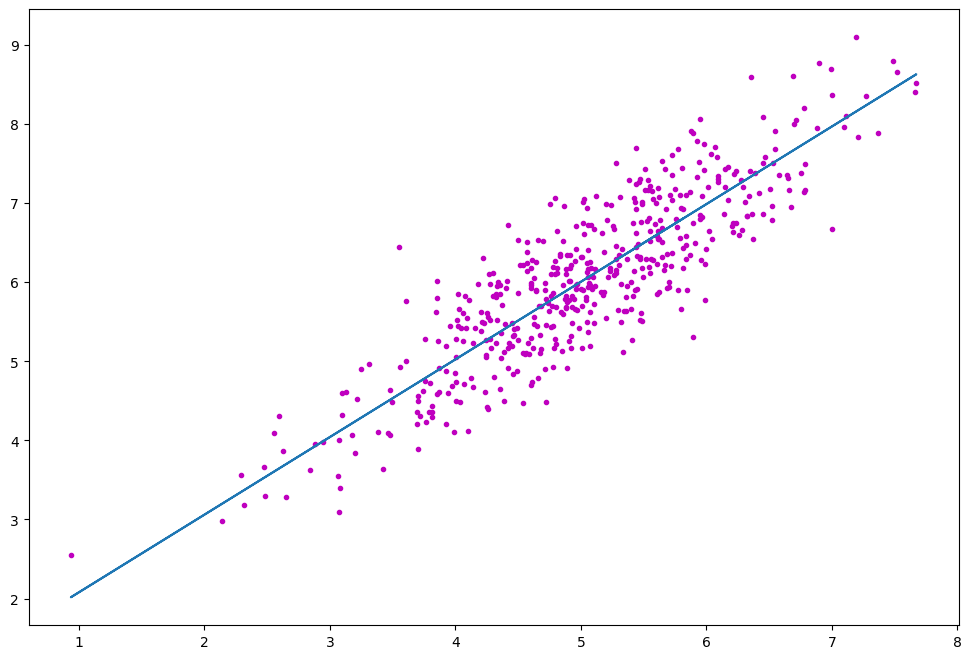

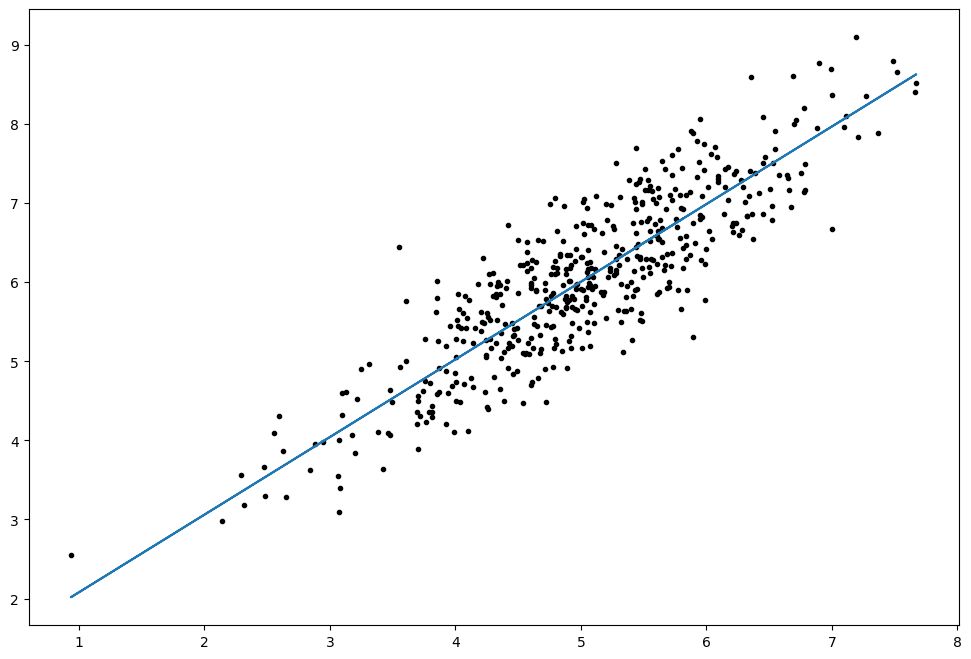

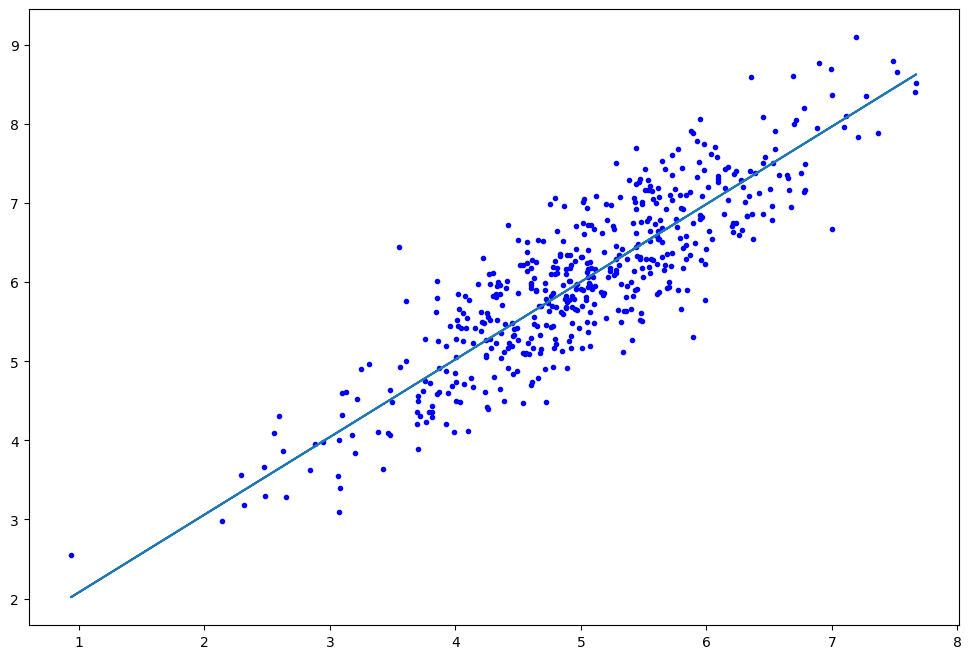

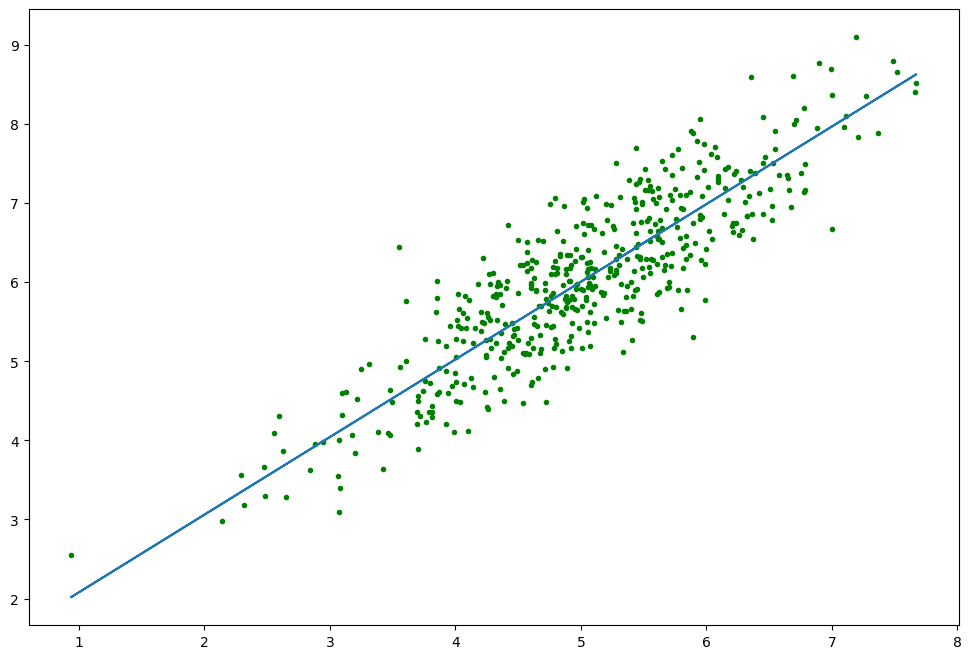

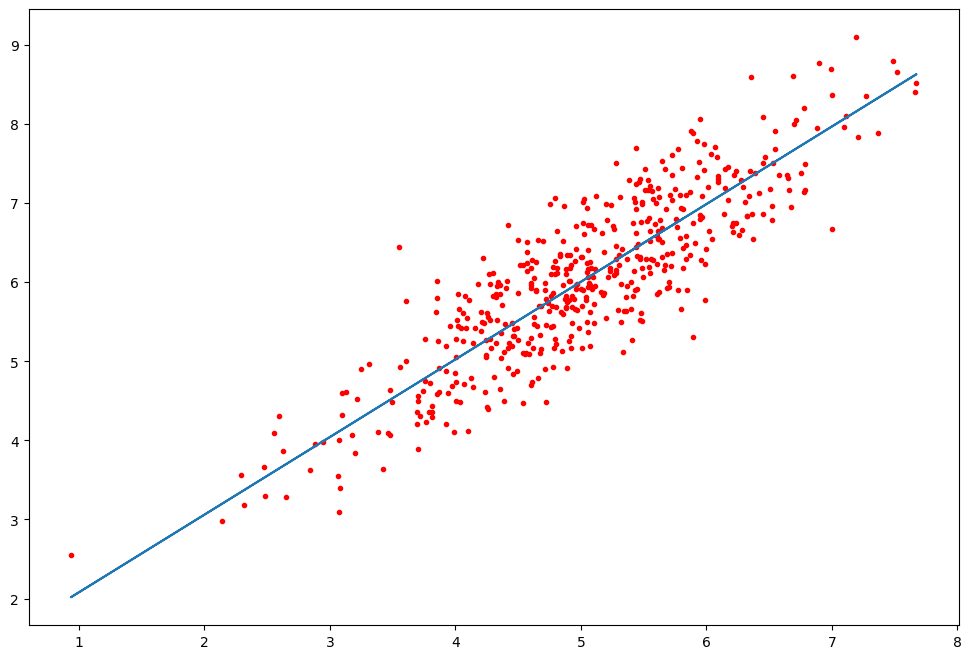

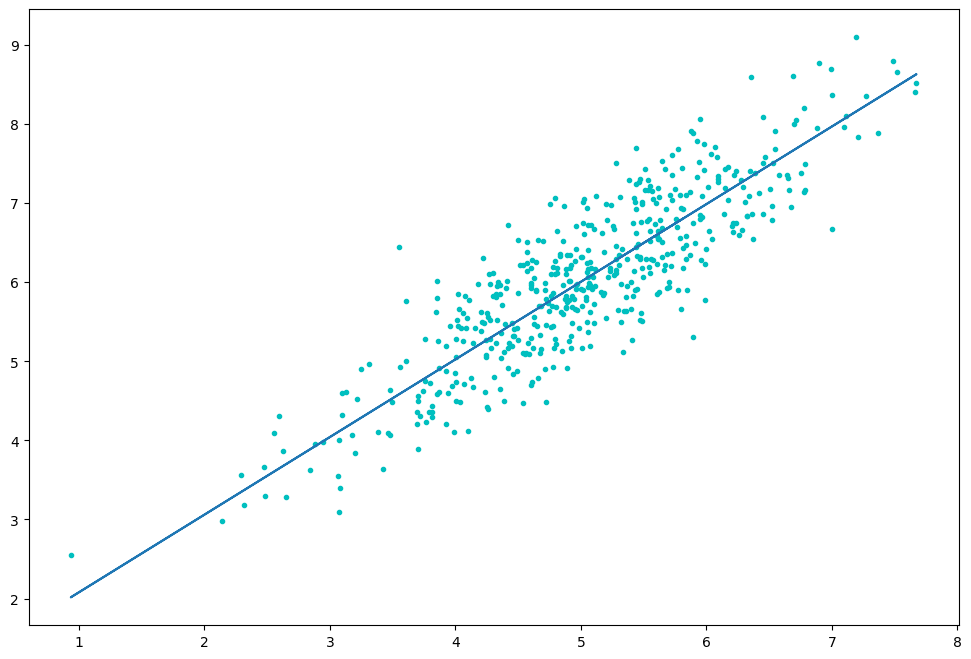

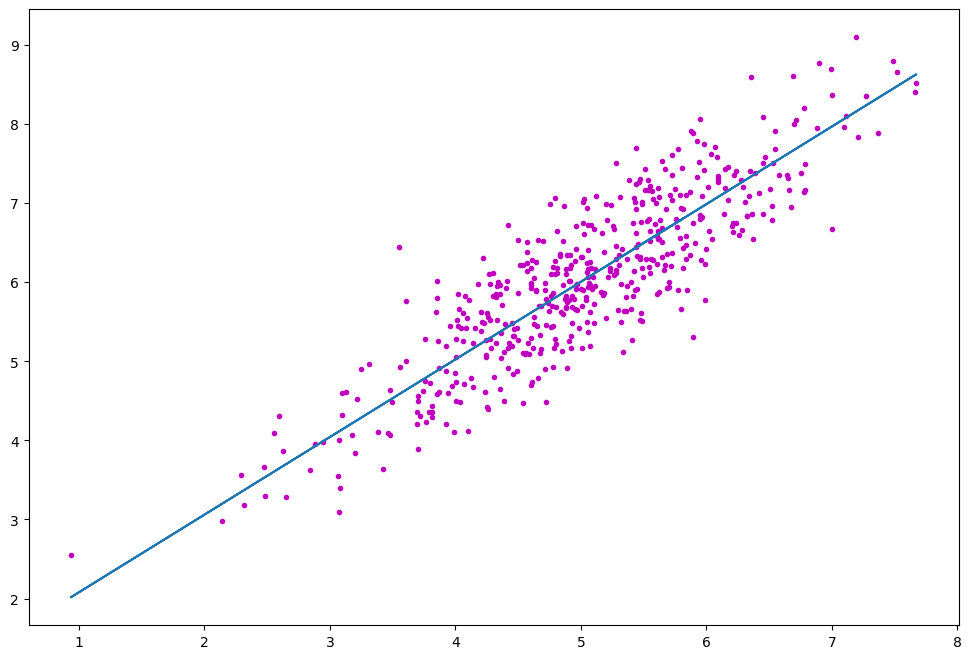

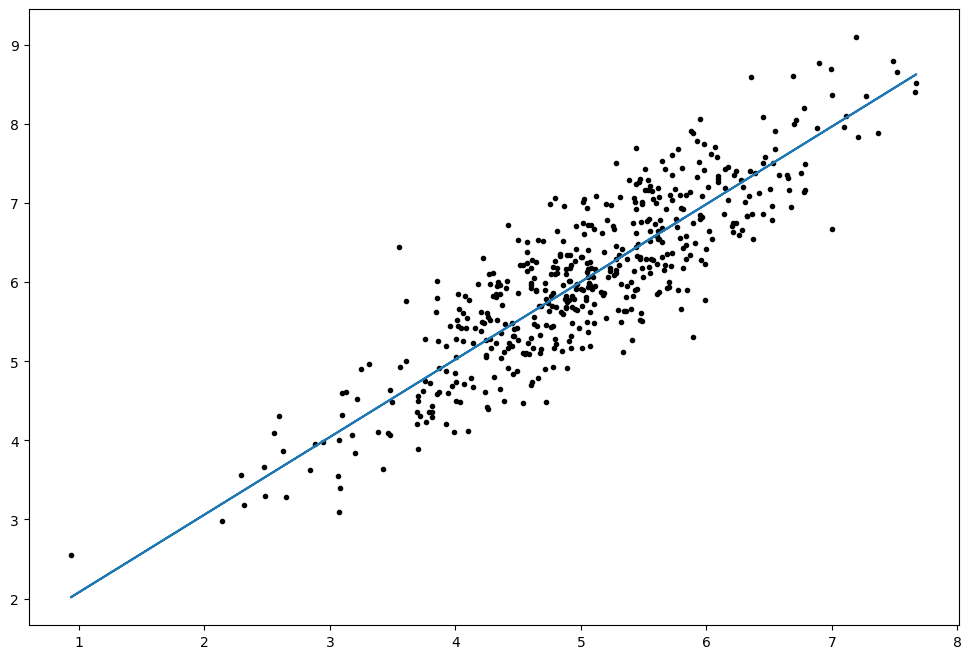

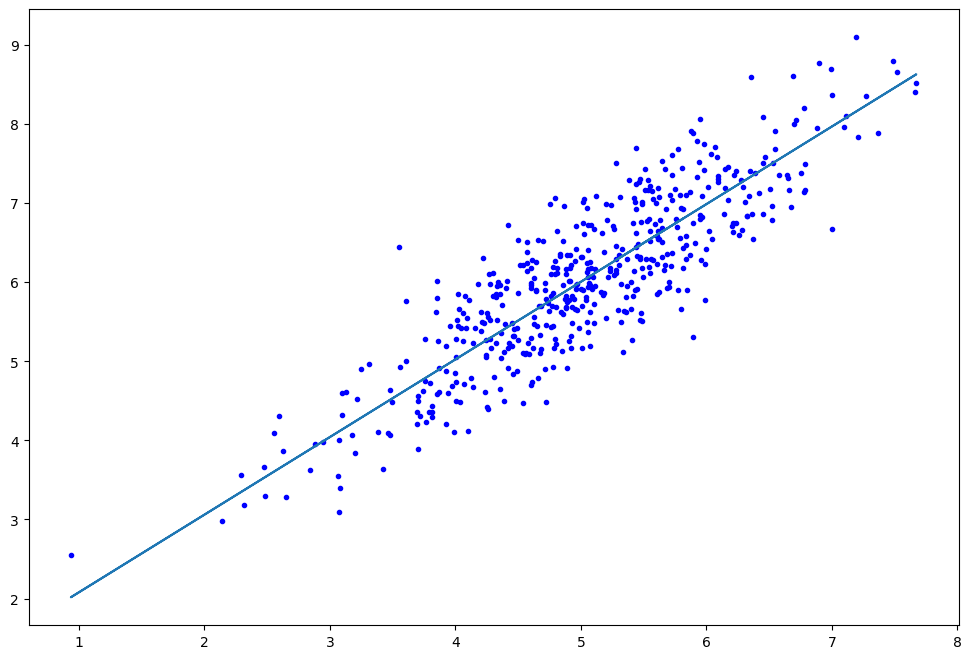

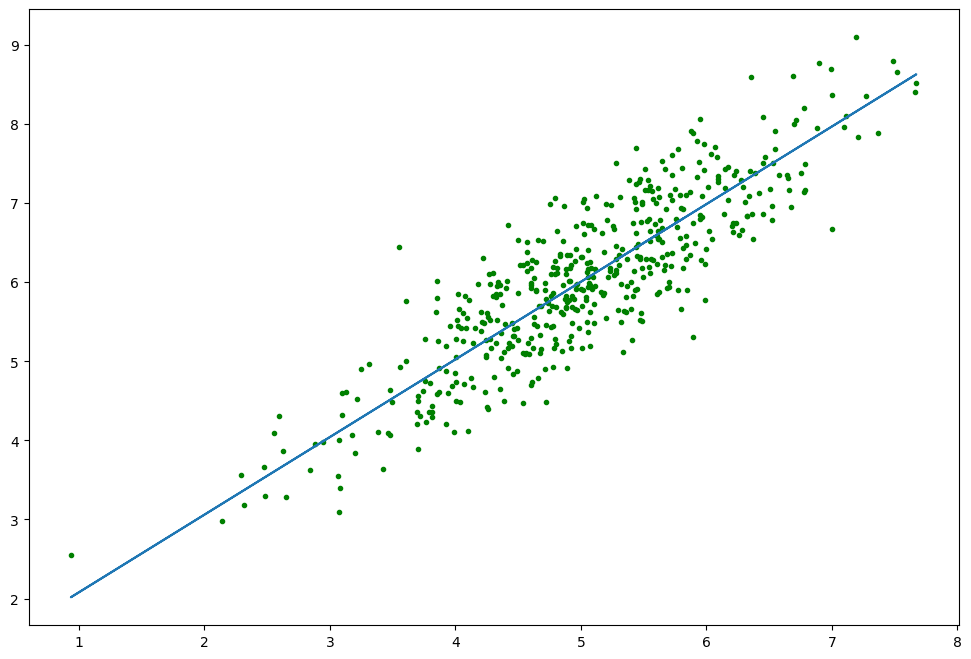

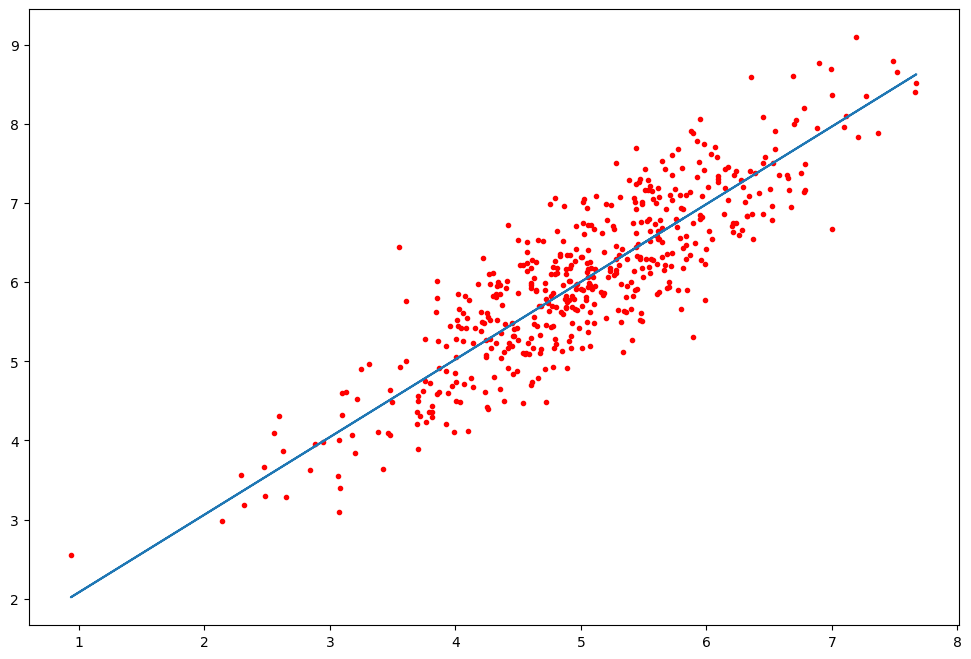

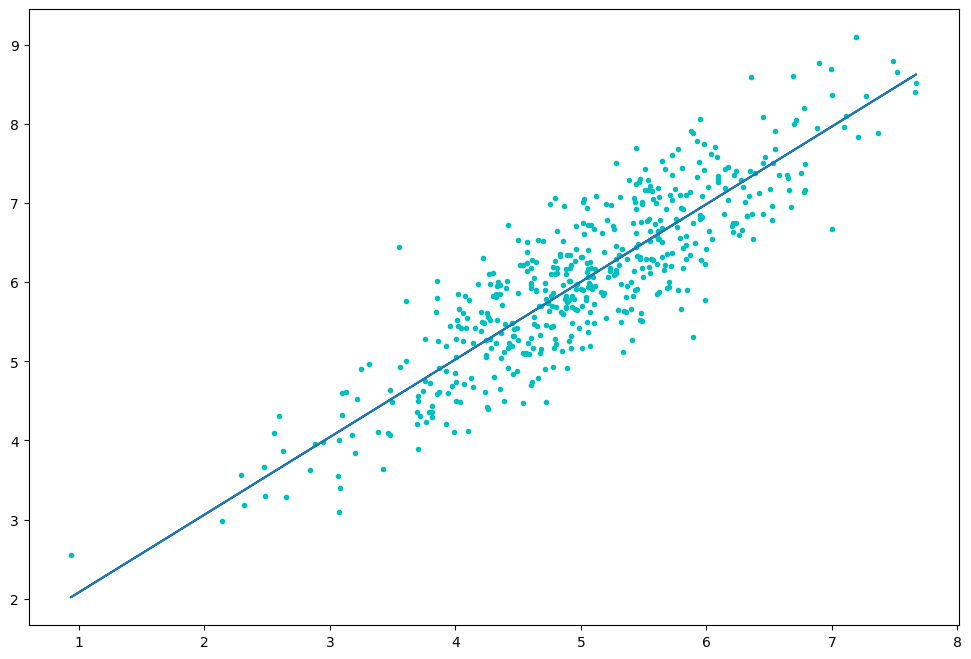

75.89197134971619


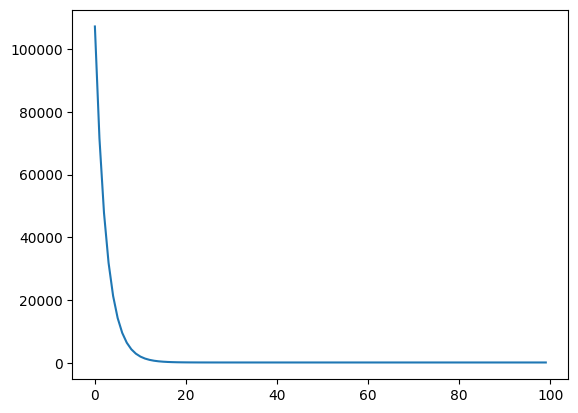

In [28]:
start=time.time()
w=np.random.randn(X_train.shape[1],1)
b=np.zeros(1)
plt.figure(figsize=(12,8))
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))
plt.show()
mini_batches=create_mini_batch(X_train,y_train,16)
from itertools import cycle
cycol = cycle('bgrcmk')
lr=0.000001
j_history=[]
for epoch in range(100):
    total_cost=0
    
    for i ,data in enumerate(mini_batches) :
        X,y=data
        #y_pred=hyothesis(X)
        j_=cost(X_train,y_train,w,b)
        
        
        #print('prev_w',w)
        #print('prev_b',b)
        dw,db=gradient(X,y,w,b)
        w=w-dw*lr
        b=b-db*lr
        
        #print('update_b',b)
        #print('update_w',w)
        #print(j)
        total_cost+=j_
       
        #if i==0:
         #   break
    if epoch %1==0:
        plt.figure(figsize=(12,8))
        plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.',c=next(cycol))
        plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))    
        plt.show()
 
    j_history.append(total_cost)   
        
    

plt.show()
plt.plot(j_history)

end=time.time()
print(end-start)

In [ ]:
X_train.shape

In [32]:
plt.show()

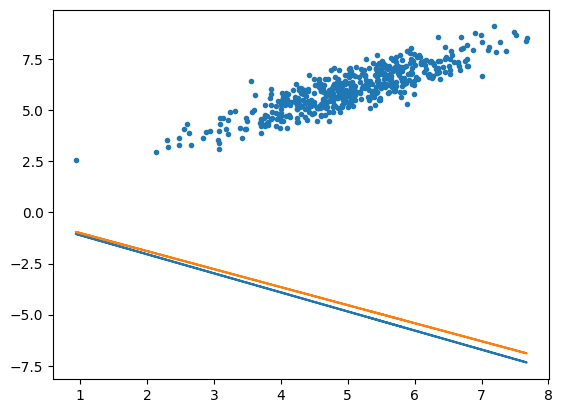

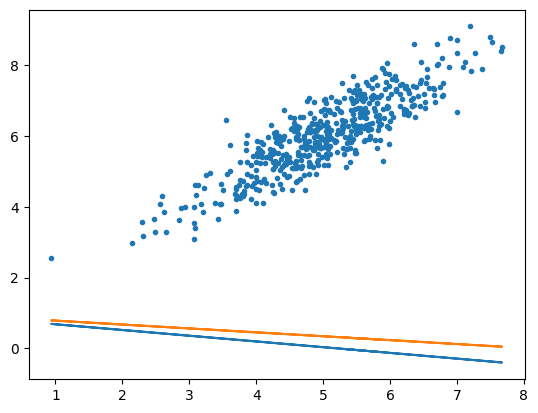

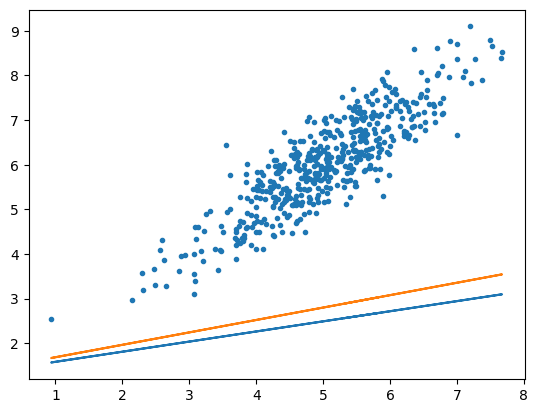

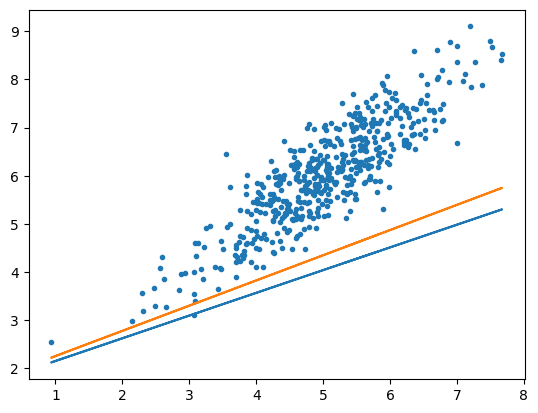

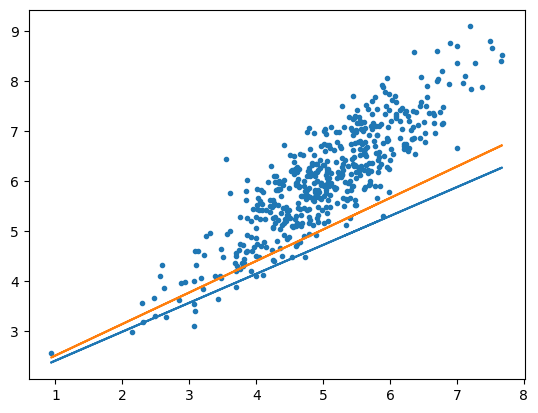

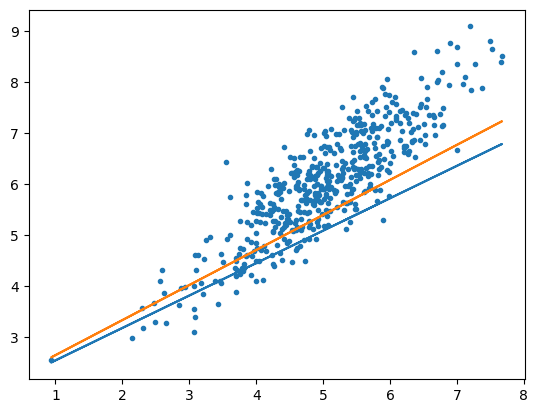

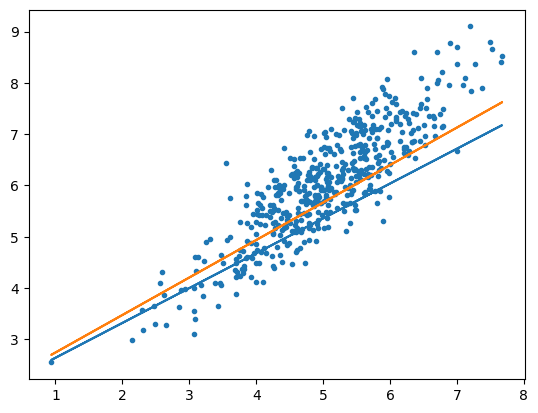

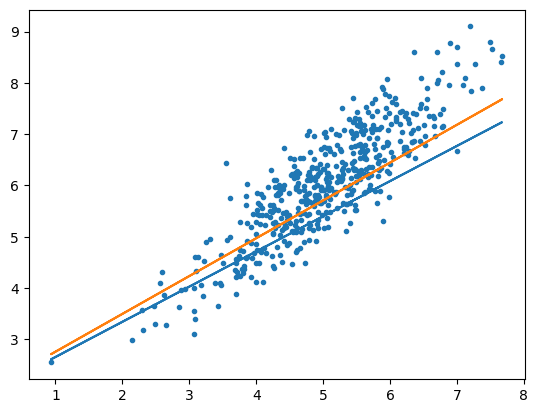

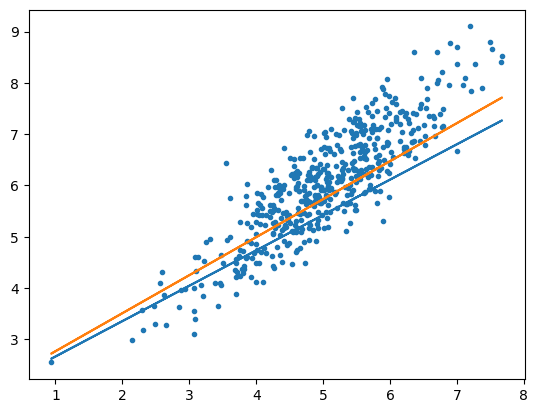

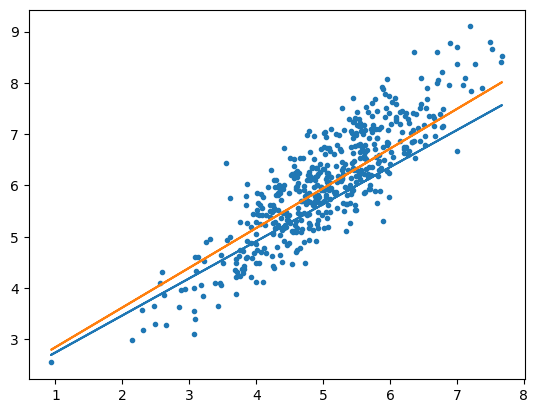

3.521352767944336


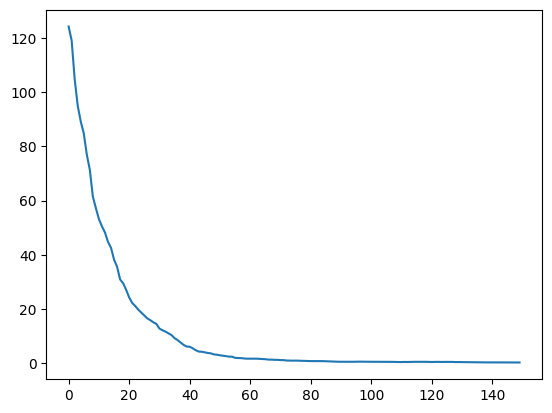

In [47]:
start=time.time()
w=np.random.randn(X_train.shape[1],1)
b=np.zeros(1)
#plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
#plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))
#plt.show()

J_hist=[]
num_epoch=150
lr=0.001
for epoch in range(num_epoch):
    i=np.random.randint(0,X_train.shape[0])
    

    y_i=hyothesis(X_train[i],w,b)
    loss=cost(X_train,y_train,w,b)
    dw,db=gradient(X_train[i],y_train[i],w,b)
    w=w-dw*lr
    b=b-db*lr
        #total_cost+=loss
    if epoch%15==0:    
        #plt.show() 
        plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
        plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))   
        plt.show() 

    J_hist.append(loss) 

#plt.show()    
#plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
#plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))        
#plt.show()    
plt.plot(J_hist)

        
      
    
    
    
end=time.time() 
print(end-start)   



In [ ]:
plt.plot(J_hist)

Momenturm for Minibatch Gradient Descent


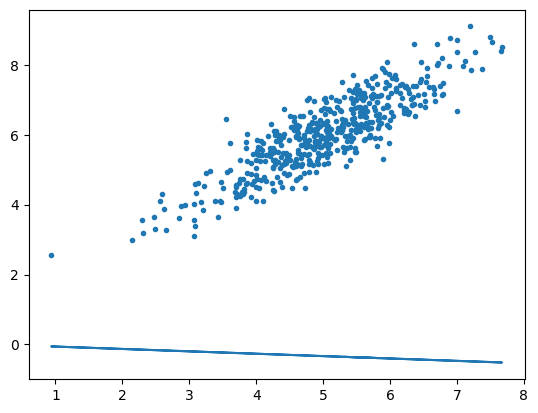

In [42]:
w=np.random.randn(X_train.shape[1],1)
b=np.zeros(1)
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))

In [43]:
mini_batches=create_mini_batch(X_train,y_train,16)

mini_batches=mini_batches[:-1]

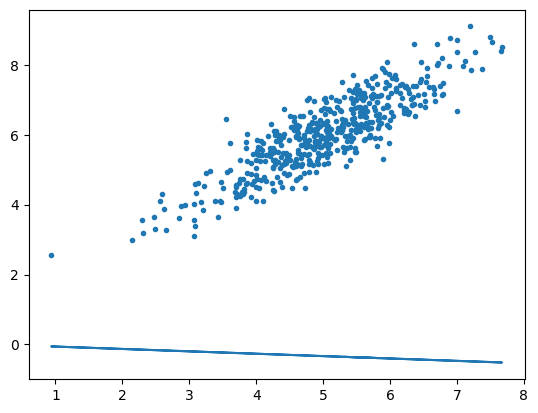

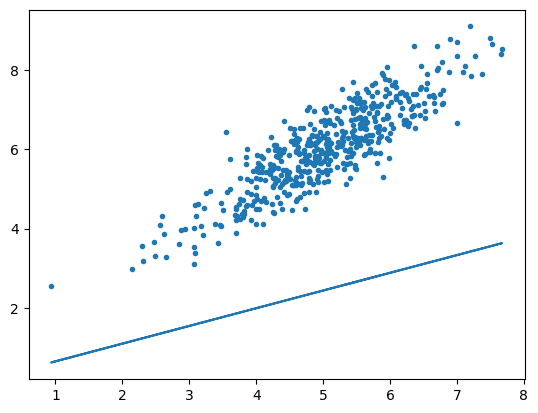

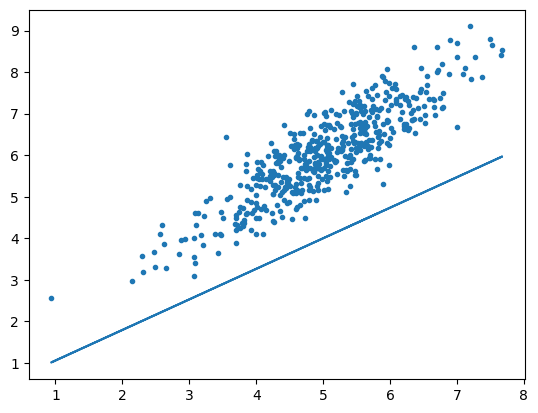

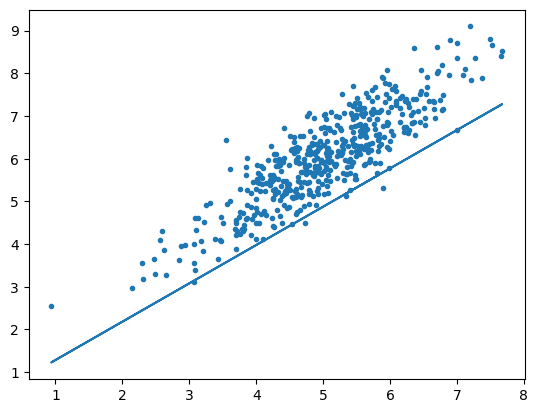

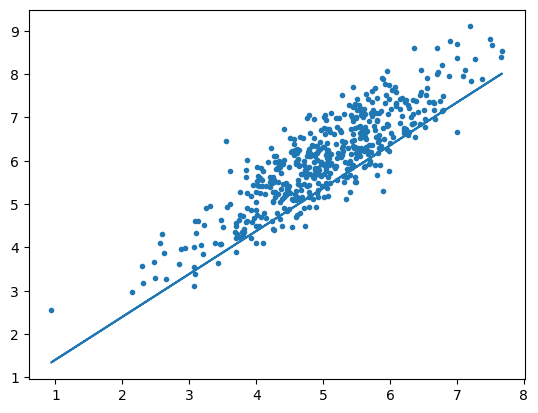

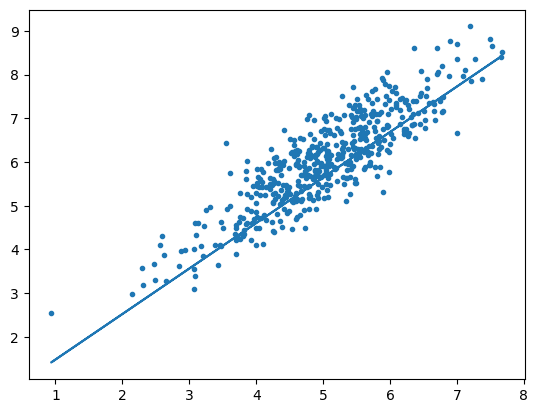

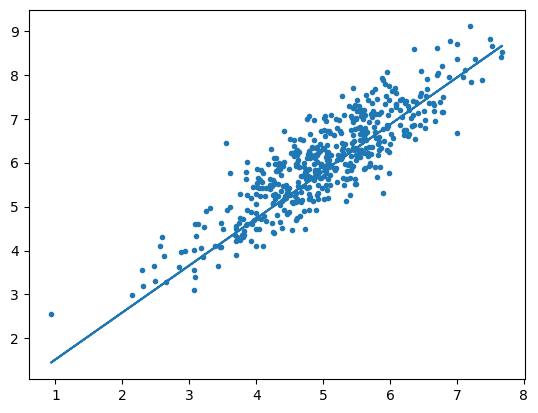

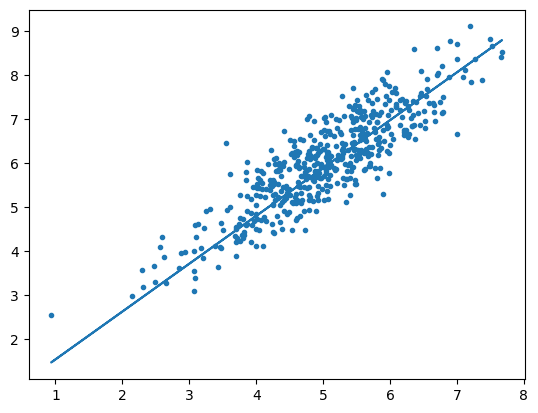

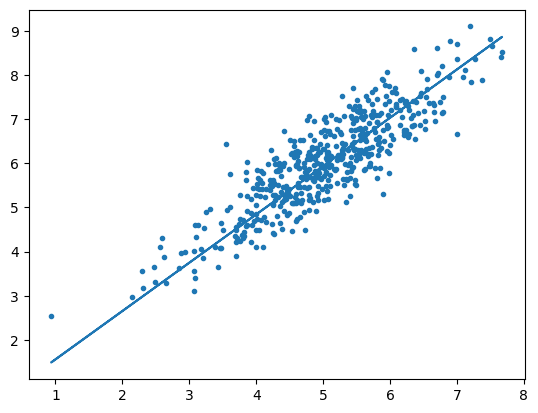

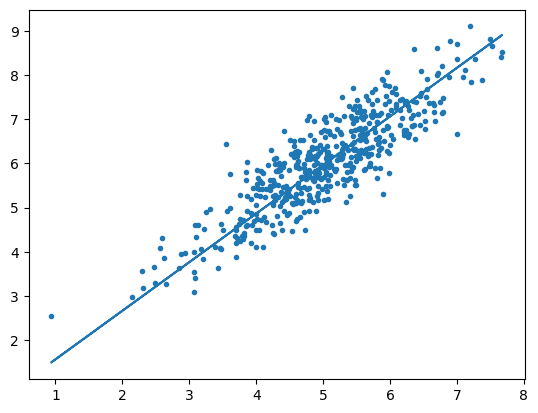

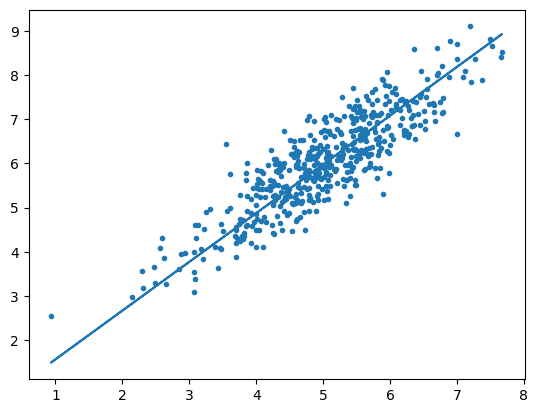

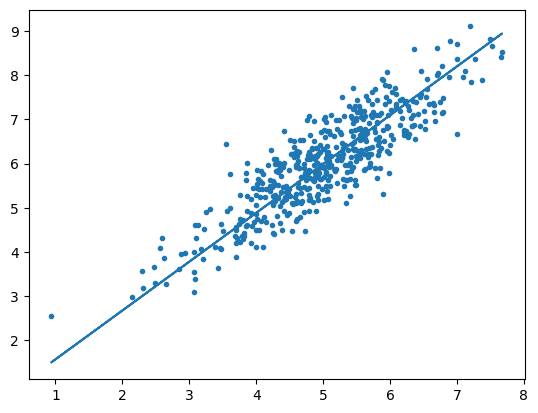

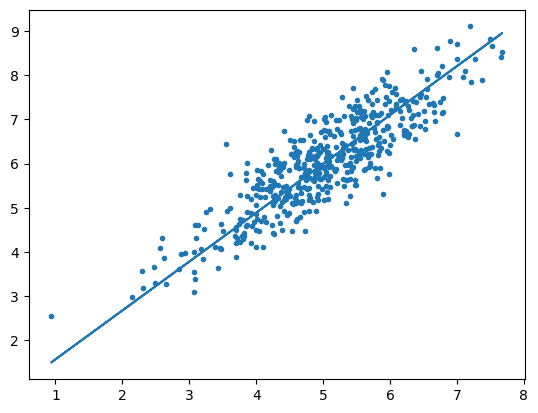

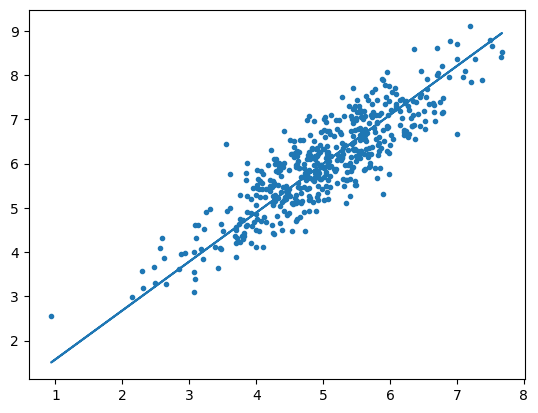

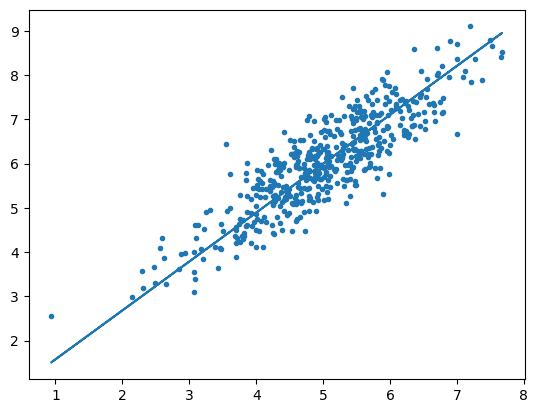

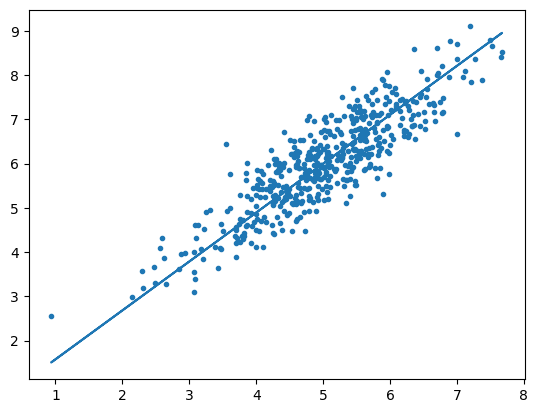

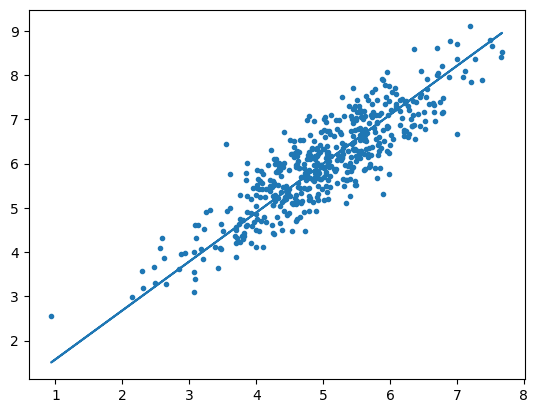

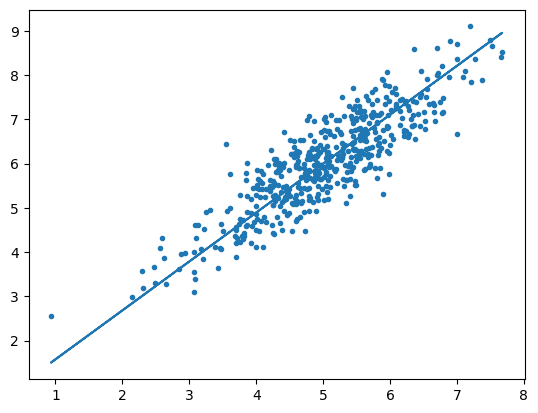

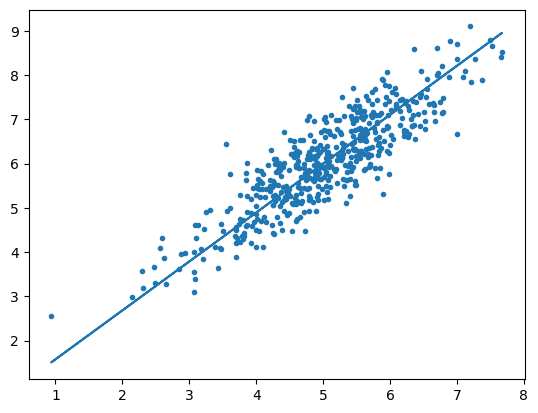

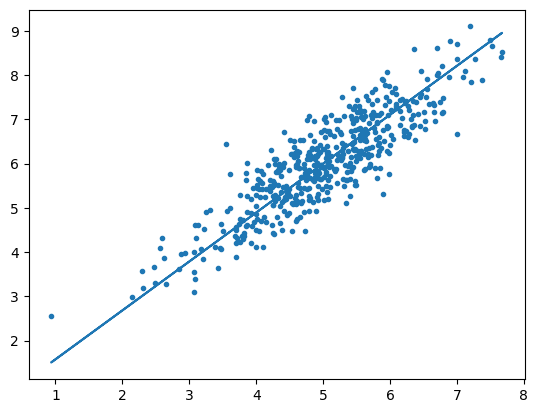

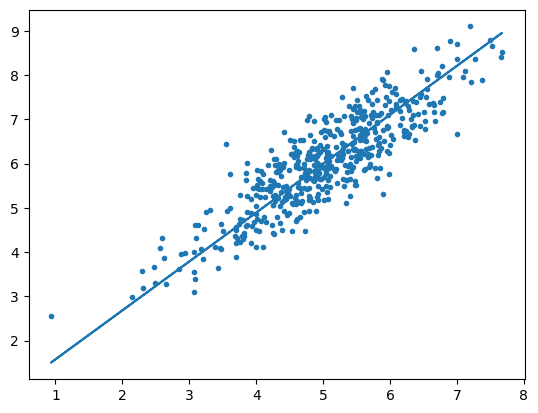

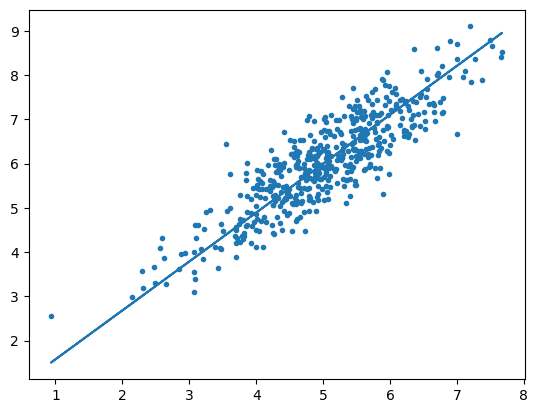

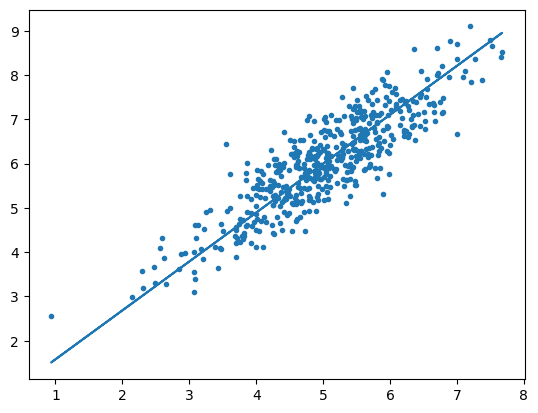

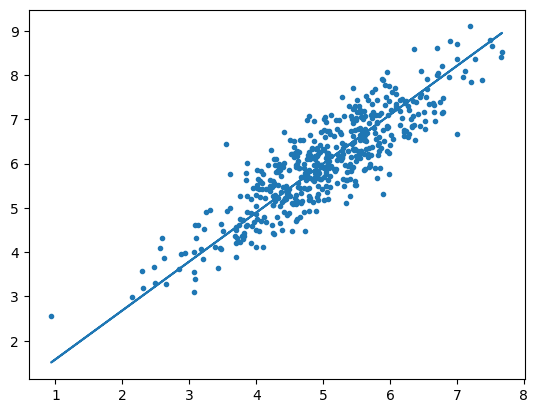

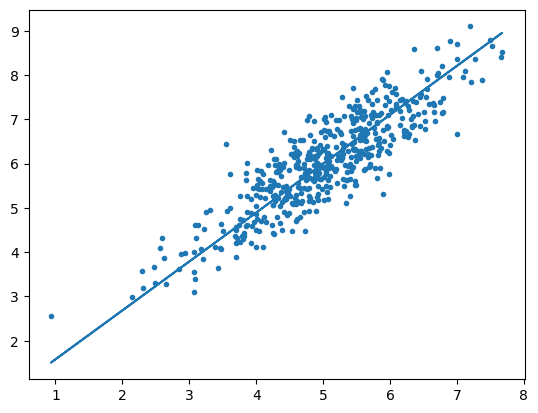

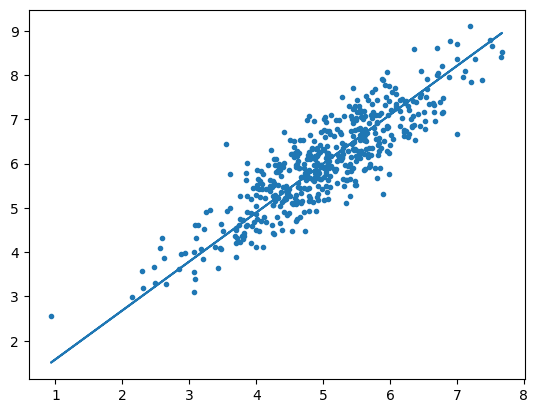

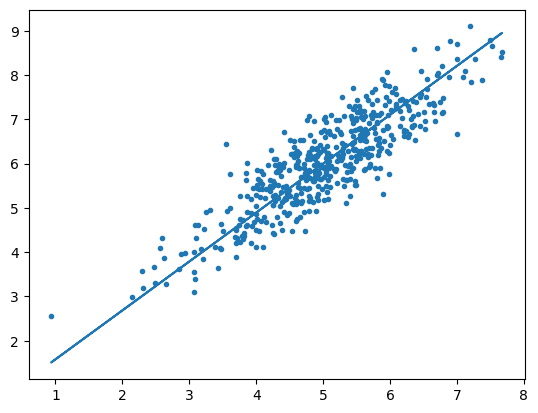

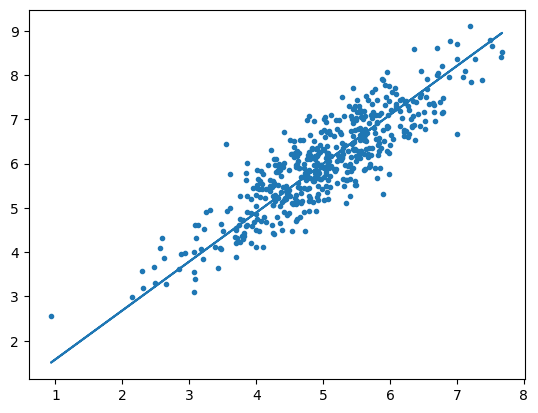

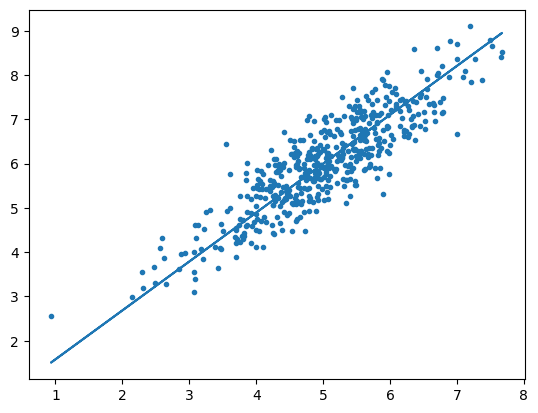

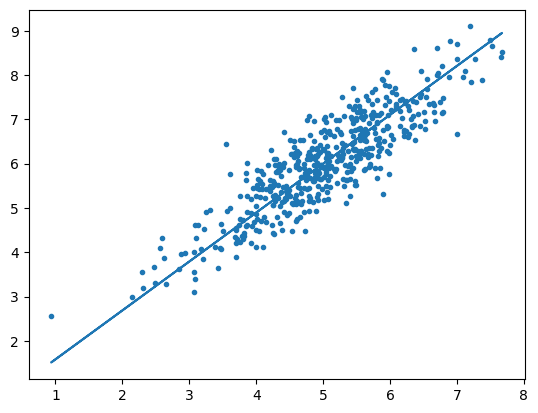

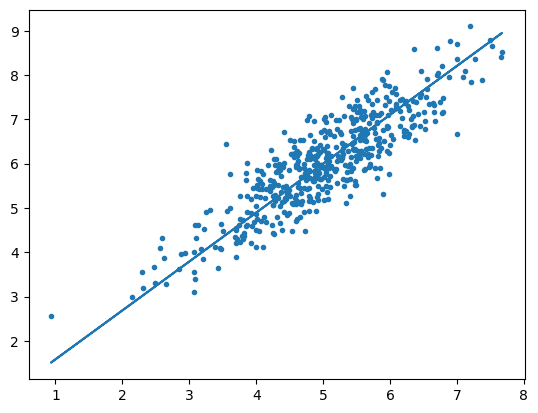

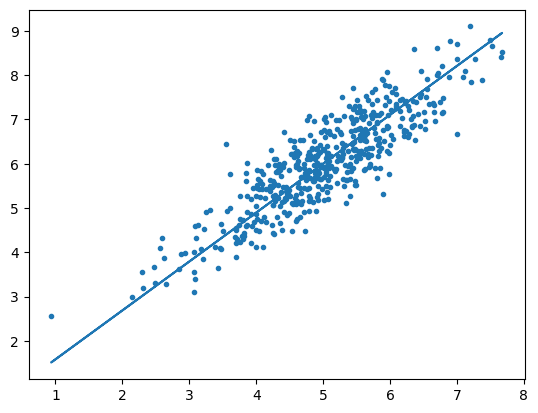

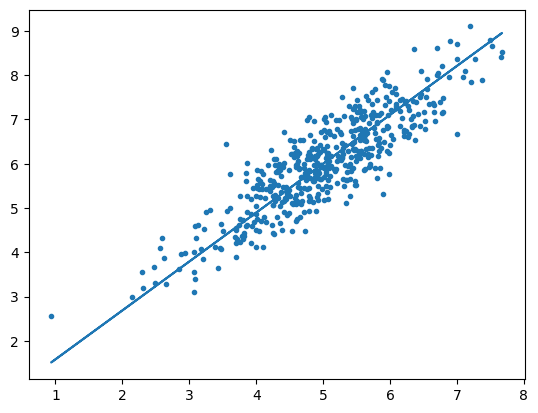

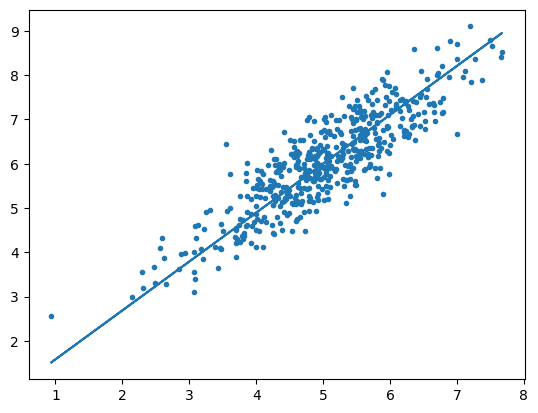

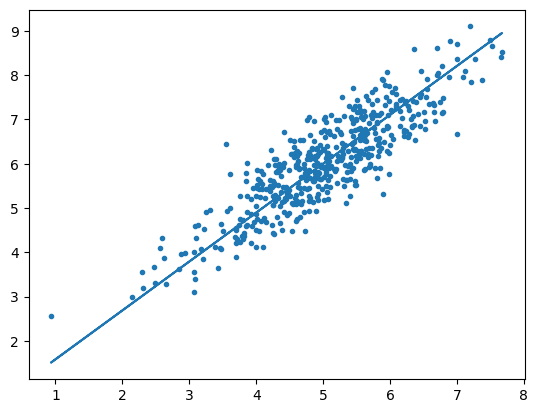

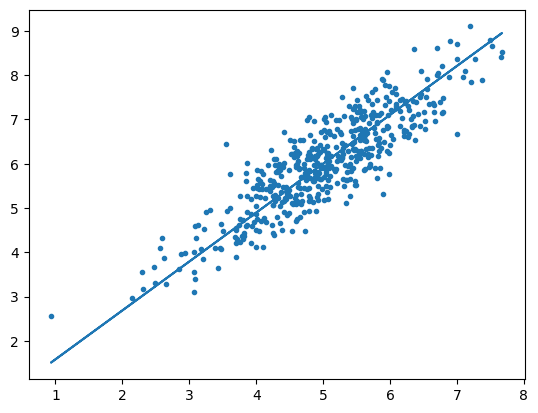

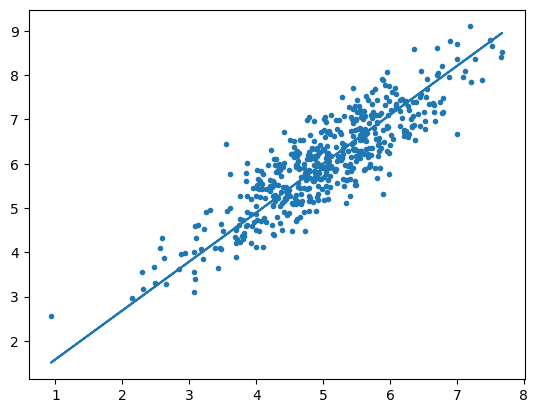

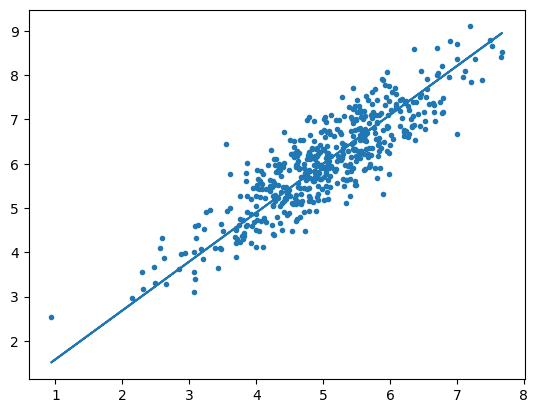

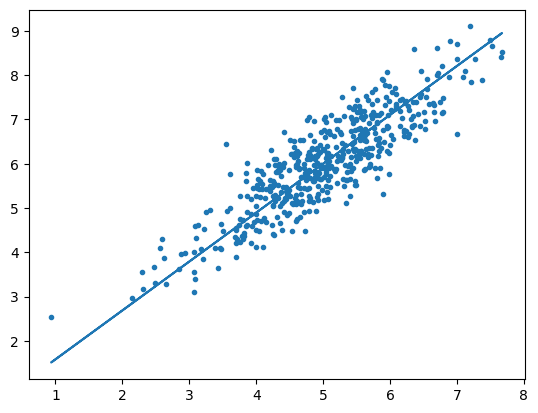

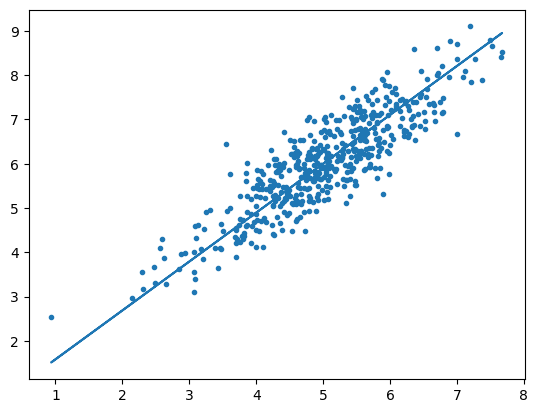

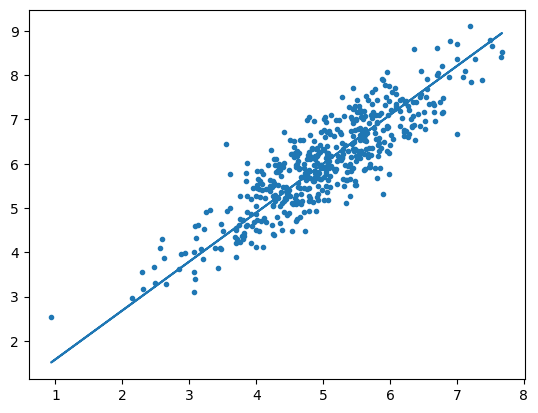

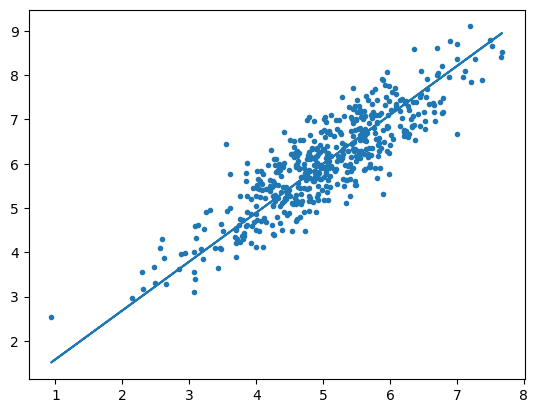

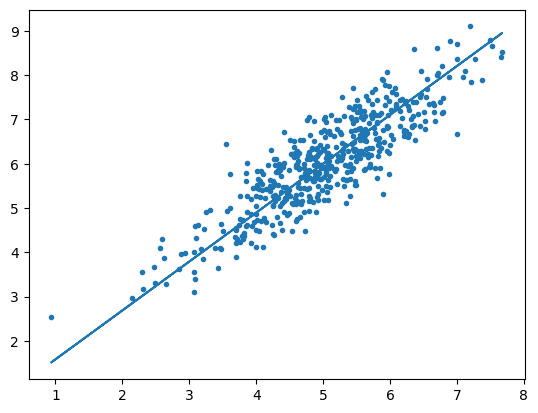

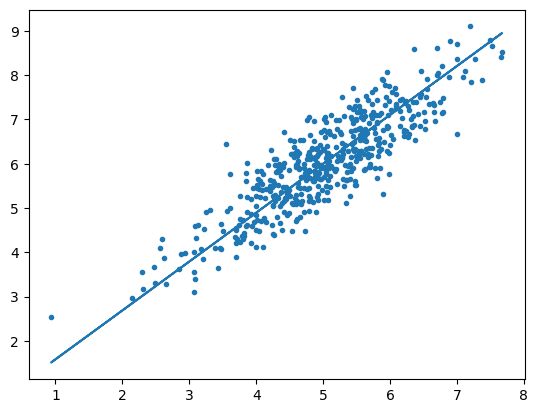

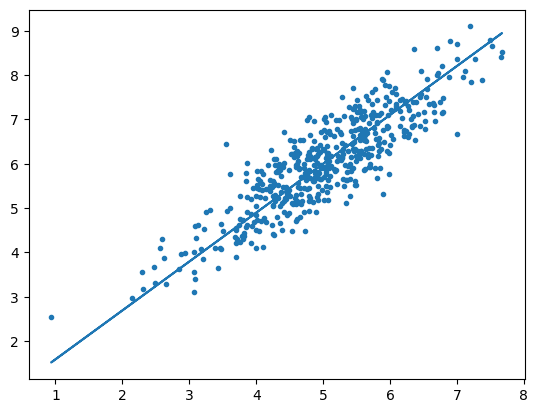

KeyboardInterrupt: 

In [44]:
num_epochs=100
J_hist=[]
for epoch in range(num_epochs):
    prev_v_w,prev_v_b,gamma=0.0,0.0,0.9
    eta=0.001
    for i, data in enumerate(mini_batches):
        
        X,Y=data
        dw,db=gradient(X,Y,w,b)
        if i==0:
            break
    v_w=gamma*prev_v_w+eta*dw  
    v_b=gamma*prev_v_b+eta*db
    plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
    plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))
    plt.show()
    w=w-v_w
    b=b-v_b
    prev_v_w=v_w
    prev_v_b=v_b
    loss=cost(X,Y,w,b)
    J_hist.append(loss)
    

  
    
    

In [ ]:
plt.plot(J_hist)

In [ ]:
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))

In [ ]:
w=np.random.randn(X_train.shape[1],1)
b=np.zeros(1)
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))
plt.show()

num_epochs=10
J_hist=[]
for epoch in range(num_epochs):
    prev_v_w,prev_v_b,gamma=0.0,0.0,0.9
    eta=0.00001
    total_loss=0
    for i, data in enumerate(mini_batches):
        
        X,Y=data
        dw,db=gradient(X,Y,w,b)
       
        v_w=gamma*prev_v_w+eta*dw  
        v_b=gamma*prev_v_b+eta*db

        w=w-v_w
        b=b-v_b
        prev_v_w=v_w
        prev_v_b=v_b
        loss=cost(X,Y,w,b)
        total_loss+=loss
        
    plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
    plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))    
    plt.show()
    J_hist.append(total_loss)
plt.show()
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],hyothesis(X_train[:500,:],w,b))
plt.show()
plt.plot(J_hist)
    